In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Pick a few FOVs for reference

In [ ]:
scoresRef = None

Loaded decoded: -32.126585721969604


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.40it/s]


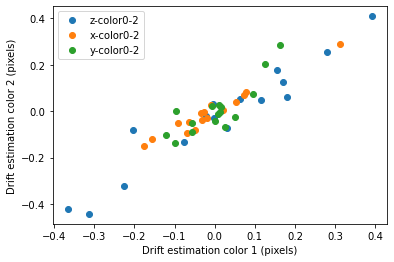

In [2]:
save_folder =r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12'
fov,set_ = 'Conv_zscan__040', '_D16' ################## Change 
dec = decoder_simple(save_folder,fov,set_)
dec.ncols = 3
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
apply_flat_field(dec,tag='med_col_raw')

In [42]:
scoresRefT = get_score_per_color(dec)

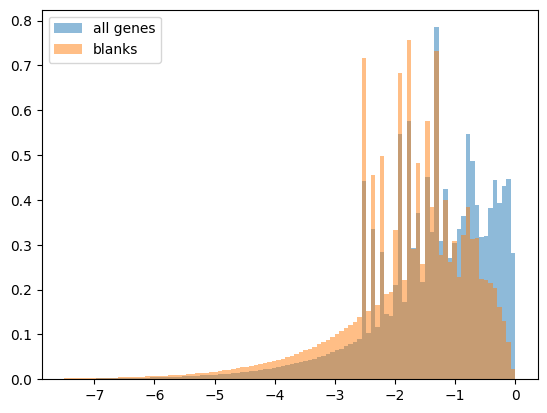

In [43]:
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-7.5)

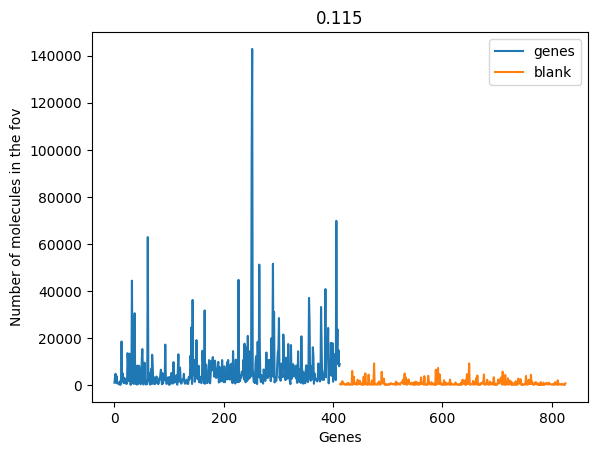

In [44]:
dec.th=-0.5
plot_statistics(dec)

In [37]:
#??plot_statistics

In [45]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
dec.gns_names[icds[np.argsort(ncds)[::-1]]][:150]

array(['Dpysl3', 'Dpysl2', 'Elavl3', 'Cd24a', 'Agt', 'Enc1', 'Csdc2',
       'Bcl11b', 'Ddx5', 'Cnr1', 'Actg1', 'Cux2', 'Auts2', 'Ank2',
       'Bhlhe22', 'Ascl1', 'Cntf', 'Acsl3', 'Dlg4', 'Elfn1', 'Bsg', 'Dcx',
       'Cdh2', 'Adcy1', 'Aif1l', 'Cxcl10', 'Ankrd11', 'Eif4a2', 'Drd1',
       'Dsp', 'Cttnbp2', 'Camk4', 'Adgrl3', 'Cplx2', 'Casp3', 'Col19a1',
       'Dcc', 'Cck', 'Dgat2', 'Arx', 'Eno1', 'Erbb4', 'Atp2b4', 'Dgkh',
       'Chrna6', 'Dlgap5', 'Cd38', 'Elavl4', 'Aqp8', 'Fam107a', 'Bsn',
       'Arpp21', 'Baiap3', 'Egfem1', 'Dlx6os1', 'Cdk4', 'Dbpht2',
       'Col1a1', '6330403K07Rik', 'Dgkb', 'Ednrb', 'Cadps2', 'C1ql2',
       'Dlx2', 'Cbx5', 'Ckap5', 'A930003A15Rik', 'Ctsl', 'Adora2a',
       'Chek1', '1810041L15Rik', 'Cd81', 'C1qtnf4', 'Camk2a', 'Cabs1',
       'Cacnb2', 'Ccp110', 'Dact1', 'Cenpu', 'Aqp2', 'Ccnd2', 'Atxn1',
       'blank0236', 'blank0062', 'Crispld2', 'Camk2d', 'BC030343',
       'Chrdl1', 'Abi3bp', 'Ecel1', 'Dll1', 'Adcyap1', 'Fam184a',
       'Atp1b1', 'Cbl

In [47]:
viewer = plot_multigenes(dec,genes=['Cd24a','Ascl1','Arx'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

In [48]:
if True:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    pickle.dump(scoresRef,open(save_folder+os.sep+'scoresRef.npy','wb'))

# START HERE: Use the reference to threshold and pull the FOVs

In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Load the segmentat|ion for an entire section (i.e. _D16)

In [2]:
dic_ = np.load(r'\\192.168.0.6\bbfishjoy4extra\SegmentationCyto2\imfsegm.npz')################
imfsegm = dic_['imfsegm']
coordsf=dic_['coordsf']
resc = dic_['resc']
dic = np.load(r'\\192.168.0.6\bbfishjoy4extra\SegmentationCyto2\pos_um_fovs.npz')##################
pos=dic['pos']
fls=dic['fls']
fovs = [os.path.basename(fl).split('--')[0]for fl in fls]
set_ = '_'+os.path.basename(fls[0]).split('--')[1].split('_')[-1]

In [3]:

#set_

In [4]:
save_folders = [r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12',
                r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34',
                r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP711',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2']
for fld in save_folders:
    print(os.path.exists(fld))

True
True
True
True
True
True


### Itterate through each fov in section (set i.e. _D16)

In [5]:
paramaters = [(fov,set_,save_folder)for fov in fovs for save_folder in save_folders]
len(paramaters)

1554

In [18]:
fov,set_,save_folder = paramaters[100]

fov = 'Conv_zscan__059'
print(fov,set_,save_folder)

Conv_zscan__059 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP711


Loaded decoded: -18.705095291137695


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:21<00:00,  2.23it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__059--_D16.npz


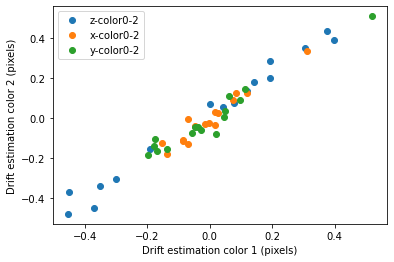

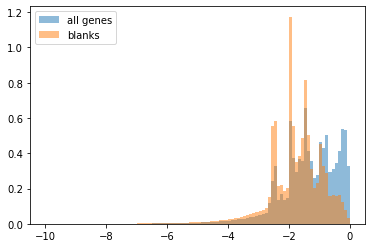

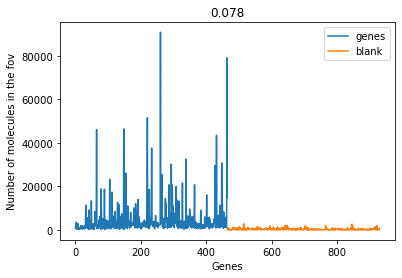

In [19]:
main_analysisV1(fov,set_,
                   save_folder = save_folder,
                   save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                   save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                   drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                   segm_tag = 'A1_LamA_Nup98_D16')

Loaded decoded: -16.548757076263428


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:20<00:00,  2.30it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__000--_D16.npz


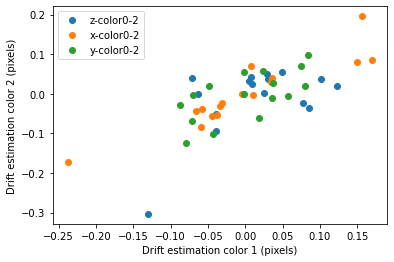

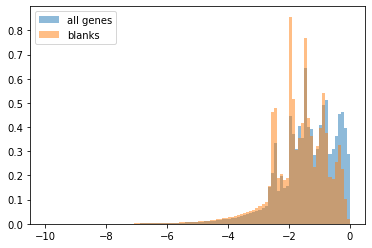

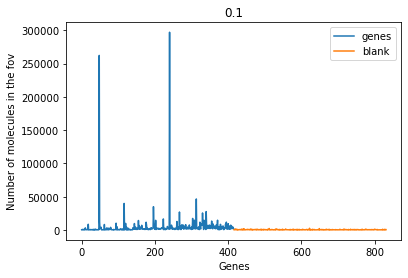

In [12]:
fov,set_,save_folder='Conv_zscan__000', '_D16',r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34'
main_analysisV1(fov,set_,
                       save_folder = save_folder,
                       save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                       save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                       drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                       segm_tag = 'A1_LamA_Nup98_D16')

In [8]:
for fov,set_,save_folder in tqdm(paramaters):
    try:
        main_analysisV1(fov,set_,
                       save_folder = save_folder,
                       save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                       save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                       drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                       segm_tag = 'A1_LamA_Nup98_D16')
    except:
        print("Failed at:",fov,set_,save_folder)

  0%|                                                                                         | 0/1554 [00:00<?, ?it/s]

Loaded decoded: -1.8869152069091797



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.42it/s]
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  0%|▏                                                                              | 3/1554 [00:18<2:39:41,  6.18s/it]

Failed at: Conv_zscan__000 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.51517391204834



  0%|▎                                                                             | 5/1554 [02:06<12:40:00, 29.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__000--_D16.npz
Loaded decoded: -8.92301058769226



  0%|▎                                                                             | 6/1554 [03:04<15:49:20, 36.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__000--_D16.npz
Loaded decoded: -21.812371730804443



  0%|▎                                                                             | 7/1554 [04:56<24:34:14, 57.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__001--_D16.npz
Loaded decoded: -12.582678079605103



  1%|▍                                                                             | 8/1554 [06:11<26:38:03, 62.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__001--_D16.npz
Loaded decoded: -1.9951767921447754



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.67it/s]
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  1%|▍                                                                             | 9/1554 [06:29<21:17:34, 49.61s/it]

Failed at: Conv_zscan__001 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.1797137260437



  1%|▍                                                                            | 10/1554 [08:03<26:46:45, 62.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__001--_D16.npz
Loaded decoded: -15.295964479446411



  1%|▌                                                                            | 11/1554 [09:30<29:48:33, 69.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__001--_D16.npz
Loaded decoded: -7.740536451339722



  1%|▌                                                                            | 12/1554 [10:21<27:28:25, 64.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__001--_D16.npz
Loaded decoded: -18.77786874771118



  1%|▋                                                                            | 13/1554 [12:00<31:51:00, 74.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__002--_D16.npz
Loaded decoded: -11.214364767074585



  1%|▋                                                                            | 14/1554 [13:09<31:07:33, 72.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__002--_D16.npz
Loaded decoded: -2.500913619995117



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  5.92it/s]
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  1%|▋                                                                            | 15/1554 [13:29<24:27:11, 57.20s/it]

Failed at: Conv_zscan__002 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.397160291671753



  1%|▊                                                                            | 16/1554 [15:00<28:45:17, 67.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__002--_D16.npz
Loaded decoded: -15.115105390548706



  1%|▊                                                                            | 17/1554 [16:27<31:08:56, 72.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__002--_D16.npz
Loaded decoded: -8.3611741065979



  1%|▉                                                                            | 18/1554 [17:20<28:40:56, 67.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__002--_D16.npz
Loaded decoded: -17.84916067123413



  1%|▉                                                                            | 19/1554 [18:55<32:09:01, 75.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__003--_D16.npz
Loaded decoded: -7.287333726882935



  1%|▉                                                                            | 20/1554 [19:44<28:45:41, 67.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__003--_D16.npz
Failed at: Conv_zscan__003 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.499198198318481



  1%|█                                                                            | 22/1554 [20:37<20:38:40, 48.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__003--_D16.npz
Loaded decoded: -6.788743019104004



  1%|█▏                                                                           | 23/1554 [21:22<20:19:04, 47.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__003--_D16.npz
Loaded decoded: -2.170642375946045



  2%|█▏                                                                           | 24/1554 [21:46<17:39:47, 41.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__003--_D16.npz
Loaded decoded: -35.50164294242859



  2%|█▏                                                                           | 25/1554 [23:34<25:19:47, 59.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__004--_D16.npz
Loaded decoded: -4.856545686721802



  2%|█▎                                                                           | 26/1554 [24:11<22:33:32, 53.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__004--_D16.npz
Failed at: Conv_zscan__004 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -7.228337526321411



  2%|█▍                                                                           | 28/1554 [24:57<16:50:53, 39.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__004--_D16.npz
Loaded decoded: -5.055762052536011



  2%|█▍                                                                           | 29/1554 [25:34<16:34:45, 39.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__004--_D16.npz
Loaded decoded: -1.3469853401184082



  2%|█▍                                                                           | 30/1554 [25:53<14:25:01, 34.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__004--_D16.npz
Loaded decoded: -10.718037605285645



  2%|█▌                                                                           | 31/1554 [26:55<17:34:32, 41.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__005--_D16.npz
Loaded decoded: -3.7456278800964355



  2%|█▌                                                                           | 32/1554 [27:26<16:22:51, 38.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__005--_D16.npz
Failed at: Conv_zscan__005 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -5.079756498336792



  2%|█▋                                                                           | 34/1554 [28:03<12:34:45, 29.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__005--_D16.npz
Loaded decoded: -3.598604440689087



  2%|█▋                                                                           | 35/1554 [28:34<12:38:20, 29.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__005--_D16.npz
Loaded decoded: -0.7617449760437012



  2%|█▊                                                                           | 36/1554 [28:51<11:12:32, 26.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__005--_D16.npz
Loaded decoded: -6.912617444992065



  2%|█▊                                                                           | 37/1554 [29:36<13:20:46, 31.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__006--_D16.npz
Loaded decoded: -2.7106752395629883



  2%|█▉                                                                           | 38/1554 [30:03<12:47:34, 30.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__006--_D16.npz
Failed at: Conv_zscan__006 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.569417715072632



  3%|██                                                                            | 40/1554 [30:33<9:54:43, 23.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__006--_D16.npz
Loaded decoded: -2.5464861392974854



  3%|██                                                                           | 41/1554 [30:59<10:05:50, 24.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__006--_D16.npz
Loaded decoded: -0.8290858268737793



  3%|██                                                                            | 42/1554 [31:15<9:17:38, 22.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__006--_D16.npz
Loaded decoded: -10.031598329544067



  3%|██▏                                                                          | 43/1554 [32:15<13:33:33, 32.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__007--_D16.npz
Loaded decoded: -3.1936910152435303



  3%|██▏                                                                          | 44/1554 [32:44<13:07:22, 31.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__007--_D16.npz
Failed at: Conv_zscan__007 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.4341371059417725



  3%|██▎                                                                          | 46/1554 [33:18<10:28:38, 25.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__007--_D16.npz
Loaded decoded: -3.178490400314331



  3%|██▎                                                                          | 47/1554 [33:47<10:49:52, 25.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__007--_D16.npz
Loaded decoded: -0.8195624351501465



  3%|██▍                                                                           | 48/1554 [34:03<9:50:43, 23.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__007--_D16.npz
Loaded decoded: -11.528167247772217



  3%|██▍                                                                          | 49/1554 [35:09<14:33:24, 34.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__008--_D16.npz
Loaded decoded: -4.128616809844971



  3%|██▍                                                                          | 50/1554 [35:42<14:21:31, 34.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__008--_D16.npz
Failed at: Conv_zscan__008 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -5.667188405990601



  3%|██▌                                                                          | 52/1554 [36:22<11:38:01, 27.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__008--_D16.npz
Loaded decoded: -4.160401105880737



  3%|██▋                                                                          | 53/1554 [36:55<12:09:42, 29.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__008--_D16.npz
Loaded decoded: -1.2930381298065186



  3%|██▋                                                                          | 54/1554 [37:15<11:08:04, 26.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__008--_D16.npz
Loaded decoded: -7.457279682159424



  4%|██▋                                                                          | 55/1554 [38:02<13:22:11, 32.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__009--_D16.npz
Loaded decoded: -1.8659520149230957



  4%|██▊                                                                          | 56/1554 [38:24<12:13:32, 29.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__009--_D16.npz
Failed at: Conv_zscan__009 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -2.6813178062438965



  4%|██▉                                                                           | 58/1554 [38:55<9:42:04, 23.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__009--_D16.npz
Loaded decoded: -1.7478070259094238



  4%|██▉                                                                           | 59/1554 [39:20<9:51:37, 23.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__009--_D16.npz
Loaded decoded: -0.4560704231262207



  4%|███                                                                           | 60/1554 [39:36<8:58:31, 21.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__009--_D16.npz
Loaded decoded: -10.90832781791687



  4%|███                                                                          | 61/1554 [40:59<15:46:12, 38.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__010--_D16.npz
Loaded decoded: -3.301827907562256



  4%|███                                                                          | 62/1554 [41:34<15:25:34, 37.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__010--_D16.npz
Failed at: Conv_zscan__010 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__010 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56
Loaded decoded: -3.379812240600586



  4%|███▎                                                                          | 65/1554 [42:02<9:10:39, 22.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__010--_D16.npz
Loaded decoded: -0.6856091022491455



  4%|███▎                                                                          | 66/1554 [42:18<8:40:17, 20.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__010--_D16.npz
Loaded decoded: -21.581834316253662



  4%|███▎                                                                         | 67/1554 [44:08<16:57:21, 41.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__011--_D16.npz
Loaded decoded: -8.518056869506836



  4%|███▎                                                                         | 68/1554 [45:03<18:23:41, 44.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__011--_D16.npz
Failed at: Conv_zscan__011 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -10.302051544189453



  5%|███▍                                                                         | 70/1554 [46:04<15:56:12, 38.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__011--_D16.npz
Loaded decoded: -7.962745666503906



  5%|███▌                                                                         | 71/1554 [46:54<17:02:21, 41.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__011--_D16.npz
Loaded decoded: -2.4223453998565674



  5%|███▌                                                                         | 72/1554 [47:20<15:24:40, 37.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__011--_D16.npz
Loaded decoded: -14.163341522216797



  5%|███▌                                                                         | 73/1554 [48:37<19:40:15, 47.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__012--_D16.npz
Loaded decoded: -9.868170976638794



  5%|███▋                                                                         | 74/1554 [49:39<21:14:40, 51.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__012--_D16.npz
Failed at: Conv_zscan__012 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.067833185195923



  5%|███▊                                                                         | 76/1554 [50:58<19:01:59, 46.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__012--_D16.npz
Loaded decoded: -12.866161108016968



  5%|███▊                                                                         | 77/1554 [52:14<21:50:35, 53.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__012--_D16.npz
Loaded decoded: -8.037559032440186



  5%|███▊                                                                         | 78/1554 [53:05<21:35:47, 52.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__012--_D16.npz
Loaded decoded: -1.4482221603393555



100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 13.24it/s]
C:\Users\BINTUL~2\AppData\Local\Temp/ipykernel_17528/1077901135.py:106: RuntimeWarning: invalid value encountered in cast
  Xred = np.round(Xcms/resc).astype(int)
  5%|███▉                                                                         | 79/1554 [53:25<18:00:39, 43.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__013--_D16.npz
Loaded decoded: -0.8516898155212402



  5%|███▉                                                                         | 80/1554 [53:27<13:22:58, 32.69s/it]

Failed at: Conv_zscan__013 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34
Failed at: Conv_zscan__013 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.7830629348754883



  5%|████                                                                         | 82/1554 [53:58<10:15:43, 25.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__013--_D16.npz
Loaded decoded: -1.2587547302246094



  5%|████▏                                                                         | 83/1554 [54:17<9:35:32, 23.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__013--_D16.npz
Loaded decoded: -2.450580596923828



  5%|████▏                                                                         | 84/1554 [54:41<9:42:21, 23.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__013--_D16.npz
Loaded decoded: -28.489503860473633



  5%|████▏                                                                        | 85/1554 [57:03<22:35:11, 55.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__014--_D16.npz
Loaded decoded: -15.09520411491394



  6%|████▎                                                                        | 86/1554 [58:28<25:47:53, 63.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__014--_D16.npz
Failed at: Conv_zscan__014 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.597696781158447



  6%|████▏                                                                      | 88/1554 [1:00:13<23:50:10, 58.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__014--_D16.npz
Loaded decoded: -16.883400201797485



  6%|████▎                                                                      | 89/1554 [1:01:48<27:23:58, 67.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__014--_D16.npz
Loaded decoded: -6.960280895233154



  6%|████▎                                                                      | 90/1554 [1:02:34<25:14:06, 62.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__014--_D16.npz
Loaded decoded: -13.58322262763977



  6%|████▍                                                                      | 91/1554 [1:03:47<26:22:22, 64.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__015--_D16.npz
Loaded decoded: -7.268643140792847



  6%|████▍                                                                      | 92/1554 [1:04:35<24:23:52, 60.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__015--_D16.npz
Failed at: Conv_zscan__015 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.179039001464844



  6%|████▌                                                                      | 94/1554 [1:05:26<18:10:43, 44.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__015--_D16.npz
Loaded decoded: -4.278033494949341



  6%|████▌                                                                      | 95/1554 [1:05:59<17:05:21, 42.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__015--_D16.npz
Loaded decoded: -1.0347347259521484



  6%|████▋                                                                      | 96/1554 [1:06:18<14:37:17, 36.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__015--_D16.npz
Loaded decoded: -20.151766538619995



  6%|████▋                                                                      | 97/1554 [1:07:56<21:18:05, 52.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__016--_D16.npz
Loaded decoded: -8.69150185585022



  6%|████▋                                                                      | 98/1554 [1:08:48<21:16:37, 52.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__016--_D16.npz
Failed at: Conv_zscan__016 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.422118186950684



  6%|████▊                                                                     | 100/1554 [1:10:15<19:34:35, 48.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__016--_D16.npz
Loaded decoded: -1.8768231868743896



  7%|████▊                                                                     | 102/1554 [1:10:37<13:43:46, 34.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__016--_D16.npz
Loaded decoded: -24.758162260055542



  7%|████▉                                                                     | 103/1554 [1:12:33<20:52:05, 51.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__017--_D16.npz
Loaded decoded: -14.68166446685791



  7%|████▉                                                                     | 104/1554 [1:13:51<23:21:55, 58.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__017--_D16.npz
Failed at: Conv_zscan__017 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.65548825263977



  7%|█████                                                                     | 106/1554 [1:15:30<21:54:21, 54.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__017--_D16.npz
Loaded decoded: -16.339763164520264



  7%|█████                                                                     | 107/1554 [1:17:02<25:16:44, 62.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__017--_D16.npz
Loaded decoded: -7.35050630569458



  7%|█████▏                                                                    | 108/1554 [1:17:51<23:54:44, 59.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__017--_D16.npz
Loaded decoded: -11.235229253768921



  7%|█████▏                                                                    | 109/1554 [1:18:56<24:28:26, 60.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__018--_D16.npz
Loaded decoded: -8.978935956954956



  7%|█████▏                                                                    | 110/1554 [1:19:50<23:44:56, 59.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__018--_D16.npz
Failed at: Conv_zscan__018 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.634677410125732



  7%|█████▎                                                                    | 112/1554 [1:20:59<19:23:22, 48.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__018--_D16.npz
Loaded decoded: -10.703101873397827



  7%|█████▍                                                                    | 113/1554 [1:22:05<21:03:14, 52.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__018--_D16.npz
Loaded decoded: -6.589334011077881



  7%|█████▍                                                                    | 114/1554 [1:22:49<20:08:21, 50.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__018--_D16.npz
Loaded decoded: -0.16904950141906738



  7%|█████▍                                                                    | 115/1554 [1:22:49<14:48:44, 37.06s/it]

Failed at: Conv_zscan__019 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -0.3680562973022461



  7%|█████▌                                                                    | 116/1554 [1:23:02<12:09:52, 30.45s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__019--_D16.npz
Failed at: Conv_zscan__019 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -0.16849207878112793



  8%|█████▋                                                                     | 118/1554 [1:23:12<7:39:50, 19.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__019--_D16.npz
Loaded decoded: -0.14461374282836914



  8%|█████▋                                                                     | 119/1554 [1:23:21<6:43:53, 16.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__019--_D16.npz
Loaded decoded: -0.20259404182434082



  8%|█████▊                                                                     | 120/1554 [1:23:31<5:58:10, 14.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__019--_D16.npz
Loaded decoded: -25.265668630599976



  8%|█████▊                                                                    | 121/1554 [1:25:32<17:14:42, 43.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__020--_D16.npz
Loaded decoded: -14.181400775909424



  8%|█████▊                                                                    | 122/1554 [1:26:50<20:59:49, 52.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__020--_D16.npz
Failed at: Conv_zscan__020 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.226618766784668



  8%|█████▉                                                                    | 124/1554 [1:28:28<20:19:44, 51.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__020--_D16.npz
Loaded decoded: -15.72359323501587



  8%|█████▉                                                                    | 125/1554 [1:29:56<23:47:52, 59.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__020--_D16.npz
Loaded decoded: -6.690201044082642



  8%|██████                                                                    | 126/1554 [1:30:40<22:14:25, 56.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__020--_D16.npz
Loaded decoded: -29.597019910812378



  8%|██████                                                                    | 127/1554 [1:33:03<31:23:43, 79.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__021--_D16.npz
Loaded decoded: -11.4545259475708



  8%|██████                                                                    | 128/1554 [1:34:09<29:53:03, 75.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__021--_D16.npz
Failed at: Conv_zscan__021 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.443240880966187



  8%|██████▏                                                                   | 130/1554 [1:35:29<23:39:52, 59.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__021--_D16.npz
Loaded decoded: -11.411669969558716



  8%|██████▏                                                                   | 131/1554 [1:36:35<24:12:28, 61.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__021--_D16.npz
Loaded decoded: -3.4171411991119385



  8%|██████▎                                                                   | 132/1554 [1:37:04<21:00:48, 53.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__021--_D16.npz
Loaded decoded: -7.296412706375122



  9%|██████▎                                                                   | 133/1554 [1:37:52<20:22:57, 51.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__022--_D16.npz
Loaded decoded: -2.7518210411071777



  9%|██████▍                                                                   | 134/1554 [1:38:18<17:38:59, 44.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__022--_D16.npz
Failed at: Conv_zscan__022 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.7687089443206787



  9%|██████▍                                                                   | 136/1554 [1:38:51<12:39:37, 32.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__022--_D16.npz
Loaded decoded: -2.652801275253296



  9%|██████▌                                                                   | 137/1554 [1:39:17<12:07:18, 30.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__022--_D16.npz
Loaded decoded: -0.9939508438110352



  9%|██████▌                                                                   | 138/1554 [1:39:35<10:50:25, 27.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__022--_D16.npz
Loaded decoded: -4.631860256195068



  9%|██████▌                                                                   | 139/1554 [1:40:09<11:27:12, 29.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__023--_D16.npz
Loaded decoded: -2.320821762084961



  9%|██████▋                                                                   | 140/1554 [1:40:34<11:02:01, 28.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__023--_D16.npz
Failed at: Conv_zscan__023 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -2.9071409702301025



  9%|██████▊                                                                    | 142/1554 [1:41:00<8:26:35, 21.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__023--_D16.npz
Loaded decoded: -1.777442455291748



  9%|██████▉                                                                    | 143/1554 [1:41:22<8:28:21, 21.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__023--_D16.npz
Loaded decoded: -0.9121286869049072



  9%|██████▉                                                                    | 144/1554 [1:41:40<8:06:42, 20.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__023--_D16.npz
Loaded decoded: -3.277395725250244



  9%|██████▉                                                                    | 145/1554 [1:42:09<8:55:01, 22.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__024--_D16.npz
Loaded decoded: -1.3900539875030518



  9%|███████                                                                    | 146/1554 [1:42:29<8:35:52, 21.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__024--_D16.npz
Failed at: Conv_zscan__024 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -1.7281014919281006



 10%|███████▏                                                                   | 148/1554 [1:42:50<6:35:22, 16.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__024--_D16.npz
Loaded decoded: -1.0300278663635254



 10%|███████▏                                                                   | 149/1554 [1:43:08<6:41:25, 17.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__024--_D16.npz
Loaded decoded: -0.6351792812347412



 10%|███████▏                                                                   | 150/1554 [1:43:21<6:17:07, 16.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__024--_D16.npz
Loaded decoded: -8.184777736663818



 10%|███████▎                                                                   | 151/1554 [1:44:10<9:41:45, 24.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__025--_D16.npz
Loaded decoded: -2.7289514541625977



 10%|███████▎                                                                   | 152/1554 [1:44:36<9:53:29, 25.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__025--_D16.npz
Failed at: Conv_zscan__025 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.315320253372192



 10%|███████▍                                                                   | 154/1554 [1:45:08<8:16:32, 21.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__025--_D16.npz
Loaded decoded: -2.805168628692627



 10%|███████▍                                                                   | 155/1554 [1:45:35<8:42:41, 22.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__025--_D16.npz
Loaded decoded: -0.8744890689849854



 10%|███████▌                                                                   | 156/1554 [1:45:52<8:11:08, 21.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__025--_D16.npz
Loaded decoded: -2.210782527923584



 10%|███████▌                                                                   | 157/1554 [1:46:15<8:26:26, 21.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__026--_D16.npz
Loaded decoded: -1.248072862625122



 10%|███████▋                                                                   | 158/1554 [1:46:35<8:10:34, 21.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__026--_D16.npz
Failed at: Conv_zscan__026 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -1.7479009628295898



 10%|███████▋                                                                   | 160/1554 [1:46:56<6:24:28, 16.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__026--_D16.npz
Loaded decoded: -1.339165210723877



 10%|███████▊                                                                   | 161/1554 [1:47:16<6:44:16, 17.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__026--_D16.npz
Loaded decoded: -0.6979703903198242



 10%|███████▊                                                                   | 162/1554 [1:47:33<6:39:29, 17.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__026--_D16.npz
Loaded decoded: -3.8325905799865723



 10%|███████▊                                                                   | 163/1554 [1:48:04<8:03:36, 20.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__027--_D16.npz
Loaded decoded: -2.258113384246826



 11%|███████▉                                                                   | 164/1554 [1:48:29<8:27:51, 21.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__027--_D16.npz
Failed at: Conv_zscan__027 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -2.770585775375366



 11%|████████                                                                   | 166/1554 [1:48:54<6:54:07, 17.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__027--_D16.npz
Loaded decoded: -1.927180290222168



 11%|████████                                                                   | 167/1554 [1:49:17<7:21:53, 19.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__027--_D16.npz
Loaded decoded: -0.8813657760620117



 11%|████████                                                                   | 168/1554 [1:49:35<7:13:52, 18.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__027--_D16.npz
Loaded decoded: -12.984384059906006



 11%|████████                                                                  | 169/1554 [1:50:46<12:38:35, 32.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__028--_D16.npz
Loaded decoded: -7.314085483551025



 11%|████████                                                                  | 170/1554 [1:51:36<14:25:45, 37.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__028--_D16.npz
Failed at: Conv_zscan__028 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.036271810531616



 11%|████████▏                                                                 | 172/1554 [1:52:27<12:21:45, 32.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__028--_D16.npz
Loaded decoded: -6.5955116748809814



 11%|████████▏                                                                 | 173/1554 [1:53:12<13:31:46, 35.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__028--_D16.npz
Loaded decoded: -2.7205722332000732



 11%|████████▎                                                                 | 174/1554 [1:53:39<12:43:12, 33.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__028--_D16.npz
Loaded decoded: -15.154642581939697



 11%|████████▎                                                                 | 175/1554 [1:54:59<17:25:23, 45.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__029--_D16.npz
Loaded decoded: -7.803293704986572



 11%|████████▍                                                                 | 176/1554 [1:55:50<18:03:50, 47.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__029--_D16.npz
Failed at: Conv_zscan__029 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -7.8874900341033936



 11%|████████▍                                                                 | 178/1554 [1:56:40<14:19:10, 37.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__029--_D16.npz
Loaded decoded: -6.05238676071167



 12%|████████▌                                                                 | 179/1554 [1:57:23<14:48:14, 38.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__029--_D16.npz
Loaded decoded: -2.7676150798797607



 12%|████████▌                                                                 | 180/1554 [1:57:51<13:42:59, 35.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__029--_D16.npz
Loaded decoded: -20.6837158203125



 12%|████████▌                                                                 | 181/1554 [1:59:31<20:13:35, 53.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__030--_D16.npz
Loaded decoded: -7.186747789382935



 12%|████████▋                                                                 | 182/1554 [2:00:17<19:28:44, 51.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__030--_D16.npz
Failed at: Conv_zscan__030 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -9.26679253578186



 12%|████████▊                                                                 | 184/1554 [2:01:14<15:38:32, 41.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__030--_D16.npz
Loaded decoded: -7.1242170333862305



 12%|████████▊                                                                 | 185/1554 [2:02:01<16:10:20, 42.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__030--_D16.npz
Loaded decoded: -2.1882355213165283



 12%|████████▊                                                                 | 186/1554 [2:02:25<14:23:09, 37.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__030--_D16.npz
Loaded decoded: -4.180141925811768



 12%|████████▉                                                                 | 187/1554 [2:02:57<13:47:10, 36.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__031--_D16.npz
Loaded decoded: -3.1477065086364746



 12%|████████▉                                                                 | 188/1554 [2:03:26<12:59:58, 34.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__031--_D16.npz
Failed at: Conv_zscan__031 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.130195617675781



 12%|█████████                                                                 | 190/1554 [2:04:00<10:07:19, 26.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__031--_D16.npz
Loaded decoded: -3.5708694458007812



 12%|█████████                                                                 | 191/1554 [2:04:32<10:33:35, 27.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__031--_D16.npz
Loaded decoded: -1.655423641204834



 12%|█████████▎                                                                 | 192/1554 [2:04:54<9:57:19, 26.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__031--_D16.npz
Loaded decoded: -30.74217653274536



 12%|█████████▏                                                                | 193/1554 [2:07:13<21:22:25, 56.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__032--_D16.npz
Loaded decoded: -14.781847476959229



 12%|█████████▏                                                                | 194/1554 [2:08:34<23:51:38, 63.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__032--_D16.npz
Failed at: Conv_zscan__032 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.118926763534546



 13%|█████████▎                                                                | 196/1554 [2:10:15<21:45:01, 57.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__032--_D16.npz
Loaded decoded: -16.315017461776733



 13%|█████████▍                                                                | 197/1554 [2:11:45<24:36:22, 65.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__032--_D16.npz
Loaded decoded: -5.775301456451416



 13%|█████████▍                                                                | 198/1554 [2:12:25<22:10:56, 58.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__032--_D16.npz
Loaded decoded: -7.133476495742798



 13%|█████████▍                                                                | 199/1554 [2:13:11<20:55:32, 55.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__033--_D16.npz
Loaded decoded: -5.033251047134399



 13%|█████████▌                                                                | 200/1554 [2:13:50<19:09:29, 50.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__033--_D16.npz
Failed at: Conv_zscan__033 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__033 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56
Loaded decoded: -6.10977578163147



 13%|█████████▋                                                                | 203/1554 [2:14:33<11:40:30, 31.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__033--_D16.npz
Loaded decoded: -3.104550838470459



 13%|█████████▋                                                                | 204/1554 [2:15:01<11:24:52, 30.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__033--_D16.npz
Loaded decoded: -3.7709686756134033



 13%|█████████▊                                                                | 205/1554 [2:15:31<11:24:11, 30.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__034--_D16.npz
Loaded decoded: -2.3775367736816406



 13%|█████████▊                                                                | 206/1554 [2:15:57<10:55:18, 29.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__034--_D16.npz
Failed at: Conv_zscan__034 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.311016321182251



 13%|██████████                                                                 | 208/1554 [2:16:28<8:47:54, 23.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__034--_D16.npz
Loaded decoded: -3.2445015907287598



 13%|██████████                                                                 | 209/1554 [2:16:56<9:13:17, 24.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__034--_D16.npz
Loaded decoded: -1.347989797592163



 14%|██████████▏                                                                | 210/1554 [2:17:16<8:47:46, 23.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__034--_D16.npz
Loaded decoded: -29.065552949905396



 14%|██████████                                                                | 211/1554 [2:19:39<20:21:07, 54.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__035--_D16.npz
Loaded decoded: -15.282180786132812



 14%|██████████                                                                | 212/1554 [2:21:04<23:21:49, 62.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__035--_D16.npz
Failed at: Conv_zscan__035 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.50966715812683



 14%|██████████▏                                                               | 214/1554 [2:22:51<21:49:48, 58.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__035--_D16.npz
Loaded decoded: -16.157923936843872



 14%|██████████▏                                                               | 215/1554 [2:24:23<24:44:30, 66.52s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__035--_D16.npz
Loaded decoded: -5.5999672412872314



 14%|██████████▎                                                               | 216/1554 [2:25:03<22:16:33, 59.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__035--_D16.npz
Loaded decoded: -21.06132936477661



 14%|██████████▎                                                               | 217/1554 [2:26:45<26:24:48, 71.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__036--_D16.npz
Loaded decoded: -7.3584136962890625



 14%|██████████▍                                                               | 218/1554 [2:27:32<23:54:55, 64.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__036--_D16.npz
Failed at: Conv_zscan__036 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -9.575538873672485



 14%|██████████▍                                                               | 220/1554 [2:28:30<18:03:17, 48.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__036--_D16.npz
Loaded decoded: -7.510494709014893



 14%|██████████▌                                                               | 221/1554 [2:29:18<17:59:22, 48.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__036--_D16.npz
Loaded decoded: -1.9302284717559814



 14%|██████████▌                                                               | 222/1554 [2:29:40<15:29:31, 41.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__036--_D16.npz
Loaded decoded: -5.987699031829834



 14%|██████████▌                                                               | 223/1554 [2:30:20<15:18:06, 41.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__037--_D16.npz
Loaded decoded: -3.0489985942840576



 14%|██████████▋                                                               | 224/1554 [2:30:47<13:51:26, 37.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__037--_D16.npz
Failed at: Conv_zscan__037 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.949398994445801



 15%|██████████▊                                                               | 226/1554 [2:31:19<10:17:53, 27.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__037--_D16.npz
Loaded decoded: -3.490807056427002



 15%|██████████▊                                                               | 227/1554 [2:31:48<10:22:11, 28.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__037--_D16.npz
Loaded decoded: -1.375824213027954



 15%|███████████                                                                | 228/1554 [2:32:08<9:38:04, 26.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__037--_D16.npz
Loaded decoded: -4.043842077255249



 15%|██████████▉                                                               | 229/1554 [2:32:40<10:09:29, 27.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__038--_D16.npz
Loaded decoded: -2.137798309326172



 15%|███████████                                                                | 230/1554 [2:33:05<9:53:02, 26.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__038--_D16.npz
Failed at: Conv_zscan__038 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -2.609468698501587



 15%|███████████▏                                                               | 232/1554 [2:33:31<7:39:13, 20.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__038--_D16.npz
Loaded decoded: -2.164677381515503



 15%|███████████▏                                                               | 233/1554 [2:33:55<7:54:10, 21.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__038--_D16.npz
Loaded decoded: -1.0984711647033691



 15%|███████████▎                                                               | 234/1554 [2:34:15<7:44:11, 21.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__038--_D16.npz
Loaded decoded: -8.266830921173096



 15%|███████████▏                                                              | 235/1554 [2:35:05<10:36:38, 28.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__039--_D16.npz
Loaded decoded: -3.748919725418091



 15%|███████████▏                                                              | 236/1554 [2:35:36<10:50:45, 29.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__039--_D16.npz
Failed at: Conv_zscan__039 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.479968070983887



 15%|███████████▍                                                               | 238/1554 [2:36:10<8:47:18, 24.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__039--_D16.npz
Loaded decoded: -3.4979054927825928



 15%|███████████▌                                                               | 239/1554 [2:36:40<9:17:44, 25.45s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__039--_D16.npz
Loaded decoded: -1.6980700492858887



 15%|███████████▌                                                               | 240/1554 [2:37:02<8:56:03, 24.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__039--_D16.npz
Loaded decoded: -17.68877148628235



 16%|███████████▌                                                              | 242/1554 [2:38:41<12:47:35, 35.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__040--_D16.npz
Failed at: Conv_zscan__040 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.15934467315674



 16%|███████████▌                                                              | 244/1554 [2:40:34<15:41:48, 43.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__040--_D16.npz
Loaded decoded: -18.078961610794067



 16%|███████████▋                                                              | 245/1554 [2:42:14<20:02:09, 55.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__040--_D16.npz
Loaded decoded: -8.424471139907837



 16%|███████████▋                                                              | 246/1554 [2:43:08<19:57:41, 54.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__040--_D16.npz
Loaded decoded: -26.641661405563354



 16%|███████████▊                                                              | 247/1554 [2:45:22<27:03:50, 74.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__041--_D16.npz
Loaded decoded: -15.266709327697754



 16%|███████████▊                                                              | 248/1554 [2:46:49<28:11:36, 77.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__041--_D16.npz
Failed at: Conv_zscan__041 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.28918766975403



 16%|███████████▉                                                              | 250/1554 [2:48:27<23:44:43, 65.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__041--_D16.npz
Loaded decoded: -15.93633484840393



 16%|███████████▉                                                              | 251/1554 [2:49:55<25:37:35, 70.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__041--_D16.npz
Loaded decoded: -7.121293306350708



 16%|████████████                                                              | 252/1554 [2:50:42<23:25:45, 64.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__041--_D16.npz
Loaded decoded: -28.106678247451782



 16%|████████████                                                              | 253/1554 [2:52:56<30:02:07, 83.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__042--_D16.npz
Loaded decoded: -13.48125672340393



 16%|████████████                                                              | 254/1554 [2:54:14<29:26:00, 81.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__042--_D16.npz
Failed at: Conv_zscan__042 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.692832708358765



 16%|████████████▏                                                             | 256/1554 [2:55:44<23:37:54, 65.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__042--_D16.npz
Loaded decoded: -13.350093603134155



 17%|████████████▏                                                             | 257/1554 [2:57:01<24:35:17, 68.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__042--_D16.npz
Loaded decoded: -5.8831987380981445



 17%|████████████▎                                                             | 258/1554 [2:57:41<22:01:18, 61.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__042--_D16.npz
Loaded decoded: -25.372085094451904



 17%|████████████▎                                                             | 259/1554 [2:59:46<28:03:55, 78.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__043--_D16.npz
Loaded decoded: -11.133638620376587



 17%|████████████▍                                                             | 260/1554 [3:00:52<26:52:32, 74.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__043--_D16.npz
Failed at: Conv_zscan__043 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.881452322006226



 17%|████████████▍                                                             | 262/1554 [3:02:15<21:35:23, 60.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__043--_D16.npz
Loaded decoded: -12.582908153533936



 17%|████████████▌                                                             | 263/1554 [3:03:22<22:11:15, 61.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__043--_D16.npz
Loaded decoded: -4.540665864944458



 17%|████████████▌                                                             | 264/1554 [3:03:57<19:42:41, 55.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__043--_D16.npz
Loaded decoded: -30.583444595336914



 17%|████████████▌                                                             | 265/1554 [3:06:30<29:01:34, 81.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__044--_D16.npz
Loaded decoded: -16.25104594230652



 17%|████████████▋                                                             | 266/1554 [3:08:02<30:03:05, 84.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__044--_D16.npz
Failed at: Conv_zscan__044 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.990084171295166



 17%|████████████▊                                                             | 268/1554 [3:09:45<24:56:34, 69.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__044--_D16.npz
Loaded decoded: -15.140314102172852



 17%|████████████▊                                                             | 269/1554 [3:11:10<26:10:53, 73.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__044--_D16.npz
Loaded decoded: -7.380025386810303



 17%|████████████▊                                                             | 270/1554 [3:12:00<24:02:47, 67.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__044--_D16.npz
Loaded decoded: -21.477844715118408



 17%|████████████▉                                                             | 271/1554 [3:13:49<28:00:11, 78.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__045--_D16.npz
Loaded decoded: -11.146909475326538



 18%|████████████▉                                                             | 272/1554 [3:14:57<26:56:53, 75.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__045--_D16.npz
Failed at: Conv_zscan__045 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.221416234970093



 18%|█████████████                                                             | 274/1554 [3:16:13<20:58:22, 58.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__045--_D16.npz
Loaded decoded: -10.730626344680786



 18%|█████████████                                                             | 275/1554 [3:17:18<21:28:55, 60.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__045--_D16.npz
Loaded decoded: -5.007397174835205



 18%|█████████████▏                                                            | 276/1554 [3:17:57<19:31:56, 55.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__045--_D16.npz
Loaded decoded: -33.109999895095825



 18%|█████████████▏                                                            | 277/1554 [3:20:33<29:04:49, 81.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__046--_D16.npz
Loaded decoded: -15.97151803970337



 18%|█████████████▏                                                            | 278/1554 [3:22:03<29:52:11, 84.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__046--_D16.npz
Failed at: Conv_zscan__046 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.987671613693237



 18%|█████████████▎                                                            | 280/1554 [3:23:45<24:37:51, 69.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__046--_D16.npz
Loaded decoded: -16.488582849502563



 18%|█████████████▍                                                            | 281/1554 [3:25:14<26:15:19, 74.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__046--_D16.npz
Loaded decoded: -7.574598073959351



 18%|█████████████▍                                                            | 282/1554 [3:26:05<24:08:49, 68.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__046--_D16.npz
Loaded decoded: -23.110272645950317



 18%|█████████████▍                                                            | 283/1554 [3:28:03<28:46:57, 81.52s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__047--_D16.npz
Loaded decoded: -12.728638172149658



 18%|█████████████▌                                                            | 284/1554 [3:29:14<27:45:34, 78.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__047--_D16.npz
Failed at: Conv_zscan__047 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.848653078079224



 18%|█████████████▌                                                            | 286/1554 [3:30:34<21:39:57, 61.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__047--_D16.npz
Loaded decoded: -11.385199785232544



 18%|█████████████▋                                                            | 287/1554 [3:31:40<22:00:25, 62.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__047--_D16.npz
Loaded decoded: -4.583627939224243



 19%|█████████████▋                                                            | 288/1554 [3:32:16<19:37:10, 55.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__047--_D16.npz
Loaded decoded: -26.427822589874268



 19%|█████████████▊                                                            | 289/1554 [3:34:28<26:44:47, 76.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__048--_D16.npz
Loaded decoded: -13.417720556259155



 19%|█████████████▊                                                            | 290/1554 [3:35:47<27:00:53, 76.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__048--_D16.npz
Failed at: Conv_zscan__048 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.078567028045654



 19%|█████████████▉                                                            | 292/1554 [3:37:14<21:50:33, 62.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__048--_D16.npz
Loaded decoded: -12.90373182296753



 19%|█████████████▉                                                            | 293/1554 [3:38:29<22:53:31, 65.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__048--_D16.npz
Loaded decoded: -5.760378122329712



 19%|██████████████                                                            | 294/1554 [3:39:10<20:39:39, 59.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__048--_D16.npz
Loaded decoded: -30.487645387649536



 19%|██████████████                                                            | 295/1554 [3:41:41<29:14:25, 83.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__049--_D16.npz
Loaded decoded: -17.876293659210205



 19%|██████████████                                                            | 296/1554 [3:43:20<30:41:47, 87.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__049--_D16.npz
Failed at: Conv_zscan__049 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.100550651550293



 19%|██████████████▏                                                           | 298/1554 [3:45:05<25:10:45, 72.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__049--_D16.npz
Loaded decoded: -17.210197687149048



 19%|██████████████▏                                                           | 299/1554 [3:46:38<26:55:25, 77.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__049--_D16.npz
Loaded decoded: -8.380980491638184



 19%|██████████████▎                                                           | 300/1554 [3:47:32<24:49:14, 71.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__049--_D16.npz
Loaded decoded: -26.318673849105835



 19%|██████████████▎                                                           | 301/1554 [3:49:45<30:36:24, 87.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__050--_D16.npz
Loaded decoded: -13.515462160110474



 19%|██████████████▍                                                           | 302/1554 [3:51:03<29:35:25, 85.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__050--_D16.npz
Failed at: Conv_zscan__050 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.470491170883179



 20%|██████████████▍                                                           | 304/1554 [3:52:29<23:07:31, 66.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__050--_D16.npz
Loaded decoded: -12.515384674072266



 20%|██████████████▌                                                           | 305/1554 [3:53:42<23:35:30, 68.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__050--_D16.npz
Loaded decoded: -5.827191352844238



 20%|██████████████▌                                                           | 306/1554 [3:54:24<21:16:00, 61.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__050--_D16.npz
Loaded decoded: -33.557291746139526



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:33<00:00,  1.42it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__051--_D16.npz


 20%|██████████████▌                                                           | 307/1554 [3:57:06<30:36:44, 88.38s/it]

Loaded decoded: -17.664193630218506



 20%|██████████████▋                                                           | 308/1554 [3:58:44<31:27:58, 90.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__051--_D16.npz
Failed at: Conv_zscan__051 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.81941795349121



 20%|██████████████▊                                                           | 310/1554 [4:00:34<25:55:22, 75.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__051--_D16.npz
Loaded decoded: -16.15328621864319



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:18<00:00,  2.61it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__051--_D16.npz


 20%|██████████████▊                                                           | 311/1554 [4:02:04<27:13:04, 78.83s/it]

Loaded decoded: -7.797528028488159



 20%|██████████████▊                                                           | 312/1554 [4:02:56<24:48:48, 71.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__051--_D16.npz
Loaded decoded: -27.961878299713135



 20%|██████████████▉                                                           | 313/1554 [4:05:12<30:38:02, 88.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__052--_D16.npz
Loaded decoded: -13.34837818145752



 20%|██████████████▉                                                           | 314/1554 [4:06:29<29:34:00, 85.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__052--_D16.npz
Failed at: Conv_zscan__052 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.378697872161865



 20%|███████████████                                                           | 316/1554 [4:07:58<23:12:26, 67.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__052--_D16.npz
Loaded decoded: -13.55579948425293



 20%|███████████████                                                           | 317/1554 [4:09:14<23:51:36, 69.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__052--_D16.npz
Loaded decoded: -6.42430567741394



 20%|███████████████▏                                                          | 318/1554 [4:09:58<21:38:20, 63.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__052--_D16.npz
Loaded decoded: -33.70625329017639



 21%|███████████████▏                                                          | 319/1554 [4:12:38<30:30:34, 88.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__053--_D16.npz
Loaded decoded: -17.973230838775635



 21%|███████████████▏                                                          | 320/1554 [4:14:14<31:09:16, 90.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__053--_D16.npz
Failed at: Conv_zscan__053 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.338390111923218



 21%|███████████████▎                                                          | 322/1554 [4:16:05<25:44:16, 75.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__053--_D16.npz
Loaded decoded: -16.61602759361267



 21%|███████████████▍                                                          | 323/1554 [4:17:36<27:00:55, 79.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__053--_D16.npz
Loaded decoded: -8.106626987457275



 21%|███████████████▍                                                          | 324/1554 [4:18:28<24:39:20, 72.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__053--_D16.npz
Loaded decoded: -31.22075867652893



 21%|███████████████▍                                                          | 325/1554 [4:21:01<31:59:41, 93.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__054--_D16.npz
Loaded decoded: -15.388277292251587



 21%|███████████████▌                                                          | 326/1554 [4:22:28<31:23:34, 92.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__054--_D16.npz
Failed at: Conv_zscan__054 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.153921604156494



 21%|███████████████▌                                                          | 328/1554 [4:24:21<25:59:51, 76.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__054--_D16.npz
Loaded decoded: -14.957897663116455



 21%|███████████████▋                                                          | 329/1554 [4:25:44<26:30:08, 77.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__054--_D16.npz
Loaded decoded: -7.251509666442871



 21%|███████████████▋                                                          | 330/1554 [4:26:32<23:51:14, 70.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__054--_D16.npz
Loaded decoded: -27.38583493232727



 21%|███████████████▊                                                          | 331/1554 [4:28:40<29:05:51, 85.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__055--_D16.npz
Loaded decoded: -13.581826210021973



 21%|███████████████▊                                                          | 332/1554 [4:29:55<28:07:36, 82.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__055--_D16.npz
Failed at: Conv_zscan__055 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.504806756973267



 21%|███████████████▉                                                          | 334/1554 [4:31:16<21:44:40, 64.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__055--_D16.npz
Loaded decoded: -11.902850151062012



 22%|███████████████▉                                                          | 335/1554 [4:32:27<22:17:10, 65.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__055--_D16.npz
Loaded decoded: -6.114090204238892



 22%|████████████████                                                          | 336/1554 [4:33:12<20:25:43, 60.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__055--_D16.npz
Loaded decoded: -18.55768132209778



 22%|████████████████                                                          | 337/1554 [4:34:47<23:31:01, 69.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__056--_D16.npz
Loaded decoded: -9.61628532409668



 22%|████████████████                                                          | 338/1554 [4:35:46<22:30:41, 66.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__056--_D16.npz
Failed at: Conv_zscan__056 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.179254293441772



 22%|████████████████▏                                                         | 340/1554 [4:36:52<17:29:30, 51.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__056--_D16.npz
Loaded decoded: -9.047526836395264



 22%|████████████████▏                                                         | 341/1554 [4:37:49<17:55:06, 53.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__056--_D16.npz
Loaded decoded: -3.9012506008148193



 22%|████████████████▎                                                         | 342/1554 [4:38:22<16:09:53, 48.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__056--_D16.npz
Loaded decoded: -23.966886043548584



 22%|████████████████▎                                                         | 343/1554 [4:40:21<22:28:34, 66.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__057--_D16.npz
Loaded decoded: -12.2598295211792



 22%|████████████████▍                                                         | 344/1554 [4:41:32<22:53:39, 68.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__057--_D16.npz
Failed at: Conv_zscan__057 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.214540958404541



 22%|████████████████▍                                                         | 346/1554 [4:42:51<18:35:02, 55.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__057--_D16.npz
Loaded decoded: -10.911336183547974



 22%|████████████████▌                                                         | 347/1554 [4:43:56<19:21:44, 57.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__057--_D16.npz
Loaded decoded: -5.113333225250244



 22%|████████████████▌                                                         | 348/1554 [4:44:34<17:39:10, 52.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__057--_D16.npz
Loaded decoded: -32.02267670631409



 22%|████████████████▌                                                         | 349/1554 [4:46:59<25:54:42, 77.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__058--_D16.npz
Loaded decoded: -15.32832145690918



 23%|████████████████▋                                                         | 350/1554 [4:48:21<26:17:54, 78.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__058--_D16.npz
Failed at: Conv_zscan__058 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.812880516052246



 23%|████████████████▊                                                         | 352/1554 [4:49:53<21:29:09, 64.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__058--_D16.npz
Loaded decoded: -14.05988597869873



 23%|████████████████▊                                                         | 353/1554 [4:51:12<22:34:50, 67.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__058--_D16.npz
Loaded decoded: -6.2477126121521



 23%|████████████████▊                                                         | 354/1554 [4:51:53<20:20:36, 61.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__058--_D16.npz
Loaded decoded: -35.557323932647705



 23%|████████████████▉                                                         | 355/1554 [4:54:46<30:17:17, 90.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__059--_D16.npz
Loaded decoded: -18.328127145767212



 23%|████████████████▉                                                         | 356/1554 [4:56:29<31:19:17, 94.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__059--_D16.npz
Loaded decoded: -6.882411479949951



 23%|█████████████████                                                         | 357/1554 [4:57:15<26:48:01, 80.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__059--_D16.npz
Loaded decoded: -22.390987157821655



 23%|█████████████████                                                         | 358/1554 [4:59:12<30:14:05, 91.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__059--_D16.npz
Loaded decoded: -9.338346719741821



 23%|█████████████████▏                                                        | 360/1554 [5:00:10<20:52:52, 62.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__059--_D16.npz
Loaded decoded: -35.09556460380554



 23%|█████████████████▏                                                        | 361/1554 [5:02:57<29:16:47, 88.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__060--_D16.npz
Loaded decoded: -18.22129988670349



 23%|█████████████████▏                                                        | 362/1554 [5:04:38<30:21:06, 91.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__060--_D16.npz
Failed at: Conv_zscan__060 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.76938009262085



 23%|█████████████████▎                                                        | 364/1554 [5:06:30<25:18:19, 76.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__060--_D16.npz
Loaded decoded: -18.735405206680298



 23%|█████████████████▍                                                        | 365/1554 [5:08:08<26:58:11, 81.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__060--_D16.npz
Loaded decoded: -9.039745330810547



 24%|█████████████████▍                                                        | 366/1554 [5:09:05<24:50:38, 75.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__060--_D16.npz
Loaded decoded: -27.87331199645996



 24%|█████████████████▍                                                        | 367/1554 [5:11:22<30:12:06, 91.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__061--_D16.npz
Loaded decoded: -14.690367460250854



 24%|█████████████████▌                                                        | 369/1554 [5:12:42<20:56:45, 63.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__061--_D16.npz
Failed at: Conv_zscan__061 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.404662132263184



 24%|█████████████████▌                                                        | 370/1554 [5:14:13<23:30:29, 71.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__061--_D16.npz
Loaded decoded: -12.901387929916382



 24%|█████████████████▋                                                        | 371/1554 [5:15:29<23:56:34, 72.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__061--_D16.npz
Failed at: Conv_zscan__061 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2
Loaded decoded: -30.95975923538208



 24%|█████████████████▊                                                        | 373/1554 [5:17:55<23:54:01, 72.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__062--_D16.npz
Loaded decoded: -16.318312883377075



 24%|█████████████████▊                                                        | 374/1554 [5:19:26<25:19:26, 77.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__062--_D16.npz
Failed at: Conv_zscan__062 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.049185752868652



 24%|█████████████████▉                                                        | 376/1554 [5:21:07<21:42:23, 66.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__062--_D16.npz
Loaded decoded: -15.494446992874146



 24%|█████████████████▉                                                        | 377/1554 [5:22:32<23:02:27, 70.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__062--_D16.npz
Loaded decoded: -7.75897479057312



 24%|██████████████████                                                        | 378/1554 [5:23:19<21:08:22, 64.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__062--_D16.npz
Loaded decoded: -36.91415596008301



 24%|██████████████████                                                        | 379/1554 [5:26:19<30:56:15, 94.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__063--_D16.npz
Loaded decoded: -21.30001425743103



 24%|█████████████████▊                                                       | 380/1554 [5:28:15<32:44:32, 100.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__063--_D16.npz
Failed at: Conv_zscan__063 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -25.761170625686646



 25%|██████████████████▏                                                       | 382/1554 [5:30:23<27:32:28, 84.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__063--_D16.npz
Loaded decoded: -20.961180210113525



 25%|██████████████████▏                                                       | 383/1554 [5:32:15<29:38:50, 91.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__063--_D16.npz
Loaded decoded: -9.440168857574463



 25%|██████████████████▎                                                       | 384/1554 [5:33:13<26:52:43, 82.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__063--_D16.npz
Loaded decoded: -26.865264654159546



 25%|██████████████████▎                                                       | 385/1554 [5:35:22<30:48:08, 94.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__064--_D16.npz
Loaded decoded: -12.389265298843384



 25%|██████████████████▍                                                       | 386/1554 [5:36:33<28:42:22, 88.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__064--_D16.npz
Failed at: Conv_zscan__064 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.515773057937622



 25%|██████████████████▍                                                       | 388/1554 [5:37:59<22:06:48, 68.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__064--_D16.npz
Loaded decoded: -12.342771530151367



 25%|██████████████████▌                                                       | 389/1554 [5:39:10<22:21:46, 69.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__064--_D16.npz
Loaded decoded: -5.441135406494141



 25%|██████████████████▌                                                       | 390/1554 [5:39:50<19:57:51, 61.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__064--_D16.npz
Loaded decoded: -28.14410948753357



 25%|██████████████████▌                                                       | 391/1554 [5:42:07<26:22:18, 81.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__065--_D16.npz
Loaded decoded: -14.383302211761475



 25%|██████████████████▋                                                       | 392/1554 [5:43:26<26:08:36, 80.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__065--_D16.npz
Failed at: Conv_zscan__065 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.517932176589966



 25%|██████████████████▊                                                       | 394/1554 [5:45:04<21:32:49, 66.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__065--_D16.npz
Loaded decoded: -15.534823179244995



 25%|██████████████████▊                                                       | 395/1554 [5:46:29<22:55:56, 71.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__065--_D16.npz
Loaded decoded: -7.859483480453491



 25%|██████████████████▊                                                       | 396/1554 [5:47:18<21:05:38, 65.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__065--_D16.npz
Loaded decoded: -30.803508043289185



 26%|██████████████████▉                                                       | 397/1554 [5:49:49<28:21:11, 88.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__066--_D16.npz
Loaded decoded: -16.06081509590149



 26%|██████████████████▉                                                       | 398/1554 [5:51:18<28:25:20, 88.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__066--_D16.npz
Failed at: Conv_zscan__066 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.032508373260498



 26%|███████████████████                                                       | 400/1554 [5:53:03<23:18:45, 72.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__066--_D16.npz
Loaded decoded: -17.27523946762085



 26%|███████████████████                                                       | 401/1554 [5:54:36<24:49:27, 77.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__066--_D16.npz
Loaded decoded: -8.755305051803589



 26%|███████████████████▏                                                      | 402/1554 [5:55:30<22:54:19, 71.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__066--_D16.npz
Loaded decoded: -2.7758948802948



 26%|███████████████████▏                                                      | 403/1554 [5:55:57<19:01:19, 59.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__067--_D16.npz
Loaded decoded: -1.315234899520874



 26%|███████████████████▏                                                      | 404/1554 [5:56:17<15:32:38, 48.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__067--_D16.npz
Failed at: Conv_zscan__067 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -1.9748947620391846



 26%|███████████████████▎                                                      | 406/1554 [5:56:39<10:13:58, 32.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__067--_D16.npz
Loaded decoded: -1.3578970432281494



 26%|███████████████████▋                                                       | 407/1554 [5:56:59<9:17:29, 29.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__067--_D16.npz
Loaded decoded: -0.7440938949584961



 26%|███████████████████▋                                                       | 408/1554 [5:57:15<8:15:32, 25.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__067--_D16.npz
Loaded decoded: -23.551180124282837



 26%|███████████████████▍                                                      | 409/1554 [5:59:11<15:50:40, 49.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__068--_D16.npz
Loaded decoded: -11.842978954315186



 26%|███████████████████▌                                                      | 410/1554 [6:00:18<17:23:10, 54.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__068--_D16.npz
Failed at: Conv_zscan__068 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.75878620147705



 27%|███████████████████▌                                                      | 412/1554 [6:01:33<14:57:26, 47.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__068--_D16.npz
Loaded decoded: -10.819214344024658



 27%|███████████████████▋                                                      | 413/1554 [6:02:36<16:07:48, 50.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__068--_D16.npz
Loaded decoded: -3.522045373916626



 27%|███████████████████▋                                                      | 414/1554 [6:03:06<14:26:44, 45.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__068--_D16.npz
Loaded decoded: -21.88161849975586



 27%|███████████████████▊                                                      | 415/1554 [6:04:51<19:27:41, 61.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__069--_D16.npz
Loaded decoded: -10.734198808670044



 27%|███████████████████▊                                                      | 416/1554 [6:05:53<19:27:27, 61.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__069--_D16.npz
Failed at: Conv_zscan__069 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.689610242843628



 27%|███████████████████▉                                                      | 418/1554 [6:07:06<15:54:44, 50.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__069--_D16.npz
Loaded decoded: -14.01483154296875



 27%|███████████████████▉                                                      | 419/1554 [6:08:15<17:17:16, 54.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__069--_D16.npz
Loaded decoded: -4.953300952911377



 27%|████████████████████                                                      | 420/1554 [6:08:55<16:05:21, 51.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__069--_D16.npz
Loaded decoded: -32.01742219924927



 27%|████████████████████                                                      | 421/1554 [6:11:31<24:54:44, 79.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__070--_D16.npz
Loaded decoded: -17.393723249435425



 27%|████████████████████                                                      | 422/1554 [6:13:01<25:51:38, 82.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__070--_D16.npz
Failed at: Conv_zscan__070 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.27657914161682



 27%|████████████████████▏                                                     | 424/1554 [6:14:45<21:35:24, 68.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__070--_D16.npz
Loaded decoded: -16.435258388519287



 27%|████████████████████▏                                                     | 425/1554 [6:16:12<22:59:09, 73.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__070--_D16.npz
Loaded decoded: -8.15233564376831



 27%|████████████████████▎                                                     | 426/1554 [6:17:04<21:14:55, 67.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__070--_D16.npz
Loaded decoded: -39.647642374038696



 27%|████████████████████                                                     | 427/1554 [6:20:19<31:51:49, 101.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__071--_D16.npz
Loaded decoded: -23.799015045166016



 28%|████████████████████                                                     | 428/1554 [6:22:27<34:06:29, 109.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__071--_D16.npz
Failed at: Conv_zscan__071 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -34.841569662094116



 28%|████████████████████▏                                                    | 430/1554 [6:25:27<31:23:21, 100.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__071--_D16.npz
Loaded decoded: -24.208226680755615



 28%|████████████████████▏                                                    | 431/1554 [6:27:35<33:24:00, 107.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__071--_D16.npz
Loaded decoded: -12.216081380844116



 28%|████████████████████▌                                                     | 432/1554 [6:28:43<30:18:28, 97.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__071--_D16.npz
Loaded decoded: -35.55069327354431



 28%|████████████████████▎                                                    | 433/1554 [6:31:30<36:03:20, 115.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__072--_D16.npz
Loaded decoded: -18.664716482162476



 28%|████████████████████▍                                                    | 434/1554 [6:33:09<34:37:12, 111.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__072--_D16.npz
Failed at: Conv_zscan__072 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.894158363342285



 28%|████████████████████▊                                                     | 436/1554 [6:35:02<27:03:44, 87.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__072--_D16.npz
Loaded decoded: -18.082717657089233



 28%|████████████████████▊                                                     | 437/1554 [6:36:39<27:44:32, 89.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__072--_D16.npz
Loaded decoded: -9.551807165145874



 28%|████████████████████▊                                                     | 438/1554 [6:37:37<25:15:21, 81.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__072--_D16.npz
Loaded decoded: -38.87902808189392



 28%|████████████████████▌                                                    | 439/1554 [6:40:37<33:20:37, 107.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__073--_D16.npz
Loaded decoded: -19.716678142547607



 28%|████████████████████▋                                                    | 440/1554 [6:42:23<33:12:36, 107.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__073--_D16.npz
Failed at: Conv_zscan__073 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.64381980895996



 28%|█████████████████████                                                     | 442/1554 [6:44:22<26:37:20, 86.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__073--_D16.npz
Loaded decoded: -20.088143348693848



 29%|█████████████████████                                                     | 443/1554 [6:46:08<28:01:55, 90.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__073--_D16.npz
Loaded decoded: -8.812631845474243



 29%|█████████████████████▏                                                    | 444/1554 [6:47:03<25:13:31, 81.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__073--_D16.npz
Loaded decoded: -41.29029083251953



 29%|████████████████████▉                                                    | 445/1554 [6:50:18<34:29:30, 111.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__074--_D16.npz
Loaded decoded: -22.539402723312378



 29%|████████████████████▉                                                    | 446/1554 [6:52:16<34:58:29, 113.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__074--_D16.npz
Failed at: Conv_zscan__074 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -27.841089248657227



 29%|█████████████████████▎                                                    | 448/1554 [6:54:39<29:12:52, 95.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__074--_D16.npz
Loaded decoded: -19.94694209098816



 29%|█████████████████████▍                                                    | 449/1554 [6:56:24<29:54:49, 97.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__074--_D16.npz
Loaded decoded: -10.826460838317871



 29%|█████████████████████▍                                                    | 450/1554 [6:57:28<27:16:40, 88.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__074--_D16.npz
Loaded decoded: -26.031343936920166



 29%|█████████████████████▍                                                    | 451/1554 [6:59:36<30:28:17, 99.45s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__075--_D16.npz
Loaded decoded: -14.272318840026855



 29%|█████████████████████▌                                                    | 452/1554 [7:00:56<28:44:04, 93.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__075--_D16.npz
Failed at: Conv_zscan__075 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.82771611213684



 29%|█████████████████████▌                                                    | 454/1554 [7:02:24<21:58:17, 71.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__075--_D16.npz
Loaded decoded: -13.612653017044067



 29%|█████████████████████▋                                                    | 455/1554 [7:03:42<22:23:32, 73.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__075--_D16.npz
Loaded decoded: -6.132961988449097



 29%|█████████████████████▋                                                    | 456/1554 [7:04:24<19:58:01, 65.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__075--_D16.npz
Loaded decoded: -33.23921084403992



 29%|█████████████████████▊                                                    | 457/1554 [7:07:05<27:41:34, 90.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__076--_D16.npz
Loaded decoded: -18.947026014328003



 30%|█████████████████████▊                                                    | 459/1554 [7:08:44<20:21:04, 66.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__076--_D16.npz
Failed at: Conv_zscan__076 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.951852560043335



 30%|█████████████████████▉                                                    | 460/1554 [7:10:36<24:16:10, 79.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__076--_D16.npz
Loaded decoded: -20.244734525680542



 30%|█████████████████████▉                                                    | 461/1554 [7:12:23<26:35:18, 87.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__076--_D16.npz
Loaded decoded: -8.295203924179077



 30%|██████████████████████                                                    | 462/1554 [7:13:14<23:21:38, 77.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__076--_D16.npz
Loaded decoded: -35.2845721244812



 30%|█████████████████████▋                                                   | 463/1554 [7:16:02<31:25:52, 103.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__077--_D16.npz
Loaded decoded: -16.720380306243896



 30%|██████████████████████                                                    | 464/1554 [7:17:30<30:00:32, 99.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__077--_D16.npz
Failed at: Conv_zscan__077 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.82157039642334



 30%|██████████████████████▏                                                   | 466/1554 [7:19:20<23:52:34, 79.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__077--_D16.npz
Loaded decoded: -16.925054788589478



 30%|██████████████████████▏                                                   | 467/1554 [7:20:50<24:40:45, 81.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__077--_D16.npz
Loaded decoded: -6.855604648590088



 30%|██████████████████████▎                                                   | 468/1554 [7:21:35<21:42:50, 71.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__077--_D16.npz
Loaded decoded: -39.210222244262695



 30%|██████████████████████                                                   | 469/1554 [7:24:34<30:28:43, 101.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__078--_D16.npz
Loaded decoded: -20.364883184432983



 30%|██████████████████████                                                   | 470/1554 [7:26:15<30:26:29, 101.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__078--_D16.npz
Failed at: Conv_zscan__078 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -24.261480569839478



 30%|██████████████████████▍                                                   | 472/1554 [7:28:16<24:56:52, 83.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__078--_D16.npz
Loaded decoded: -19.563543558120728



 30%|██████████████████████▌                                                   | 473/1554 [7:29:58<26:19:17, 87.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__078--_D16.npz
Loaded decoded: -9.03493046760559



 31%|██████████████████████▌                                                   | 474/1554 [7:30:54<23:50:31, 79.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__078--_D16.npz
Loaded decoded: -30.979156017303467



 31%|██████████████████████▌                                                   | 475/1554 [7:33:19<29:04:26, 97.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__079--_D16.npz
Loaded decoded: -18.24705719947815



 31%|██████████████████████▋                                                   | 476/1554 [7:34:49<28:29:29, 95.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__079--_D16.npz
Failed at: Conv_zscan__079 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.616385221481323



 31%|██████████████████████▊                                                   | 478/1554 [7:36:51<23:55:22, 80.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__079--_D16.npz
Loaded decoded: -16.849470138549805



 31%|██████████████████████▊                                                   | 479/1554 [7:38:24<24:48:42, 83.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__079--_D16.npz
Loaded decoded: -7.570508718490601



 31%|██████████████████████▊                                                   | 480/1554 [7:39:12<22:08:35, 74.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__079--_D16.npz
Loaded decoded: -29.423494815826416



 31%|██████████████████████▉                                                   | 481/1554 [7:41:32<27:19:11, 91.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__080--_D16.npz
Loaded decoded: -13.14105224609375



 31%|██████████████████████▉                                                   | 482/1554 [7:42:50<26:11:32, 87.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__080--_D16.npz
Failed at: Conv_zscan__080 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.40819549560547



 31%|███████████████████████                                                   | 484/1554 [7:44:32<21:18:20, 71.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__080--_D16.npz
Loaded decoded: -15.805118083953857



 31%|███████████████████████                                                   | 485/1554 [7:45:58<22:17:51, 75.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__080--_D16.npz
Loaded decoded: -4.173933029174805



 31%|███████████████████████▏                                                  | 486/1554 [7:46:31<19:06:37, 64.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__080--_D16.npz
Loaded decoded: -20.09395980834961



 31%|███████████████████████▏                                                  | 487/1554 [7:48:12<21:58:19, 74.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__081--_D16.npz
Loaded decoded: -10.21711254119873



 31%|███████████████████████▏                                                  | 488/1554 [7:49:15<21:02:12, 71.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__081--_D16.npz
Failed at: Conv_zscan__081 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.922409057617188



 32%|███████████████████████▎                                                  | 490/1554 [7:50:37<17:05:21, 57.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__081--_D16.npz
Loaded decoded: -12.116084814071655



 32%|███████████████████████▍                                                  | 491/1554 [7:51:49<18:02:47, 61.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__081--_D16.npz
Loaded decoded: -4.209047794342041



 32%|███████████████████████▍                                                  | 492/1554 [7:52:23<16:00:32, 54.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__081--_D16.npz
Loaded decoded: -9.144275665283203



 32%|███████████████████████▍                                                  | 493/1554 [7:53:18<16:02:13, 54.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__082--_D16.npz
Loaded decoded: -6.322634935379028



 32%|███████████████████████▌                                                  | 494/1554 [7:54:01<15:05:51, 51.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__082--_D16.npz
Failed at: Conv_zscan__082 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.242995023727417



 32%|███████████████████████▌                                                  | 496/1554 [7:54:53<11:47:36, 40.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__082--_D16.npz
Loaded decoded: -6.977276086807251



 32%|███████████████████████▋                                                  | 497/1554 [7:55:42<12:24:08, 42.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__082--_D16.npz
Loaded decoded: -3.792198419570923



 32%|███████████████████████▋                                                  | 498/1554 [7:56:14<11:40:05, 39.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__082--_D16.npz
Loaded decoded: -27.39059543609619



 32%|███████████████████████▊                                                  | 499/1554 [7:58:28<19:01:01, 64.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__083--_D16.npz
Loaded decoded: -14.743239402770996



 32%|███████████████████████▊                                                  | 500/1554 [7:59:48<20:15:29, 69.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__083--_D16.npz
Failed at: Conv_zscan__083 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.737498998641968



 32%|███████████████████████▉                                                  | 502/1554 [8:01:35<18:09:05, 62.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__083--_D16.npz
Loaded decoded: -15.319150686264038



 32%|███████████████████████▉                                                  | 503/1554 [8:03:00<19:46:57, 67.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__083--_D16.npz
Loaded decoded: -4.609004974365234



 32%|████████████████████████                                                  | 504/1554 [8:03:36<17:22:53, 59.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__083--_D16.npz
Loaded decoded: -6.957632541656494



 32%|████████████████████████                                                  | 505/1554 [8:04:19<16:04:21, 55.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__084--_D16.npz
Loaded decoded: -3.622997760772705



 33%|████████████████████████                                                  | 506/1554 [8:04:52<14:14:16, 48.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__084--_D16.npz
Failed at: Conv_zscan__084 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -5.12968897819519



 33%|████████████████████████▏                                                 | 508/1554 [8:05:30<10:25:31, 35.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__084--_D16.npz
Loaded decoded: -4.656585931777954



 33%|████████████████████████▏                                                 | 509/1554 [8:06:07<10:29:17, 36.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__084--_D16.npz
Loaded decoded: -2.770380735397339



 33%|████████████████████████▌                                                  | 510/1554 [8:06:36<9:53:58, 34.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__084--_D16.npz
Loaded decoded: -12.687370300292969



 33%|████████████████████████▎                                                 | 511/1554 [8:07:42<12:23:43, 42.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__085--_D16.npz
Loaded decoded: -6.176594257354736



 33%|████████████████████████▍                                                 | 512/1554 [8:08:27<12:32:21, 43.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__085--_D16.npz
Failed at: Conv_zscan__085 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -9.17999529838562



 33%|████████████████████████▍                                                 | 514/1554 [8:09:23<10:32:43, 36.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__085--_D16.npz
Loaded decoded: -7.410643577575684



 33%|████████████████████████▌                                                 | 515/1554 [8:10:12<11:26:51, 39.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__085--_D16.npz
Loaded decoded: -3.1499433517456055



 33%|████████████████████████▌                                                 | 516/1554 [8:10:42<10:42:48, 37.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__085--_D16.npz
Loaded decoded: -31.007537364959717



 33%|████████████████████████▌                                                 | 517/1554 [8:13:10<19:13:43, 66.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__086--_D16.npz
Loaded decoded: -13.600439548492432



 33%|████████████████████████▋                                                 | 518/1554 [8:14:28<20:05:22, 69.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__086--_D16.npz
Failed at: Conv_zscan__086 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.557142972946167



 33%|████████████████████████▊                                                 | 520/1554 [8:16:03<17:13:24, 59.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__086--_D16.npz
Loaded decoded: -14.138665676116943



 34%|████████████████████████▊                                                 | 521/1554 [8:17:21<18:26:38, 64.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__086--_D16.npz
Loaded decoded: -4.344207048416138



 34%|████████████████████████▊                                                 | 522/1554 [8:17:55<16:15:06, 56.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__086--_D16.npz
Loaded decoded: -42.95531725883484



 34%|████████████████████████▉                                                 | 523/1554 [8:21:22<27:41:08, 96.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__087--_D16.npz
Loaded decoded: -24.419142484664917



 34%|████████████████████████▌                                                | 524/1554 [8:23:28<30:00:32, 104.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__087--_D16.npz
Failed at: Conv_zscan__087 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -30.57968807220459



 34%|█████████████████████████                                                 | 526/1554 [8:26:02<26:25:18, 92.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__087--_D16.npz
Loaded decoded: -23.928652048110962



 34%|████████████████████████▊                                                | 527/1554 [8:28:09<28:44:18, 100.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__087--_D16.npz
Loaded decoded: -11.403992652893066



 34%|█████████████████████████▏                                                | 528/1554 [8:29:19<26:27:22, 92.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__087--_D16.npz
Loaded decoded: -34.30066990852356



 34%|████████████████████████▊                                                | 529/1554 [8:32:01<31:41:16, 111.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__088--_D16.npz
Loaded decoded: -18.23542594909668



 34%|████████████████████████▉                                                | 530/1554 [8:33:37<30:29:45, 107.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__088--_D16.npz
Failed at: Conv_zscan__088 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -24.08195400238037



 34%|█████████████████████████▎                                                | 532/1554 [8:35:33<24:17:51, 85.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__088--_D16.npz
Loaded decoded: -19.385512828826904



 34%|█████████████████████████▍                                                | 533/1554 [8:37:13<25:11:41, 88.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__088--_D16.npz
Loaded decoded: -8.4847571849823



 34%|█████████████████████████▍                                                | 534/1554 [8:38:05<22:31:52, 79.52s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__088--_D16.npz
Loaded decoded: -34.18892860412598



 34%|█████████████████████████▏                                               | 535/1554 [8:40:45<28:36:21, 101.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__089--_D16.npz
Loaded decoded: -15.65678596496582



 34%|█████████████████████████▌                                                | 536/1554 [8:42:03<26:47:55, 94.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__089--_D16.npz
Failed at: Conv_zscan__089 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.27829623222351



 35%|█████████████████████████▌                                                | 538/1554 [8:43:44<21:13:39, 75.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__089--_D16.npz
Loaded decoded: -15.233763217926025



 35%|█████████████████████████▋                                                | 539/1554 [8:45:07<21:41:08, 76.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__089--_D16.npz
Loaded decoded: -6.230151653289795



 35%|█████████████████████████▋                                                | 540/1554 [8:45:47<19:04:45, 67.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__089--_D16.npz
Loaded decoded: -30.886064052581787



 35%|█████████████████████████▊                                                | 541/1554 [8:48:10<24:42:43, 87.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__090--_D16.npz
Loaded decoded: -14.279235363006592



 35%|█████████████████████████▊                                                | 542/1554 [8:49:23<23:31:53, 83.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__090--_D16.npz
Failed at: Conv_zscan__090 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.08362078666687



 35%|█████████████████████████▉                                                | 544/1554 [8:50:57<18:54:30, 67.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__090--_D16.npz
Loaded decoded: -13.469976902008057



 35%|█████████████████████████▉                                                | 545/1554 [8:52:11<19:22:03, 69.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__090--_D16.npz
Loaded decoded: -5.704161643981934



 35%|██████████████████████████                                                | 546/1554 [8:52:52<17:20:06, 61.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__090--_D16.npz
Loaded decoded: -29.541846990585327



 35%|██████████████████████████                                                | 547/1554 [8:55:17<23:30:07, 84.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__091--_D16.npz
Loaded decoded: -15.808066129684448



 35%|██████████████████████████                                                | 548/1554 [8:56:47<23:55:14, 85.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__091--_D16.npz
Failed at: Conv_zscan__091 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.471020221710205



 35%|██████████████████████████▏                                               | 550/1554 [8:58:29<19:36:36, 70.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__091--_D16.npz
Loaded decoded: -17.020833015441895



 35%|██████████████████████████▏                                               | 551/1554 [8:59:58<20:53:06, 74.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__091--_D16.npz
Loaded decoded: -7.790622234344482



 36%|██████████████████████████▎                                               | 552/1554 [9:00:50<19:11:36, 68.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__091--_D16.npz
Loaded decoded: -36.599632263183594



 36%|██████████████████████████▎                                               | 553/1554 [9:03:47<27:13:34, 97.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__092--_D16.npz
Loaded decoded: -21.025487899780273



 36%|██████████████████████████                                               | 554/1554 [9:05:34<27:55:11, 100.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__092--_D16.npz
Failed at: Conv_zscan__092 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.99070954322815



 36%|██████████████████████████▍                                               | 556/1554 [9:07:36<23:01:39, 83.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__092--_D16.npz
Loaded decoded: -19.697530269622803



 36%|██████████████████████████▌                                               | 557/1554 [9:09:21<24:27:28, 88.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__092--_D16.npz
Loaded decoded: -8.777361631393433



 36%|██████████████████████████▌                                               | 558/1554 [9:10:18<22:12:14, 80.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__092--_D16.npz
Loaded decoded: -39.02291679382324



 36%|██████████████████████████▎                                              | 559/1554 [9:13:17<29:26:15, 106.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__093--_D16.npz
Loaded decoded: -18.70056939125061



 36%|██████████████████████████▎                                              | 560/1554 [9:14:59<29:05:24, 105.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__093--_D16.npz
Failed at: Conv_zscan__093 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.69943881034851



 36%|██████████████████████████▊                                               | 562/1554 [9:16:58<23:26:30, 85.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__093--_D16.npz
Loaded decoded: -19.703680992126465



 36%|██████████████████████████▊                                               | 563/1554 [9:18:40<24:33:10, 89.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__093--_D16.npz
Loaded decoded: -8.26829719543457



 36%|██████████████████████████▊                                               | 564/1554 [9:19:33<21:59:41, 79.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__093--_D16.npz
Loaded decoded: -38.19674563407898



 36%|██████████████████████████▌                                              | 565/1554 [9:22:36<29:31:34, 107.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__094--_D16.npz
Loaded decoded: -21.474731922149658



 36%|██████████████████████████▌                                              | 566/1554 [9:24:22<29:24:56, 107.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__094--_D16.npz
Failed at: Conv_zscan__094 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -24.13457226753235



 37%|███████████████████████████                                               | 568/1554 [9:26:26<23:52:05, 87.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__094--_D16.npz
Loaded decoded: -19.145641088485718



 37%|███████████████████████████                                               | 569/1554 [9:28:07<24:47:11, 90.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__094--_D16.npz
Loaded decoded: -7.921744346618652



 37%|███████████████████████████▏                                              | 570/1554 [9:28:59<22:04:55, 80.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__094--_D16.npz
Loaded decoded: -35.63340473175049



 37%|██████████████████████████▊                                              | 571/1554 [9:31:40<27:53:26, 102.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__095--_D16.npz
Loaded decoded: -17.534353256225586



 37%|███████████████████████████▏                                              | 572/1554 [9:33:02<26:19:54, 96.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__095--_D16.npz
Failed at: Conv_zscan__095 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.050945520401



 37%|███████████████████████████▎                                              | 574/1554 [9:34:47<21:00:33, 77.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__095--_D16.npz
Loaded decoded: -14.880839824676514



 37%|███████████████████████████▍                                              | 575/1554 [9:36:06<21:05:29, 77.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__095--_D16.npz
Loaded decoded: -6.356239080429077



 37%|███████████████████████████▍                                              | 576/1554 [9:36:49<18:41:39, 68.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__095--_D16.npz
Loaded decoded: -35.08766055107117



 37%|███████████████████████████▍                                              | 577/1554 [9:39:32<25:28:23, 93.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__096--_D16.npz
Loaded decoded: -16.289388179779053



 37%|███████████████████████████▌                                              | 579/1554 [9:40:54<17:35:17, 64.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__096--_D16.npz
Failed at: Conv_zscan__096 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.18212890625



 37%|███████████████████████████▌                                              | 580/1554 [9:42:39<20:40:27, 76.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__096--_D16.npz
Loaded decoded: -16.920008659362793



 37%|███████████████████████████▋                                              | 581/1554 [9:44:04<21:21:33, 79.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__096--_D16.npz
Loaded decoded: -6.506730794906616



 37%|███████████████████████████▋                                              | 582/1554 [9:44:47<18:28:16, 68.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__096--_D16.npz
Loaded decoded: -36.321858644485474



 38%|███████████████████████████▊                                              | 583/1554 [9:47:33<26:14:53, 97.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__097--_D16.npz
Loaded decoded: -17.987703323364258



 38%|███████████████████████████▊                                              | 584/1554 [9:49:00<25:22:45, 94.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__097--_D16.npz
Failed at: Conv_zscan__097 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.931753873825073



 38%|███████████████████████████▉                                              | 586/1554 [9:50:44<20:07:02, 74.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__097--_D16.npz
Loaded decoded: -16.71015214920044



 38%|███████████████████████████▉                                              | 587/1554 [9:52:11<20:55:19, 77.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__097--_D16.npz
Loaded decoded: -6.5250983238220215



 38%|████████████████████████████                                              | 588/1554 [9:52:58<18:44:59, 69.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__097--_D16.npz
Loaded decoded: -31.05769395828247



 38%|████████████████████████████                                              | 589/1554 [9:55:27<24:27:59, 91.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__098--_D16.npz
Loaded decoded: -16.15413761138916



 38%|████████████████████████████                                              | 590/1554 [9:56:56<24:15:52, 90.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__098--_D16.npz
Failed at: Conv_zscan__098 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.50983762741089



 38%|████████████████████████████▏                                             | 592/1554 [9:58:43<19:49:35, 74.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__098--_D16.npz
Loaded decoded: -16.34853744506836



 38%|███████████████████████████▊                                             | 593/1554 [10:00:13<20:48:22, 77.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__098--_D16.npz
Loaded decoded: -7.426207542419434



 38%|███████████████████████████▉                                             | 594/1554 [10:01:03<18:54:56, 70.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__098--_D16.npz
Loaded decoded: -39.2807457447052



 38%|███████████████████████████▌                                            | 595/1554 [10:04:07<26:55:35, 101.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__099--_D16.npz
Loaded decoded: -20.479464530944824



 38%|███████████████████████████▌                                            | 596/1554 [10:05:59<27:39:52, 103.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__099--_D16.npz
Failed at: Conv_zscan__099 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -26.292142152786255



 38%|████████████████████████████                                             | 598/1554 [10:08:06<22:51:53, 86.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__099--_D16.npz
Loaded decoded: -20.98383116722107



 39%|████████████████████████████▏                                            | 599/1554 [10:09:54<24:17:00, 91.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__099--_D16.npz
Loaded decoded: -8.812877655029297



 39%|████████████████████████████▏                                            | 600/1554 [10:10:49<21:47:51, 82.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__099--_D16.npz
Loaded decoded: -35.02163004875183



 39%|███████████████████████████▊                                            | 601/1554 [10:13:34<27:33:43, 104.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__100--_D16.npz
Loaded decoded: -16.76538586616516



 39%|███████████████████████████▉                                            | 602/1554 [10:15:06<26:41:44, 100.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__100--_D16.npz
Failed at: Conv_zscan__100 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.021474838256836



 39%|████████████████████████████▎                                            | 604/1554 [10:16:56<21:16:59, 80.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__100--_D16.npz
Loaded decoded: -16.654274702072144



 39%|████████████████████████████▍                                            | 605/1554 [10:18:29<22:03:57, 83.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__100--_D16.npz
Loaded decoded: -7.344562292098999



 39%|████████████████████████████▍                                            | 606/1554 [10:19:18<19:39:28, 74.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__100--_D16.npz
Loaded decoded: -36.89591360092163



 39%|████████████████████████████▌                                            | 607/1554 [10:22:02<25:56:09, 98.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__101--_D16.npz
Loaded decoded: -14.80773663520813



 39%|████████████████████████████▌                                            | 608/1554 [10:23:23<24:35:45, 93.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__101--_D16.npz
Failed at: Conv_zscan__101 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.97642970085144



 39%|████████████████████████████▋                                            | 610/1554 [10:25:05<19:39:30, 74.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__101--_D16.npz
Loaded decoded: -16.140986442565918



 39%|████████████████████████████▋                                            | 611/1554 [10:26:32<20:21:45, 77.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__101--_D16.npz
Loaded decoded: -5.9526894092559814



 39%|████████████████████████████▋                                            | 612/1554 [10:27:14<17:57:09, 68.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__101--_D16.npz
Loaded decoded: -39.07875609397888



 39%|████████████████████████████▍                                           | 613/1554 [10:30:22<26:18:33, 100.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__102--_D16.npz
Loaded decoded: -19.516433000564575



 40%|████████████████████████████▍                                           | 614/1554 [10:32:06<26:29:16, 101.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__102--_D16.npz
Failed at: Conv_zscan__102 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -24.58652973175049



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:23<00:00,  2.08it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__102--_D16.npz


 40%|████████████████████████████▉                                            | 616/1554 [10:34:10<21:54:16, 84.07s/it]

Loaded decoded: -19.413593530654907



 40%|████████████████████████████▉                                            | 617/1554 [10:35:54<23:07:02, 88.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__102--_D16.npz
Loaded decoded: -7.637812852859497



 40%|█████████████████████████████                                            | 618/1554 [10:36:44<20:30:57, 78.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__102--_D16.npz
Loaded decoded: -25.680052995681763



 40%|█████████████████████████████                                            | 619/1554 [10:38:44<23:21:14, 89.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__103--_D16.npz
Loaded decoded: -13.82785177230835



 40%|█████████████████████████████                                            | 620/1554 [10:39:59<22:17:25, 85.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__103--_D16.npz
Failed at: Conv_zscan__103 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.99245810508728



 40%|█████████████████████████████▏                                           | 622/1554 [10:41:35<17:54:52, 69.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__103--_D16.npz
Loaded decoded: -15.361584663391113



 40%|█████████████████████████████▎                                           | 623/1554 [10:43:01<18:55:19, 73.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__103--_D16.npz
Loaded decoded: -6.356271982192993



 40%|█████████████████████████████▎                                           | 624/1554 [10:43:45<16:59:18, 65.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__103--_D16.npz
Loaded decoded: -30.538556814193726



 40%|█████████████████████████████▎                                           | 625/1554 [10:46:05<22:03:35, 85.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__104--_D16.npz
Loaded decoded: -16.27392029762268



 40%|█████████████████████████████▍                                           | 626/1554 [10:47:32<22:08:26, 85.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__104--_D16.npz
Failed at: Conv_zscan__104 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.779354333877563



 40%|█████████████████████████████▌                                           | 628/1554 [10:49:23<18:38:56, 72.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__104--_D16.npz
Loaded decoded: -18.93762516975403



 40%|█████████████████████████████▌                                           | 629/1554 [10:51:01<20:12:49, 78.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__104--_D16.npz
Loaded decoded: -8.250563383102417



 41%|█████████████████████████████▌                                           | 630/1554 [10:51:54<18:30:56, 72.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__104--_D16.npz
Loaded decoded: -22.96087884902954



 41%|█████████████████████████████▋                                           | 631/1554 [10:53:46<21:13:41, 82.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__105--_D16.npz
Loaded decoded: -11.961492538452148



 41%|█████████████████████████████▋                                           | 632/1554 [10:54:57<20:22:06, 79.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__105--_D16.npz
Failed at: Conv_zscan__105 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.56645894050598



 41%|█████████████████████████████▊                                           | 634/1554 [10:56:26<16:22:32, 64.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__105--_D16.npz
Loaded decoded: -14.062351942062378



 41%|█████████████████████████████▊                                           | 635/1554 [10:57:46<17:19:22, 67.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__105--_D16.npz
Loaded decoded: -7.238440036773682



 41%|█████████████████████████████▉                                           | 636/1554 [10:58:33<15:57:15, 62.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__105--_D16.npz
Loaded decoded: -38.51616430282593



 41%|█████████████████████████████▉                                           | 637/1554 [11:01:31<23:45:02, 93.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__106--_D16.npz
Loaded decoded: -17.27510643005371



 41%|█████████████████████████████▉                                           | 638/1554 [11:03:06<23:54:19, 93.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__106--_D16.npz
Failed at: Conv_zscan__106 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.660162448883057



 41%|██████████████████████████████                                           | 640/1554 [11:05:06<20:02:22, 78.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__106--_D16.npz
Loaded decoded: -18.184314966201782



 41%|██████████████████████████████                                           | 641/1554 [11:06:44<21:10:55, 83.52s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__106--_D16.npz
Loaded decoded: -7.972710609436035



 41%|██████████████████████████████▏                                          | 642/1554 [11:07:37<19:11:28, 75.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__106--_D16.npz
Loaded decoded: -41.55787372589111



 41%|█████████████████████████████▊                                          | 643/1554 [11:10:45<26:44:26, 105.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__107--_D16.npz
Loaded decoded: -23.097299337387085



 41%|█████████████████████████████▊                                          | 644/1554 [11:12:37<27:07:30, 107.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__107--_D16.npz
Failed at: Conv_zscan__107 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -27.94500732421875



 42%|██████████████████████████████▎                                          | 646/1554 [11:14:50<22:32:28, 89.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__107--_D16.npz
Loaded decoded: -21.889076471328735



 42%|██████████████████████████████▍                                          | 647/1554 [11:16:42<23:54:35, 94.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__107--_D16.npz
Loaded decoded: -10.92842698097229



 42%|██████████████████████████████▍                                          | 648/1554 [11:17:43<21:42:27, 86.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__107--_D16.npz
Loaded decoded: -43.192808628082275



 42%|██████████████████████████████                                          | 649/1554 [11:21:08<29:38:03, 117.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__108--_D16.npz
Loaded decoded: -25.19725251197815



 42%|██████████████████████████████                                          | 650/1554 [11:23:18<30:23:56, 121.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__108--_D16.npz
Failed at: Conv_zscan__108 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -30.558069705963135



 42%|██████████████████████████████▏                                         | 652/1554 [11:25:47<25:12:23, 100.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__108--_D16.npz
Loaded decoded: -25.760746955871582



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:25<00:00,  1.85it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__108--_D16.npz


 42%|██████████████████████████████▎                                         | 653/1554 [11:27:59<27:03:43, 108.13s/it]

Loaded decoded: -12.995566368103027



 42%|██████████████████████████████▋                                          | 654/1554 [11:29:15<24:59:07, 99.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__108--_D16.npz
Loaded decoded: -36.331971168518066



 42%|██████████████████████████████▎                                         | 655/1554 [11:32:03<29:31:20, 118.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__109--_D16.npz
Loaded decoded: -17.133331298828125



 42%|██████████████████████████████▍                                         | 656/1554 [11:33:36<27:44:22, 111.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__109--_D16.npz


 42%|██████████████████████████████▊                                          | 657/1554 [11:33:36<19:52:41, 79.78s/it]

Failed at: Conv_zscan__109 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.815165758132935



 42%|██████████████████████████████▉                                          | 658/1554 [11:35:27<22:04:14, 88.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__109--_D16.npz
Loaded decoded: -17.89937448501587



 42%|██████████████████████████████▉                                          | 659/1554 [11:37:02<22:28:17, 90.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__109--_D16.npz
Loaded decoded: -7.301795959472656



 42%|███████████████████████████████                                          | 660/1554 [11:37:51<19:27:38, 78.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__109--_D16.npz
Loaded decoded: -16.377439737319946



 43%|███████████████████████████████                                          | 661/1554 [11:39:16<19:56:15, 80.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__110--_D16.npz
Loaded decoded: -9.106239318847656



 43%|███████████████████████████████                                          | 662/1554 [11:40:14<18:14:17, 73.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__110--_D16.npz
Failed at: Conv_zscan__110 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.378516435623169



 43%|███████████████████████████████▏                                         | 664/1554 [11:41:25<13:53:10, 56.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__110--_D16.npz
Loaded decoded: -10.91579294204712



 43%|███████████████████████████████▏                                         | 665/1554 [11:42:31<14:28:00, 58.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__110--_D16.npz
Loaded decoded: -5.65481972694397



 43%|███████████████████████████████▎                                         | 666/1554 [11:43:13<13:21:47, 54.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__110--_D16.npz
Loaded decoded: -4.661549806594849



 43%|███████████████████████████████▎                                         | 667/1554 [11:43:46<11:58:00, 48.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__111--_D16.npz
Loaded decoded: -1.6510319709777832



100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 12.40it/s]
C:\Users\BINTUL~2\AppData\Local\Temp/ipykernel_17528/1077901135.py:106: RuntimeWarning: invalid value encountered in cast
  Xred = np.round(Xcms/resc).astype(int)
 43%|███████████████████████████████▍                                         | 668/1554 [11:44:07<10:02:53, 40.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__111--_D16.npz
Failed at: Conv_zscan__111 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.3622517585754395



 43%|███████████████████████████████▉                                          | 670/1554 [11:44:37<7:12:25, 29.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__111--_D16.npz
Loaded decoded: -2.290475606918335



 43%|███████████████████████████████▉                                          | 671/1554 [11:45:01<6:52:29, 28.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__111--_D16.npz
Loaded decoded: -1.7940332889556885



 43%|████████████████████████████████                                          | 672/1554 [11:45:23<6:28:54, 26.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__111--_D16.npz
Loaded decoded: -40.25138735771179



 43%|███████████████████████████████▌                                         | 673/1554 [11:48:27<16:47:40, 68.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__112--_D16.npz
Loaded decoded: -20.34844970703125



 43%|███████████████████████████████▋                                         | 674/1554 [11:50:13<19:20:18, 79.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__112--_D16.npz
Failed at: Conv_zscan__112 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -29.02937364578247



 44%|███████████████████████████████▊                                         | 676/1554 [11:52:35<18:25:34, 75.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__112--_D16.npz
Loaded decoded: -23.614495277404785



 44%|███████████████████████████████▊                                         | 677/1554 [11:54:39<21:11:51, 87.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__112--_D16.npz
Loaded decoded: -9.066965341567993



 44%|███████████████████████████████▊                                         | 678/1554 [11:55:34<19:13:07, 78.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__112--_D16.npz
Loaded decoded: -47.24615287780762



 44%|███████████████████████████████▍                                        | 679/1554 [11:59:12<28:12:13, 116.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__113--_D16.npz
Loaded decoded: -27.855535984039307



 44%|███████████████████████████████▌                                        | 680/1554 [12:01:32<29:46:02, 122.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__113--_D16.npz
Failed at: Conv_zscan__113 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -32.54922699928284



 44%|███████████████████████████████▌                                        | 682/1554 [12:04:11<25:04:54, 103.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__113--_D16.npz
Loaded decoded: -28.520069122314453



 44%|███████████████████████████████▋                                        | 683/1554 [12:06:34<27:23:42, 113.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__113--_D16.npz
Loaded decoded: -13.86388635635376



 44%|███████████████████████████████▋                                        | 684/1554 [12:07:55<25:20:50, 104.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__113--_D16.npz
Loaded decoded: -32.80637216567993



 44%|███████████████████████████████▋                                        | 685/1554 [12:10:29<28:30:57, 118.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__114--_D16.npz
Loaded decoded: -16.0282781124115



 44%|███████████████████████████████▊                                        | 686/1554 [12:11:56<26:22:51, 109.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__114--_D16.npz
Failed at: Conv_zscan__114 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.971755504608154



 44%|████████████████████████████████▎                                        | 688/1554 [12:13:42<20:21:04, 84.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__114--_D16.npz
Loaded decoded: -16.772318124771118



 44%|████████████████████████████████▎                                        | 689/1554 [12:15:12<20:36:02, 85.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__114--_D16.npz
Loaded decoded: -7.323970317840576



 44%|████████████████████████████████▍                                        | 690/1554 [12:16:00<18:16:48, 76.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__114--_D16.npz
Loaded decoded: -41.51052284240723



 44%|████████████████████████████████                                        | 691/1554 [12:19:18<26:05:40, 108.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__115--_D16.npz
Loaded decoded: -26.64491081237793



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:24<00:00,  1.94it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__115--_D16.npz


 45%|████████████████████████████████                                        | 692/1554 [12:21:28<27:27:19, 114.66s/it]

Failed at: Conv_zscan__115 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -37.82569742202759



 45%|████████████████████████████████▏                                       | 694/1554 [12:24:33<25:03:37, 104.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__115--_D16.npz
Loaded decoded: -27.552140712738037



 45%|████████████████████████████████▏                                       | 695/1554 [12:26:54<27:03:49, 113.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__115--_D16.npz
Loaded decoded: -13.080010175704956



 45%|████████████████████████████████▏                                       | 696/1554 [12:28:08<24:39:26, 103.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__115--_D16.npz
Loaded decoded: -27.836137294769287



 45%|████████████████████████████████▎                                       | 697/1554 [12:30:25<26:44:52, 112.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__116--_D16.npz
Loaded decoded: -13.345139741897583



 45%|████████████████████████████████▎                                       | 698/1554 [12:31:38<24:07:03, 101.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__116--_D16.npz
Failed at: Conv_zscan__116 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.70326042175293



 45%|████████████████████████████████▉                                        | 700/1554 [12:33:13<18:24:32, 77.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__116--_D16.npz
Loaded decoded: -14.238371133804321



 45%|████████████████████████████████▉                                        | 701/1554 [12:34:31<18:26:51, 77.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__116--_D16.npz
Loaded decoded: -5.682799339294434



 45%|████████████████████████████████▉                                        | 702/1554 [12:35:10<16:04:30, 67.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__116--_D16.npz
Loaded decoded: -38.217768907547



 45%|█████████████████████████████████                                        | 703/1554 [12:38:13<23:18:07, 98.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__117--_D16.npz
Loaded decoded: -22.129531383514404



 45%|████████████████████████████████▌                                       | 704/1554 [12:40:05<24:11:11, 102.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__117--_D16.npz
Failed at: Conv_zscan__117 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -26.833618640899658



 45%|█████████████████████████████████▏                                       | 706/1554 [12:42:17<20:19:47, 86.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__117--_D16.npz
Loaded decoded: -24.08472967147827



 45%|█████████████████████████████████▏                                       | 707/1554 [12:44:21<22:25:48, 95.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__117--_D16.npz
Loaded decoded: -11.422501802444458



 46%|█████████████████████████████████▎                                       | 708/1554 [12:45:25<20:29:56, 87.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__117--_D16.npz
Loaded decoded: -35.65555191040039



 46%|████████████████████████████████▊                                       | 709/1554 [12:48:12<25:27:48, 108.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__118--_D16.npz
Loaded decoded: -18.986480951309204



 46%|████████████████████████████████▉                                       | 710/1554 [12:49:52<24:54:06, 106.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__118--_D16.npz
Failed at: Conv_zscan__118 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.42661428451538



 46%|█████████████████████████████████▍                                       | 712/1554 [12:51:45<19:43:44, 84.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__118--_D16.npz
Loaded decoded: -21.297435998916626



 46%|█████████████████████████████████▍                                       | 713/1554 [12:53:37<21:14:49, 90.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__118--_D16.npz
Loaded decoded: -8.897593975067139



 46%|█████████████████████████████████▌                                       | 714/1554 [12:54:32<19:03:17, 81.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__118--_D16.npz
Loaded decoded: -38.6597113609314



 46%|█████████████████████████████████▏                                      | 715/1554 [12:57:29<24:59:53, 107.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__119--_D16.npz
Loaded decoded: -19.68653130531311



 46%|█████████████████████████████████▏                                      | 716/1554 [12:59:13<24:45:04, 106.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__119--_D16.npz
Failed at: Conv_zscan__119 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.488572120666504



 46%|█████████████████████████████████▋                                       | 718/1554 [13:01:11<19:52:07, 85.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__119--_D16.npz
Loaded decoded: -20.272608518600464



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:21<00:00,  2.24it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__119--_D16.npz


 46%|█████████████████████████████████▊                                       | 719/1554 [13:02:59<21:03:08, 90.76s/it]

Loaded decoded: -9.357526540756226



 46%|█████████████████████████████████▊                                       | 720/1554 [13:03:57<19:08:03, 82.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__119--_D16.npz
Loaded decoded: -7.24549674987793



 46%|█████████████████████████████████▊                                       | 721/1554 [13:04:42<16:47:03, 72.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__120--_D16.npz
Loaded decoded: -3.702885389328003



 46%|█████████████████████████████████▉                                       | 722/1554 [13:05:12<14:03:19, 60.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__120--_D16.npz
Failed at: Conv_zscan__120 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -3.8305141925811768



 47%|██████████████████████████████████▍                                       | 724/1554 [13:05:44<9:27:26, 41.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__120--_D16.npz
Loaded decoded: -3.342129707336426



 47%|██████████████████████████████████▌                                       | 725/1554 [13:06:14<8:49:12, 38.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__120--_D16.npz
Loaded decoded: -1.2845702171325684



 47%|██████████████████████████████████▌                                       | 726/1554 [13:06:33<7:41:58, 33.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__120--_D16.npz
Loaded decoded: -27.36940026283264



 47%|██████████████████████████████████▏                                      | 727/1554 [13:08:38<13:17:45, 57.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__121--_D16.npz
Loaded decoded: -9.238821506500244



 47%|██████████████████████████████████▏                                      | 728/1554 [13:09:30<12:54:32, 56.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__121--_D16.npz
Failed at: Conv_zscan__121 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.868727207183838



 47%|██████████████████████████████████▎                                      | 730/1554 [13:10:38<10:38:23, 46.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__121--_D16.npz
Loaded decoded: -10.235095262527466



 47%|██████████████████████████████████▎                                      | 731/1554 [13:11:37<11:18:37, 49.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__121--_D16.npz
Loaded decoded: -2.2882168292999268



 47%|██████████████████████████████████▊                                       | 732/1554 [13:12:01<9:46:38, 42.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__121--_D16.npz
Loaded decoded: -36.32224130630493



 47%|██████████████████████████████████▍                                      | 733/1554 [13:14:42<16:57:03, 74.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__122--_D16.npz
Loaded decoded: -19.026222944259644



 47%|██████████████████████████████████▍                                      | 734/1554 [13:16:18<18:18:53, 80.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__122--_D16.npz
Failed at: Conv_zscan__122 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.20339274406433



 47%|██████████████████████████████████▌                                      | 736/1554 [13:18:15<16:03:11, 70.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__122--_D16.npz
Loaded decoded: -19.01322650909424



 47%|██████████████████████████████████▌                                      | 737/1554 [13:19:55<17:39:19, 77.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__122--_D16.npz
Loaded decoded: -6.111451864242554



 47%|██████████████████████████████████▋                                      | 738/1554 [13:20:38<15:36:18, 68.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__122--_D16.npz
Loaded decoded: -22.893905639648438



 48%|██████████████████████████████████▋                                      | 739/1554 [13:22:30<18:11:18, 80.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__123--_D16.npz
Loaded decoded: -9.078993320465088



 48%|██████████████████████████████████▊                                      | 740/1554 [13:23:25<16:35:50, 73.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__123--_D16.npz
Failed at: Conv_zscan__123 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.989439010620117



 48%|██████████████████████████████████▊                                      | 742/1554 [13:24:35<12:44:26, 56.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__123--_D16.npz
Loaded decoded: -10.540662050247192



 48%|██████████████████████████████████▉                                      | 743/1554 [13:25:37<13:00:32, 57.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__123--_D16.npz
Loaded decoded: -3.3842313289642334



 48%|██████████████████████████████████▉                                      | 744/1554 [13:26:06<11:23:20, 50.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__123--_D16.npz
Loaded decoded: -30.1450457572937



 48%|██████████████████████████████████▉                                      | 745/1554 [13:28:25<16:38:44, 74.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__124--_D16.npz
Loaded decoded: -13.622378826141357



 48%|███████████████████████████████████                                      | 746/1554 [13:29:39<16:39:26, 74.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__124--_D16.npz
Failed at: Conv_zscan__124 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.238983869552612



 48%|███████████████████████████████████▏                                     | 748/1554 [13:31:10<13:45:44, 61.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__124--_D16.npz
Loaded decoded: -14.505143404006958



 48%|███████████████████████████████████▏                                     | 749/1554 [13:32:29<14:41:17, 65.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__124--_D16.npz
Loaded decoded: -4.587098121643066



 48%|███████████████████████████████████▏                                     | 750/1554 [13:33:05<12:59:22, 58.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__124--_D16.npz
Loaded decoded: -21.001445293426514



 48%|███████████████████████████████████▎                                     | 751/1554 [13:34:46<15:31:50, 69.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__125--_D16.npz
Loaded decoded: -11.807116270065308



 48%|███████████████████████████████████▎                                     | 752/1554 [13:35:50<15:09:40, 68.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__125--_D16.npz
Failed at: Conv_zscan__125 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.864426136016846



 49%|███████████████████████████████████▍                                     | 754/1554 [13:37:06<12:10:50, 54.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__125--_D16.npz
Loaded decoded: -11.312572956085205



 49%|███████████████████████████████████▍                                     | 755/1554 [13:38:11<12:42:13, 57.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__125--_D16.npz
Loaded decoded: -4.169060230255127



 49%|███████████████████████████████████▌                                     | 756/1554 [13:38:45<11:22:34, 51.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__125--_D16.npz
Loaded decoded: -37.55197739601135



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.38it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__126--_D16.npz


 49%|███████████████████████████████████▌                                     | 757/1554 [13:41:37<18:28:28, 83.45s/it]

Loaded decoded: -17.846404790878296



 49%|███████████████████████████████████▋                                     | 759/1554 [13:43:16<13:54:01, 62.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__126--_D16.npz
Failed at: Conv_zscan__126 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.974212408065796



 49%|███████████████████████████████████▋                                     | 760/1554 [13:45:11<17:10:08, 77.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__126--_D16.npz
Loaded decoded: -19.325730562210083



 49%|███████████████████████████████████▋                                     | 761/1554 [13:46:54<18:45:59, 85.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__126--_D16.npz
Loaded decoded: -9.29949426651001



 49%|███████████████████████████████████▊                                     | 762/1554 [13:47:51<16:57:08, 77.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__126--_D16.npz
Loaded decoded: -43.02535843849182



 49%|███████████████████████████████████▎                                    | 763/1554 [13:51:17<25:17:57, 115.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__127--_D16.npz
Loaded decoded: -26.115941047668457



 49%|███████████████████████████████████▍                                    | 764/1554 [13:53:32<26:32:10, 120.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__127--_D16.npz
Failed at: Conv_zscan__127 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -34.86780405044556



 49%|███████████████████████████████████▍                                    | 766/1554 [13:56:26<23:03:42, 105.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__127--_D16.npz
Loaded decoded: -28.175769090652466



 49%|███████████████████████████████████▌                                    | 767/1554 [13:58:52<25:14:06, 115.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__127--_D16.npz
Loaded decoded: -12.540320634841919



 49%|███████████████████████████████████▌                                    | 768/1554 [14:00:04<22:43:24, 104.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__127--_D16.npz
Loaded decoded: -39.55799317359924



 49%|███████████████████████████████████▋                                    | 769/1554 [14:03:11<27:35:39, 126.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__128--_D16.npz
Loaded decoded: -20.450644969940186



 50%|███████████████████████████████████▋                                    | 770/1554 [14:04:58<26:22:44, 121.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__128--_D16.npz
Failed at: Conv_zscan__128 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -24.864630460739136



 50%|████████████████████████████████████▎                                    | 772/1554 [14:07:02<20:35:47, 94.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__128--_D16.npz
Loaded decoded: -21.75038743019104



 50%|████████████████████████████████████▎                                    | 773/1554 [14:08:56<21:34:57, 99.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__128--_D16.npz
Loaded decoded: -9.42671513557434



 50%|████████████████████████████████████▎                                    | 774/1554 [14:09:53<19:11:28, 88.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__128--_D16.npz
Loaded decoded: -32.237131118774414



 50%|███████████████████████████████████▉                                    | 775/1554 [14:12:16<22:20:15, 103.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__129--_D16.npz
Loaded decoded: -17.531183004379272



 50%|███████████████████████████████████▉                                    | 776/1554 [14:13:48<21:37:42, 100.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__129--_D16.npz
Failed at: Conv_zscan__129 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.002467393875122



 50%|████████████████████████████████████▌                                    | 778/1554 [14:15:42<17:28:40, 81.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__129--_D16.npz
Loaded decoded: -20.417941093444824



 50%|████████████████████████████████████▌                                    | 779/1554 [14:17:30<18:50:32, 87.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__129--_D16.npz
Loaded decoded: -9.555350303649902



 50%|████████████████████████████████████▋                                    | 780/1554 [14:18:28<17:12:28, 80.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__129--_D16.npz
Loaded decoded: -15.160691976547241



 50%|████████████████████████████████████▋                                    | 781/1554 [14:19:46<17:03:13, 79.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__130--_D16.npz
Loaded decoded: -8.70527982711792



 50%|████████████████████████████████████▋                                    | 782/1554 [14:20:41<15:36:56, 72.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__130--_D16.npz
Failed at: Conv_zscan__130 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.862475156784058



 50%|████████████████████████████████████▊                                    | 784/1554 [14:21:49<11:53:49, 55.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__130--_D16.npz
Loaded decoded: -10.36241364479065



 51%|████████████████████████████████████▉                                    | 785/1554 [14:22:53<12:17:39, 57.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__130--_D16.npz
Loaded decoded: -5.745446681976318



 51%|████████████████████████████████████▉                                    | 786/1554 [14:23:35<11:26:45, 53.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__130--_D16.npz
Loaded decoded: -33.75019669532776



 51%|████████████████████████████████████▉                                    | 787/1554 [14:26:09<17:09:10, 80.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__131--_D16.npz
Loaded decoded: -14.691001176834106



 51%|█████████████████████████████████████                                    | 789/1554 [14:27:30<12:16:41, 57.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__131--_D16.npz
Failed at: Conv_zscan__131 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.763805389404297



 51%|█████████████████████████████████████                                    | 790/1554 [14:29:19<15:23:13, 72.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__131--_D16.npz
Loaded decoded: -16.519084453582764



 51%|█████████████████████████████████████▏                                   | 791/1554 [14:30:46<16:16:58, 76.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__131--_D16.npz
Loaded decoded: -5.561373949050903



 51%|█████████████████████████████████████▏                                   | 792/1554 [14:31:25<13:55:06, 65.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__131--_D16.npz
Loaded decoded: -38.09064269065857



 51%|█████████████████████████████████████▎                                   | 793/1554 [14:34:16<20:27:31, 96.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__132--_D16.npz
Loaded decoded: -21.578195333480835



 51%|█████████████████████████████████████▎                                   | 795/1554 [14:36:07<14:57:44, 70.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__132--_D16.npz
Failed at: Conv_zscan__132 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -28.22960090637207



 51%|█████████████████████████████████████▍                                   | 796/1554 [14:38:28<19:18:17, 91.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__132--_D16.npz
Loaded decoded: -24.714038133621216



 51%|████████████████████████████████████▉                                   | 797/1554 [14:40:34<21:27:20, 102.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__132--_D16.npz
Loaded decoded: -10.951488256454468



 51%|█████████████████████████████████████▍                                   | 798/1554 [14:41:37<19:00:01, 90.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__132--_D16.npz
Loaded decoded: -23.95112419128418



 51%|█████████████████████████████████████▌                                   | 799/1554 [14:43:31<20:24:44, 97.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__133--_D16.npz
Loaded decoded: -10.18644666671753



 51%|█████████████████████████████████████▌                                   | 800/1554 [14:44:32<18:08:55, 86.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__133--_D16.npz
Failed at: Conv_zscan__133 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.22185230255127



 52%|█████████████████████████████████████▋                                   | 802/1554 [14:45:49<13:25:40, 64.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__133--_D16.npz
Loaded decoded: -12.636717557907104



 52%|█████████████████████████████████████▋                                   | 803/1554 [14:46:57<13:36:14, 65.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__133--_D16.npz
Loaded decoded: -3.9460511207580566



 52%|█████████████████████████████████████▊                                   | 804/1554 [14:47:30<11:52:26, 57.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__133--_D16.npz
Loaded decoded: -28.65926504135132



 52%|█████████████████████████████████████▊                                   | 805/1554 [14:49:43<16:08:00, 77.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__134--_D16.npz
Loaded decoded: -13.695528268814087



 52%|█████████████████████████████████████▊                                   | 806/1554 [14:50:59<16:00:34, 77.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__134--_D16.npz
Failed at: Conv_zscan__134 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.885607481002808



 52%|█████████████████████████████████████▉                                   | 808/1554 [14:52:36<13:20:50, 64.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__134--_D16.npz
Loaded decoded: -16.298641204833984



 52%|██████████████████████████████████████                                   | 809/1554 [14:54:03<14:28:01, 69.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__134--_D16.npz
Loaded decoded: -4.81572699546814



 52%|██████████████████████████████████████                                   | 810/1554 [14:54:39<12:36:59, 61.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__134--_D16.npz
Loaded decoded: -0.4386615753173828



 52%|██████████████████████████████████████▌                                   | 811/1554 [14:54:40<9:17:13, 45.00s/it]

Failed at: Conv_zscan__135 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -0.33588433265686035



 52%|██████████████████████████████████████▋                                   | 812/1554 [14:54:54<7:30:22, 36.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__135--_D16.npz
Failed at: Conv_zscan__135 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -0.2912290096282959



 52%|██████████████████████████████████████▊                                   | 814/1554 [14:55:04<4:39:28, 22.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__135--_D16.npz
Loaded decoded: -0.18493080139160156



 52%|██████████████████████████████████████▊                                   | 815/1554 [14:55:14<4:00:06, 19.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__135--_D16.npz
Loaded decoded: -0.24074935913085938



 53%|██████████████████████████████████████▊                                   | 816/1554 [14:55:24<3:29:38, 17.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__135--_D16.npz
Loaded decoded: -13.518713474273682



 53%|██████████████████████████████████████▉                                   | 817/1554 [14:56:34<6:23:24, 31.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__136--_D16.npz
Loaded decoded: -7.2559309005737305



 53%|██████████████████████████████████████▉                                   | 818/1554 [14:57:23<7:23:52, 36.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__136--_D16.npz
Failed at: Conv_zscan__136 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.833898782730103



 53%|███████████████████████████████████████                                   | 820/1554 [14:58:18<6:36:46, 32.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__136--_D16.npz
Loaded decoded: -8.238783597946167



 53%|███████████████████████████████████████                                   | 821/1554 [14:59:11<7:35:31, 37.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__136--_D16.npz
Loaded decoded: -4.314910888671875



 53%|███████████████████████████████████████▏                                  | 822/1554 [14:59:45<7:26:22, 36.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__136--_D16.npz
Loaded decoded: -25.03523898124695



 53%|██████████████████████████████████████▋                                  | 823/1554 [15:01:42<11:45:47, 57.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__137--_D16.npz
Loaded decoded: -14.50552749633789



 53%|██████████████████████████████████████▋                                  | 824/1554 [15:02:59<12:49:37, 63.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__137--_D16.npz
Failed at: Conv_zscan__137 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.42020845413208



 53%|██████████████████████████████████████▊                                  | 826/1554 [15:04:33<11:19:02, 55.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__137--_D16.npz
Loaded decoded: -16.11382222175598



 53%|██████████████████████████████████████▊                                  | 827/1554 [15:06:01<12:53:25, 63.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__137--_D16.npz
Loaded decoded: -7.033010244369507



 53%|██████████████████████████████████████▉                                  | 828/1554 [15:06:48<11:58:55, 59.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__137--_D16.npz
Loaded decoded: -24.69658136367798



 53%|██████████████████████████████████████▉                                  | 829/1554 [15:08:43<14:56:37, 74.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__138--_D16.npz
Loaded decoded: -13.54228162765503



 53%|██████████████████████████████████████▉                                  | 830/1554 [15:09:58<14:57:43, 74.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__138--_D16.npz
Failed at: Conv_zscan__138 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.911666870117188



 54%|███████████████████████████████████████                                  | 832/1554 [15:11:29<12:22:03, 61.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__138--_D16.npz
Loaded decoded: -16.56668758392334



 54%|███████████████████████████████████████▏                                 | 833/1554 [15:12:57<13:37:11, 68.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__138--_D16.npz
Loaded decoded: -7.087299585342407



 54%|███████████████████████████████████████▏                                 | 834/1554 [15:13:43<12:30:25, 62.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__138--_D16.npz
Loaded decoded: -25.985233306884766



 54%|███████████████████████████████████████▏                                 | 835/1554 [15:15:48<15:46:27, 78.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__139--_D16.npz
Loaded decoded: -13.390160322189331



 54%|███████████████████████████████████████▎                                 | 836/1554 [15:17:04<15:35:25, 78.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__139--_D16.npz
Failed at: Conv_zscan__139 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.06342124938965



 54%|███████████████████████████████████████▎                                 | 838/1554 [15:18:38<12:50:02, 64.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__139--_D16.npz
Loaded decoded: -16.37775421142578



 54%|███████████████████████████████████████▍                                 | 839/1554 [15:20:07<13:57:34, 70.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__139--_D16.npz
Loaded decoded: -5.667253017425537



 54%|███████████████████████████████████████▍                                 | 840/1554 [15:20:46<12:23:22, 62.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__139--_D16.npz
Loaded decoded: -27.33411169052124



 54%|███████████████████████████████████████▌                                 | 841/1554 [15:22:50<15:35:54, 78.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__140--_D16.npz
Loaded decoded: -8.796777486801147



 54%|███████████████████████████████████████▌                                 | 842/1554 [15:23:41<14:05:42, 71.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__140--_D16.npz
Failed at: Conv_zscan__140 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.89518666267395



 54%|███████████████████████████████████████▋                                 | 844/1554 [15:24:48<10:46:31, 54.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__140--_D16.npz
Loaded decoded: -10.859935998916626



 54%|███████████████████████████████████████▋                                 | 845/1554 [15:25:48<10:58:49, 55.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__140--_D16.npz
Loaded decoded: -2.1927530765533447



 54%|████████████████████████████████████████▎                                 | 846/1554 [15:26:11<9:20:10, 47.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__140--_D16.npz
Loaded decoded: -26.500150442123413



 55%|███████████████████████████████████████▊                                 | 847/1554 [15:28:14<13:17:31, 67.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__141--_D16.npz
Loaded decoded: -8.65523362159729



 55%|███████████████████████████████████████▊                                 | 848/1554 [15:29:06<12:23:18, 63.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__141--_D16.npz
Failed at: Conv_zscan__141 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.270152568817139



 55%|████████████████████████████████████████▍                                 | 850/1554 [15:30:12<9:46:09, 49.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__141--_D16.npz
Loaded decoded: -10.037416219711304



 55%|███████████████████████████████████████▉                                 | 851/1554 [15:31:11<10:10:31, 52.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__141--_D16.npz
Loaded decoded: -2.1815505027770996



 55%|████████████████████████████████████████▌                                 | 852/1554 [15:31:35<8:45:18, 44.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__141--_D16.npz
Loaded decoded: -35.88477277755737



 55%|████████████████████████████████████████                                 | 853/1554 [15:34:09<14:26:54, 74.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__142--_D16.npz
Loaded decoded: -13.093515634536743



 55%|████████████████████████████████████████                                 | 854/1554 [15:35:22<14:19:58, 73.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__142--_D16.npz
Failed at: Conv_zscan__142 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.60854983329773



 55%|████████████████████████████████████████▏                                | 856/1554 [15:36:50<11:45:17, 60.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__142--_D16.npz
Loaded decoded: -15.832850933074951



 55%|████████████████████████████████████████▎                                | 857/1554 [15:38:12<12:44:54, 65.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__142--_D16.npz
Loaded decoded: -4.714932680130005



 55%|████████████████████████████████████████▎                                | 858/1554 [15:38:47<11:10:57, 57.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__142--_D16.npz
Loaded decoded: -37.964041233062744



 55%|████████████████████████████████████████▎                                | 859/1554 [15:41:40<17:06:21, 88.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__143--_D16.npz
Loaded decoded: -16.631009101867676



 55%|████████████████████████████████████████▍                                | 860/1554 [15:43:09<17:06:23, 88.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__143--_D16.npz
Failed at: Conv_zscan__143 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.335655450820923



 55%|████████████████████████████████████████▍                                | 862/1554 [15:44:51<13:53:04, 72.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__143--_D16.npz
Loaded decoded: -18.05874991416931



 56%|████████████████████████████████████████▌                                | 863/1554 [15:46:26<14:52:02, 77.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__143--_D16.npz
Loaded decoded: -5.66382622718811



 56%|████████████████████████████████████████▌                                | 864/1554 [15:47:05<12:59:39, 67.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__143--_D16.npz
Loaded decoded: -32.37222647666931



 56%|████████████████████████████████████████▋                                | 865/1554 [15:49:33<17:05:18, 89.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__144--_D16.npz
Loaded decoded: -11.830597639083862



 56%|████████████████████████████████████████▋                                | 866/1554 [15:50:40<15:51:11, 82.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__144--_D16.npz
Failed at: Conv_zscan__144 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.046462297439575



 56%|████████████████████████████████████████▊                                | 868/1554 [15:52:02<12:17:02, 64.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__144--_D16.npz
Loaded decoded: -13.471174955368042



 56%|████████████████████████████████████████▊                                | 869/1554 [15:53:16<12:42:34, 66.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__144--_D16.npz
Loaded decoded: -3.465925455093384



 56%|████████████████████████████████████████▊                                | 870/1554 [15:53:47<10:56:09, 57.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__144--_D16.npz
Loaded decoded: -36.224950551986694



 56%|████████████████████████████████████████▉                                | 871/1554 [15:56:22<15:53:44, 83.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__145--_D16.npz
Loaded decoded: -15.199076175689697



 56%|████████████████████████████████████████▉                                | 872/1554 [15:57:42<15:39:36, 82.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__145--_D16.npz
Failed at: Conv_zscan__145 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.425760984420776



 56%|█████████████████████████████████████████                                | 874/1554 [15:59:14<12:34:08, 66.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__145--_D16.npz
Loaded decoded: -16.164255619049072



 56%|█████████████████████████████████████████                                | 875/1554 [16:00:40<13:24:16, 71.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__145--_D16.npz
Loaded decoded: -4.954013824462891



 56%|█████████████████████████████████████████▏                               | 876/1554 [16:01:16<11:43:01, 62.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__145--_D16.npz
Loaded decoded: -34.7715368270874



 56%|█████████████████████████████████████████▏                               | 877/1554 [16:03:58<16:42:37, 88.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__146--_D16.npz
Loaded decoded: -15.722607851028442



 56%|█████████████████████████████████████████▏                               | 878/1554 [16:05:22<16:25:52, 87.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__146--_D16.npz
Failed at: Conv_zscan__146 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.159899711608887



 57%|█████████████████████████████████████████▎                               | 880/1554 [16:07:08<13:32:50, 72.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__146--_D16.npz
Loaded decoded: -18.631392240524292



 57%|█████████████████████████████████████████▍                               | 881/1554 [16:08:43<14:31:11, 77.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__146--_D16.npz
Loaded decoded: -5.814100742340088



 57%|█████████████████████████████████████████▍                               | 882/1554 [16:09:22<12:39:50, 67.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__146--_D16.npz
Loaded decoded: -29.073810338974



 57%|█████████████████████████████████████████▍                               | 883/1554 [16:11:33<15:48:25, 84.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__147--_D16.npz
Loaded decoded: -8.748394966125488



 57%|█████████████████████████████████████████▌                               | 884/1554 [16:12:27<14:09:26, 76.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__147--_D16.npz
Failed at: Conv_zscan__147 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.699228048324585



 57%|█████████████████████████████████████████▌                               | 886/1554 [16:13:30<10:29:58, 56.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__147--_D16.npz
Loaded decoded: -9.695703506469727



 57%|█████████████████████████████████████████▋                               | 887/1554 [16:14:26<10:27:47, 56.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__147--_D16.npz
Loaded decoded: -2.1607019901275635



 57%|██████████████████████████████████████████▎                               | 888/1554 [16:14:50<8:53:36, 48.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__147--_D16.npz
Loaded decoded: -18.61901569366455



 57%|█████████████████████████████████████████▊                               | 889/1554 [16:16:22<11:02:54, 59.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__148--_D16.npz
Loaded decoded: -4.3920557498931885



 57%|██████████████████████████████████████████▍                               | 890/1554 [16:16:55<9:41:28, 52.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__148--_D16.npz
Failed at: Conv_zscan__148 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -7.227290868759155



 57%|██████████████████████████████████████████▍                               | 892/1554 [16:17:40<7:12:44, 39.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__148--_D16.npz
Loaded decoded: -5.555155277252197



 57%|██████████████████████████████████████████▌                               | 893/1554 [16:18:19<7:10:42, 39.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__148--_D16.npz
Loaded decoded: -0.996636152267456



 58%|██████████████████████████████████████████▌                               | 894/1554 [16:18:36<6:08:35, 33.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__148--_D16.npz
Loaded decoded: -11.065856218338013



 58%|██████████████████████████████████████████▌                               | 895/1554 [16:19:36<7:24:47, 40.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__149--_D16.npz
Loaded decoded: -4.18970799446106



 58%|██████████████████████████████████████████▋                               | 896/1554 [16:20:08<7:00:15, 38.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__149--_D16.npz
Failed at: Conv_zscan__149 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -5.179332494735718



 58%|██████████████████████████████████████████▊                               | 898/1554 [16:20:45<5:23:25, 29.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__149--_D16.npz
Loaded decoded: -5.028489351272583



 58%|██████████████████████████████████████████▊                               | 899/1554 [16:21:22<5:41:25, 31.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__149--_D16.npz
Loaded decoded: -1.4019560813903809



 58%|██████████████████████████████████████████▊                               | 900/1554 [16:21:41<5:07:52, 28.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__149--_D16.npz
Loaded decoded: -27.011648416519165



 58%|██████████████████████████████████████████▉                               | 901/1554 [16:23:49<9:55:38, 54.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__150--_D16.npz
Loaded decoded: -12.136543035507202



 58%|██████████████████████████████████████████▎                              | 902/1554 [16:24:57<10:36:01, 58.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__150--_D16.npz
Failed at: Conv_zscan__150 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.798682928085327



 58%|███████████████████████████████████████████                               | 904/1554 [16:26:16<9:01:18, 49.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__150--_D16.npz
Loaded decoded: -14.476316928863525



 58%|██████████████████████████████████████████▌                              | 905/1554 [16:27:32<10:09:56, 56.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__150--_D16.npz
Loaded decoded: -5.6735005378723145



 58%|███████████████████████████████████████████▏                              | 906/1554 [16:28:11<9:20:05, 51.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__150--_D16.npz
Loaded decoded: -27.760335683822632



 58%|██████████████████████████████████████████▌                              | 907/1554 [16:30:20<13:01:47, 72.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__151--_D16.npz
Loaded decoded: -8.937479734420776



 58%|██████████████████████████████████████████▋                              | 908/1554 [16:31:14<12:06:10, 67.45s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__151--_D16.npz
Failed at: Conv_zscan__151 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.8380606174469



 59%|███████████████████████████████████████████▎                              | 910/1554 [16:32:23<9:26:56, 52.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__151--_D16.npz
Loaded decoded: -10.307946681976318



 59%|███████████████████████████████████████████▍                              | 911/1554 [16:33:22<9:41:39, 54.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__151--_D16.npz
Loaded decoded: -2.3235201835632324



 59%|███████████████████████████████████████████▍                              | 912/1554 [16:33:46<8:17:36, 46.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__151--_D16.npz
Loaded decoded: -32.384511947631836



 59%|██████████████████████████████████████████▉                              | 913/1554 [16:36:13<13:05:38, 73.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__152--_D16.npz
Loaded decoded: -16.533320426940918



 59%|██████████████████████████████████████████▉                              | 914/1554 [16:37:35<13:27:22, 75.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__152--_D16.npz
Failed at: Conv_zscan__152 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.118650674819946



 59%|███████████████████████████████████████████                              | 916/1554 [16:39:07<11:07:26, 62.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__152--_D16.npz
Loaded decoded: -15.91830825805664



 59%|███████████████████████████████████████████                              | 917/1554 [16:40:31<11:58:53, 67.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__152--_D16.npz
Loaded decoded: -5.009146690368652



 59%|███████████████████████████████████████████                              | 918/1554 [16:41:07<10:31:56, 59.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__152--_D16.npz
Loaded decoded: -30.348676443099976



 59%|███████████████████████████████████████████▏                             | 919/1554 [16:43:26<14:16:24, 80.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__153--_D16.npz
Loaded decoded: -11.458282470703125



 59%|███████████████████████████████████████████▏                             | 920/1554 [16:44:30<13:24:40, 76.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__153--_D16.npz
Failed at: Conv_zscan__153 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.257797718048096



 59%|███████████████████████████████████████████▎                             | 922/1554 [16:45:49<10:33:19, 60.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__153--_D16.npz
Loaded decoded: -13.041564702987671



 59%|███████████████████████████████████████████▎                             | 923/1554 [16:47:04<11:08:57, 63.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__153--_D16.npz
Loaded decoded: -3.120908737182617



 59%|████████████████████████████████████████████                              | 924/1554 [16:47:33<9:33:56, 54.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__153--_D16.npz
Loaded decoded: -23.817451000213623



 60%|███████████████████████████████████████████▍                             | 925/1554 [16:49:25<12:15:47, 70.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__154--_D16.npz
Loaded decoded: -8.002453088760376



 60%|███████████████████████████████████████████▍                             | 926/1554 [16:50:14<11:11:32, 64.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__154--_D16.npz
Failed at: Conv_zscan__154 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.535589694976807



 60%|████████████████████████████████████████████▏                             | 928/1554 [16:51:17<8:39:56, 49.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__154--_D16.npz
Loaded decoded: -9.845002174377441



 60%|████████████████████████████████████████████▏                             | 929/1554 [16:52:14<8:57:07, 51.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__154--_D16.npz
Loaded decoded: -2.4985597133636475



 60%|████████████████████████████████████████████▎                             | 930/1554 [16:52:38<7:42:46, 44.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__154--_D16.npz
Loaded decoded: -27.270570755004883



 60%|███████████████████████████████████████████▋                             | 931/1554 [16:54:45<11:30:20, 66.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__155--_D16.npz
Loaded decoded: -12.043468236923218



 60%|███████████████████████████████████████████▊                             | 932/1554 [16:55:50<11:25:09, 66.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__155--_D16.npz
Failed at: Conv_zscan__155 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.09672212600708



 60%|████████████████████████████████████████████▍                             | 934/1554 [16:57:08<9:19:23, 54.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__155--_D16.npz
Loaded decoded: -13.248090505599976



 60%|████████████████████████████████████████████▌                             | 935/1554 [16:58:19<9:59:14, 58.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__155--_D16.npz
Loaded decoded: -3.950976610183716



 60%|████████████████████████████████████████████▌                             | 936/1554 [16:58:49<8:46:28, 51.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__155--_D16.npz
Loaded decoded: -24.01636552810669



 60%|████████████████████████████████████████████                             | 937/1554 [17:00:39<11:27:12, 66.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__156--_D16.npz
Loaded decoded: -10.187181234359741



 60%|████████████████████████████████████████████                             | 938/1554 [17:01:34<10:52:16, 63.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__156--_D16.npz
Failed at: Conv_zscan__156 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.509859323501587



 60%|████████████████████████████████████████████▊                             | 940/1554 [17:02:38<8:28:14, 49.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__156--_D16.npz
Loaded decoded: -9.699074268341064



 61%|████████████████████████████████████████████▊                             | 941/1554 [17:03:35<8:45:19, 51.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__156--_D16.npz
Loaded decoded: -2.7448086738586426



 61%|████████████████████████████████████████████▊                             | 942/1554 [17:04:02<7:38:45, 44.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__156--_D16.npz
Loaded decoded: -21.17738652229309



 61%|████████████████████████████████████████████▎                            | 943/1554 [17:05:42<10:09:33, 59.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__157--_D16.npz
Loaded decoded: -10.181531429290771



 61%|████████████████████████████████████████████▉                             | 944/1554 [17:06:37<9:52:59, 58.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__157--_D16.npz
Failed at: Conv_zscan__157 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -9.76819920539856



 61%|█████████████████████████████████████████████                             | 946/1554 [17:07:33<7:37:18, 45.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__157--_D16.npz
Loaded decoded: -9.872466802597046



 61%|█████████████████████████████████████████████                             | 947/1554 [17:08:29<8:01:33, 47.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__157--_D16.npz
Loaded decoded: -3.04464054107666



 61%|█████████████████████████████████████████████▏                            | 948/1554 [17:08:55<7:06:48, 42.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__157--_D16.npz
Loaded decoded: -29.242151498794556



 61%|████████████████████████████████████████████▌                            | 949/1554 [17:11:08<11:09:00, 66.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__158--_D16.npz
Loaded decoded: -14.964580297470093



 61%|████████████████████████████████████████████▋                            | 950/1554 [17:12:21<11:26:03, 68.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__158--_D16.npz
Failed at: Conv_zscan__158 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.162636041641235



 61%|█████████████████████████████████████████████▎                            | 952/1554 [17:13:39<9:15:19, 55.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__158--_D16.npz
Loaded decoded: -13.581504821777344



 61%|█████████████████████████████████████████████▍                            | 953/1554 [17:14:53<9:58:02, 59.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__158--_D16.npz
Loaded decoded: -4.309798240661621



 61%|█████████████████████████████████████████████▍                            | 954/1554 [17:15:26<8:50:52, 53.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__158--_D16.npz
Loaded decoded: -23.551007747650146



 61%|████████████████████████████████████████████▊                            | 955/1554 [17:17:16<11:20:24, 68.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__159--_D16.npz
Loaded decoded: -9.607625007629395



 62%|████████████████████████████████████████████▉                            | 956/1554 [17:18:12<10:45:05, 64.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__159--_D16.npz
Failed at: Conv_zscan__159 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.05685567855835



 62%|█████████████████████████████████████████████▌                            | 958/1554 [17:19:17<8:23:23, 50.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__159--_D16.npz
Loaded decoded: -10.431852102279663



 62%|█████████████████████████████████████████████▋                            | 959/1554 [17:20:17<8:44:10, 52.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__159--_D16.npz
Loaded decoded: -3.3935346603393555



 62%|█████████████████████████████████████████████▋                            | 960/1554 [17:20:45<7:40:50, 46.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__159--_D16.npz
Loaded decoded: -24.440208196640015



 62%|█████████████████████████████████████████████▏                           | 961/1554 [17:22:40<10:39:20, 64.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__160--_D16.npz
Loaded decoded: -8.562004089355469



 62%|█████████████████████████████████████████████▏                           | 962/1554 [17:23:31<10:02:27, 61.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__160--_D16.npz
Failed at: Conv_zscan__160 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.562022686004639



 62%|█████████████████████████████████████████████▉                            | 964/1554 [17:24:34<7:51:42, 47.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__160--_D16.npz
Loaded decoded: -9.73691725730896



 62%|█████████████████████████████████████████████▉                            | 965/1554 [17:25:31<8:11:10, 50.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__160--_D16.npz
Loaded decoded: -2.438767433166504



 62%|██████████████████████████████████████████████                            | 966/1554 [17:25:55<7:06:02, 43.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__160--_D16.npz
Loaded decoded: -29.068033456802368



 62%|█████████████████████████████████████████████▍                           | 967/1554 [17:28:07<10:57:38, 67.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__161--_D16.npz
Loaded decoded: -13.589170694351196



 62%|█████████████████████████████████████████████▍                           | 968/1554 [17:29:23<11:18:29, 69.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__161--_D16.npz
Failed at: Conv_zscan__161 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.318753242492676



 62%|██████████████████████████████████████████████▏                           | 970/1554 [17:30:47<9:18:38, 57.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__161--_D16.npz
Loaded decoded: -15.120336294174194



 62%|█████████████████████████████████████████████▌                           | 971/1554 [17:32:08<10:14:02, 63.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__161--_D16.npz
Loaded decoded: -5.718997955322266



 63%|██████████████████████████████████████████████▎                           | 972/1554 [17:32:49<9:17:47, 57.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__161--_D16.npz
Loaded decoded: -42.240931272506714



 63%|█████████████████████████████████████████████▋                           | 973/1554 [17:35:56<14:51:52, 92.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__162--_D16.npz
Loaded decoded: -21.18802046775818



 63%|█████████████████████████████████████████████▊                           | 974/1554 [17:37:42<15:27:12, 95.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__162--_D16.npz


 63%|█████████████████████████████████████████████▊                           | 975/1554 [17:37:43<11:04:34, 68.87s/it]

Failed at: Conv_zscan__162 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -25.145098447799683



 63%|█████████████████████████████████████████████▊                           | 976/1554 [17:39:44<13:30:00, 84.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__162--_D16.npz
Loaded decoded: -25.077758312225342



 63%|█████████████████████████████████████████████▉                           | 977/1554 [17:41:42<15:03:13, 93.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__162--_D16.npz
Loaded decoded: -9.4373300075531



 63%|█████████████████████████████████████████████▉                           | 978/1554 [17:42:38<13:13:09, 82.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__162--_D16.npz
Loaded decoded: -37.19848942756653



 63%|█████████████████████████████████████████████▎                          | 979/1554 [17:45:24<17:08:45, 107.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__163--_D16.npz
Loaded decoded: -17.394954204559326



 63%|█████████████████████████████████████████████▍                          | 980/1554 [17:46:54<16:18:34, 102.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__163--_D16.npz
Failed at: Conv_zscan__163 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.402257680892944



 63%|██████████████████████████████████████████████▏                          | 982/1554 [17:48:38<12:34:48, 79.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__163--_D16.npz
Loaded decoded: -18.381698608398438



 63%|██████████████████████████████████████████████▏                          | 983/1554 [17:50:14<13:12:17, 83.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__163--_D16.npz
Loaded decoded: -7.333752393722534



 63%|██████████████████████████████████████████████▏                          | 984/1554 [17:50:59<11:36:54, 73.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__163--_D16.npz
Loaded decoded: -34.7208297252655



 63%|██████████████████████████████████████████████▎                          | 985/1554 [17:53:35<15:06:55, 95.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__164--_D16.npz
Loaded decoded: -15.448296308517456



 63%|██████████████████████████████████████████████▎                          | 986/1554 [17:54:56<14:27:24, 91.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__164--_D16.npz
Failed at: Conv_zscan__164 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.725001573562622



 64%|██████████████████████████████████████████████▍                          | 988/1554 [17:56:30<11:17:14, 71.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__164--_D16.npz
Loaded decoded: -16.32715392112732



 64%|██████████████████████████████████████████████▍                          | 989/1554 [17:57:58<11:53:26, 75.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__164--_D16.npz
Loaded decoded: -6.008028984069824



 64%|██████████████████████████████████████████████▌                          | 990/1554 [17:58:40<10:31:00, 67.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__164--_D16.npz
Loaded decoded: -41.29189848899841



 64%|██████████████████████████████████████████████▌                          | 991/1554 [18:01:42<15:18:21, 97.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__165--_D16.npz
Loaded decoded: -20.357020139694214



 64%|██████████████████████████████████████████████▌                          | 992/1554 [18:03:23<15:26:01, 98.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__165--_D16.npz
Failed at: Conv_zscan__165 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.220251083374023



 64%|██████████████████████████████████████████████▋                          | 994/1554 [18:05:16<12:27:14, 80.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__165--_D16.npz
Loaded decoded: -20.447315454483032



 64%|██████████████████████████████████████████████▋                          | 995/1554 [18:07:00<13:19:55, 85.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__165--_D16.npz
Loaded decoded: -8.03706669807434



 64%|██████████████████████████████████████████████▊                          | 996/1554 [18:07:50<11:51:55, 76.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__165--_D16.npz
Loaded decoded: -37.60180044174194



 64%|██████████████████████████████████████████████▊                          | 997/1554 [18:10:33<15:25:58, 99.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__166--_D16.npz
Loaded decoded: -15.402024507522583



 64%|██████████████████████████████████████████████▉                          | 998/1554 [18:11:53<14:33:46, 94.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__166--_D16.npz
Failed at: Conv_zscan__166 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.464961767196655



 64%|██████████████████████████████████████████████▎                         | 1000/1554 [18:13:33<11:29:15, 74.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__166--_D16.npz
Loaded decoded: -17.411579608917236



 64%|██████████████████████████████████████████████▍                         | 1001/1554 [18:15:03<12:01:49, 78.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__166--_D16.npz
Loaded decoded: -6.813603162765503



 64%|██████████████████████████████████████████████▍                         | 1002/1554 [18:15:44<10:34:19, 68.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__166--_D16.npz
Loaded decoded: -36.863314390182495



 65%|██████████████████████████████████████████████▍                         | 1003/1554 [18:18:36<14:45:50, 96.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__167--_D16.npz
Loaded decoded: -18.242199897766113



 65%|██████████████████████████████████████████████▌                         | 1004/1554 [18:20:11<14:39:18, 95.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__167--_D16.npz
Failed at: Conv_zscan__167 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -21.721991062164307



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:20<00:00,  2.29it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__167--_D16.npz


 65%|██████████████████████████████████████████████▌                         | 1006/1554 [18:21:58<11:45:14, 77.22s/it]

Loaded decoded: -19.37521266937256



 65%|██████████████████████████████████████████████▋                         | 1007/1554 [18:23:39<12:35:59, 82.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__167--_D16.npz
Loaded decoded: -7.636280059814453



 65%|██████████████████████████████████████████████▋                         | 1008/1554 [18:24:26<11:13:09, 73.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__167--_D16.npz
Loaded decoded: -34.1623330116272



 65%|██████████████████████████████████████████████▋                         | 1009/1554 [18:27:06<14:40:12, 96.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__168--_D16.npz
Loaded decoded: -16.993029356002808



 65%|██████████████████████████████████████████████▊                         | 1010/1554 [18:28:36<14:20:19, 94.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__168--_D16.npz
Failed at: Conv_zscan__168 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.231020212173462



 65%|██████████████████████████████████████████████▉                         | 1012/1554 [18:30:19<11:24:16, 75.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__168--_D16.npz
Loaded decoded: -18.31688404083252



 65%|██████████████████████████████████████████████▉                         | 1013/1554 [18:31:53<12:01:41, 80.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__168--_D16.npz
Loaded decoded: -7.074812173843384



 65%|██████████████████████████████████████████████▉                         | 1014/1554 [18:32:38<10:39:52, 71.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__168--_D16.npz
Loaded decoded: -36.70970559120178



 65%|███████████████████████████████████████████████                         | 1015/1554 [18:35:22<14:22:48, 96.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__169--_D16.npz
Loaded decoded: -17.488712310791016



 65%|███████████████████████████████████████████████                         | 1016/1554 [18:36:50<14:00:27, 93.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__169--_D16.npz
Failed at: Conv_zscan__169 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.889324188232422



 66%|███████████████████████████████████████████████▏                        | 1018/1554 [18:38:30<11:06:30, 74.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__169--_D16.npz
Loaded decoded: -19.632625102996826



 66%|███████████████████████████████████████████████▏                        | 1019/1554 [18:40:07<11:53:09, 79.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__169--_D16.npz
Loaded decoded: -7.35527491569519



 66%|███████████████████████████████████████████████▎                        | 1020/1554 [18:40:53<10:32:39, 71.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__169--_D16.npz
Loaded decoded: -31.9008948802948



 66%|███████████████████████████████████████████████▎                        | 1021/1554 [18:43:17<13:24:42, 90.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__170--_D16.npz
Loaded decoded: -14.659207105636597



 66%|███████████████████████████████████████████████▎                        | 1022/1554 [18:44:36<12:56:11, 87.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__170--_D16.npz
Failed at: Conv_zscan__170 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.517444849014282



 66%|███████████████████████████████████████████████▍                        | 1024/1554 [18:46:05<10:05:29, 68.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__170--_D16.npz
Loaded decoded: -16.23301601409912



 66%|███████████████████████████████████████████████▍                        | 1025/1554 [18:47:31<10:41:00, 72.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__170--_D16.npz
Loaded decoded: -6.0520641803741455



 66%|████████████████████████████████████████████████▏                        | 1026/1554 [18:48:12<9:27:25, 64.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__170--_D16.npz
Loaded decoded: -35.2956964969635



 66%|███████████████████████████████████████████████▌                        | 1027/1554 [18:50:54<13:16:11, 90.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__171--_D16.npz
Loaded decoded: -16.922391414642334



 66%|███████████████████████████████████████████████▋                        | 1028/1554 [18:52:24<13:13:25, 90.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__171--_D16.npz
Failed at: Conv_zscan__171 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.429737091064453



 66%|███████████████████████████████████████████████▋                        | 1030/1554 [18:54:03<10:32:59, 72.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__171--_D16.npz
Loaded decoded: -18.60925817489624



 66%|███████████████████████████████████████████████▊                        | 1031/1554 [18:55:38<11:18:39, 77.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__171--_D16.npz
Loaded decoded: -6.947412967681885



 66%|███████████████████████████████████████████████▊                        | 1032/1554 [18:56:23<10:04:00, 69.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__171--_D16.npz
Loaded decoded: -40.16835045814514



 66%|███████████████████████████████████████████████▊                        | 1033/1554 [18:59:24<14:22:13, 99.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__172--_D16.npz
Loaded decoded: -19.434700965881348



 67%|███████████████████████████████████████████████▉                        | 1034/1554 [19:01:03<14:18:58, 99.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__172--_D16.npz
Failed at: Conv_zscan__172 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -23.178115606307983



 67%|████████████████████████████████████████████████                        | 1036/1554 [19:02:57<11:35:37, 80.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__172--_D16.npz
Loaded decoded: -21.499149084091187



 67%|████████████████████████████████████████████████                        | 1037/1554 [19:04:40<12:20:53, 85.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__172--_D16.npz
Loaded decoded: -8.324630975723267



 67%|████████████████████████████████████████████████                        | 1038/1554 [19:05:30<10:59:15, 76.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__172--_D16.npz
Loaded decoded: -38.74051594734192



 67%|███████████████████████████████████████████████▍                       | 1039/1554 [19:08:26<14:45:14, 103.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__173--_D16.npz
Loaded decoded: -18.620977878570557



 67%|███████████████████████████████████████████████▌                       | 1040/1554 [19:10:03<14:29:08, 101.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__173--_D16.npz
Failed at: Conv_zscan__173 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.595449686050415



 67%|████████████████████████████████████████████████▎                       | 1042/1554 [19:11:54<11:33:18, 81.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__173--_D16.npz
Loaded decoded: -19.666276216506958



 67%|████████████████████████████████████████████████▎                       | 1043/1554 [19:13:36<12:13:43, 86.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__173--_D16.npz
Loaded decoded: -8.381221294403076



 67%|████████████████████████████████████████████████▎                       | 1044/1554 [19:14:26<10:54:26, 76.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__173--_D16.npz
Loaded decoded: -40.1411566734314



 67%|███████████████████████████████████████████████▋                       | 1045/1554 [19:17:22<14:38:36, 103.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__174--_D16.npz
Loaded decoded: -20.031033992767334



 67%|███████████████████████████████████████████████▊                       | 1046/1554 [19:19:01<14:24:35, 102.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__174--_D16.npz
Failed at: Conv_zscan__174 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.696748733520508



 67%|████████████████████████████████████████████████▌                       | 1048/1554 [19:20:52<11:28:04, 81.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__174--_D16.npz
Loaded decoded: -20.211068630218506



 68%|████████████████████████████████████████████████▌                       | 1049/1554 [19:22:34<12:07:44, 86.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__174--_D16.npz
Loaded decoded: -8.698683977127075



 68%|████████████████████████████████████████████████▋                       | 1050/1554 [19:23:24<10:49:13, 77.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__174--_D16.npz
Loaded decoded: -37.94601917266846



 68%|████████████████████████████████████████████████                       | 1051/1554 [19:26:13<14:12:08, 101.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__175--_D16.npz
Loaded decoded: -19.501107215881348



 68%|████████████████████████████████████████████████▋                       | 1052/1554 [19:27:48<13:54:38, 99.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__175--_D16.npz
Failed at: Conv_zscan__175 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -22.016637325286865



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:20<00:00,  2.33it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__175--_D16.npz


 68%|████████████████████████████████████████████████▊                       | 1054/1554 [19:29:35<11:02:39, 79.52s/it]

Loaded decoded: -19.139575481414795



 68%|████████████████████████████████████████████████▉                       | 1055/1554 [19:31:15<11:40:55, 84.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__175--_D16.npz
Loaded decoded: -8.125886917114258



 68%|████████████████████████████████████████████████▉                       | 1056/1554 [19:32:05<10:28:08, 75.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__175--_D16.npz
Loaded decoded: -34.8034348487854



 68%|████████████████████████████████████████████████▉                       | 1057/1554 [19:34:49<13:40:48, 99.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__176--_D16.npz
Loaded decoded: -17.464212894439697



 68%|█████████████████████████████████████████████████                       | 1058/1554 [19:36:22<13:25:02, 97.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__176--_D16.npz
Failed at: Conv_zscan__176 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -20.174577713012695



 68%|█████████████████████████████████████████████████                       | 1060/1554 [19:38:05<10:35:50, 77.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__176--_D16.npz
Loaded decoded: -18.249467134475708



 68%|█████████████████████████████████████████████████▏                      | 1061/1554 [19:39:42<11:14:12, 82.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__176--_D16.npz
Loaded decoded: -7.540839433670044



 68%|█████████████████████████████████████████████████▏                      | 1062/1554 [19:40:32<10:04:48, 73.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__176--_D16.npz
Loaded decoded: -34.46150231361389



 68%|█████████████████████████████████████████████████▎                      | 1063/1554 [19:43:09<13:05:31, 95.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__177--_D16.npz
Loaded decoded: -16.530649662017822



 68%|█████████████████████████████████████████████████▎                      | 1064/1554 [19:44:36<12:43:37, 93.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__177--_D16.npz
Failed at: Conv_zscan__177 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.4600932598114



 69%|█████████████████████████████████████████████████▍                      | 1066/1554 [19:46:15<10:02:45, 74.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__177--_D16.npz
Loaded decoded: -16.535008192062378



 69%|█████████████████████████████████████████████████▍                      | 1067/1554 [19:47:44<10:31:16, 77.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__177--_D16.npz
Loaded decoded: -6.5639050006866455



 69%|██████████████████████████████████████████████████▏                      | 1068/1554 [19:48:28<9:20:02, 69.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__177--_D16.npz
Loaded decoded: -28.984626531600952



 69%|█████████████████████████████████████████████████▌                      | 1069/1554 [19:50:48<11:52:27, 88.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__178--_D16.npz
Loaded decoded: -14.486938238143921



 69%|█████████████████████████████████████████████████▌                      | 1070/1554 [19:52:09<11:34:19, 86.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__178--_D16.npz
Failed at: Conv_zscan__178 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.185693740844727



 69%|██████████████████████████████████████████████████▎                      | 1072/1554 [19:53:39<9:05:42, 67.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__178--_D16.npz
Loaded decoded: -15.14402961730957



 69%|██████████████████████████████████████████████████▍                      | 1073/1554 [19:55:02<9:34:01, 71.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__178--_D16.npz
Loaded decoded: -6.459381103515625



 69%|██████████████████████████████████████████████████▍                      | 1074/1554 [19:55:46<8:35:37, 64.45s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__178--_D16.npz
Loaded decoded: -30.85379123687744



 69%|█████████████████████████████████████████████████▊                      | 1075/1554 [19:58:09<11:23:11, 85.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__179--_D16.npz
Loaded decoded: -14.45583200454712



 69%|█████████████████████████████████████████████████▊                      | 1076/1554 [19:59:30<11:10:04, 84.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__179--_D16.npz
Failed at: Conv_zscan__179 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.53702998161316



 69%|██████████████████████████████████████████████████▋                      | 1078/1554 [20:00:57<8:46:05, 66.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__179--_D16.npz
Loaded decoded: -14.417217254638672



 69%|██████████████████████████████████████████████████▋                      | 1079/1554 [20:02:18<9:12:32, 69.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__179--_D16.npz
Loaded decoded: -6.350629568099976



 69%|██████████████████████████████████████████████████▋                      | 1080/1554 [20:03:02<8:19:25, 63.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__179--_D16.npz
Failed at: Conv_zscan__180 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -15.565876722335815



 70%|██████████████████████████████████████████████████▊                      | 1082/1554 [20:04:24<7:03:29, 53.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__180--_D16.npz
Failed at: Conv_zscan__180 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.537994861602783



 70%|██████████████████████████████████████████████████▉                      | 1084/1554 [20:05:59<6:42:39, 51.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__180--_D16.npz
Loaded decoded: -16.49372673034668



 70%|██████████████████████████████████████████████████▉                      | 1085/1554 [20:07:24<7:37:18, 58.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__180--_D16.npz
Loaded decoded: -6.722204923629761



 70%|███████████████████████████████████████████████████                      | 1086/1554 [20:08:08<7:10:18, 55.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__180--_D16.npz
Failed at: Conv_zscan__181 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -7.155328989028931



 70%|███████████████████████████████████████████████████                      | 1088/1554 [20:08:55<5:30:01, 42.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__181--_D16.npz
Failed at: Conv_zscan__181 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -9.169456005096436



 70%|███████████████████████████████████████████████████▏                     | 1090/1554 [20:09:47<4:43:41, 36.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__181--_D16.npz
Loaded decoded: -8.62200140953064



 70%|███████████████████████████████████████████████████▎                     | 1091/1554 [20:10:39<5:06:39, 39.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__181--_D16.npz
Loaded decoded: -3.21728515625



 70%|███████████████████████████████████████████████████▎                     | 1092/1554 [20:11:08<4:46:28, 37.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__181--_D16.npz
Failed at: Conv_zscan__182 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -11.78706693649292



 70%|███████████████████████████████████████████████████▍                     | 1094/1554 [20:12:16<4:36:15, 36.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__182--_D16.npz
Failed at: Conv_zscan__182 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.552791833877563



 71%|███████████████████████████████████████████████████▍                     | 1096/1554 [20:13:29<4:36:15, 36.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__182--_D16.npz
Loaded decoded: -12.914657592773438



 71%|███████████████████████████████████████████████████▌                     | 1097/1554 [20:14:39<5:28:18, 43.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__182--_D16.npz
Loaded decoded: -4.054210901260376



 71%|███████████████████████████████████████████████████▌                     | 1098/1554 [20:15:12<5:09:40, 40.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__182--_D16.npz
Failed at: Conv_zscan__183 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -11.237763404846191



 71%|███████████████████████████████████████████████████▋                     | 1100/1554 [20:16:17<4:44:33, 37.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__183--_D16.npz
Failed at: Conv_zscan__183 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.537615060806274



 71%|███████████████████████████████████████████████████▊                     | 1102/1554 [20:17:29<4:38:26, 36.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__183--_D16.npz
Loaded decoded: -11.923293352127075



 71%|███████████████████████████████████████████████████▊                     | 1103/1554 [20:18:35<5:22:52, 42.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__183--_D16.npz
Loaded decoded: -3.820202589035034



 71%|███████████████████████████████████████████████████▊                     | 1104/1554 [20:19:06<5:01:52, 40.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__183--_D16.npz
Failed at: Conv_zscan__184 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -13.893438577651978



 71%|███████████████████████████████████████████████████▉                     | 1106/1554 [20:20:24<4:56:20, 39.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__184--_D16.npz
Failed at: Conv_zscan__184 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.43586826324463



 71%|████████████████████████████████████████████████████                     | 1108/1554 [20:21:50<5:04:32, 40.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__184--_D16.npz
Loaded decoded: -14.389144897460938



 71%|████████████████████████████████████████████████████                     | 1109/1554 [20:23:09<6:00:51, 48.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__184--_D16.npz
Loaded decoded: -5.20785665512085



 71%|████████████████████████████████████████████████████▏                    | 1110/1554 [20:23:46<5:40:37, 46.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__184--_D16.npz
Failed at: Conv_zscan__185 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -14.131935596466064



 72%|████████████████████████████████████████████████████▏                    | 1112/1554 [20:25:00<5:13:45, 42.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__185--_D16.npz
Failed at: Conv_zscan__185 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -17.450242519378662



 72%|████████████████████████████████████████████████████▎                    | 1114/1554 [20:26:29<5:17:25, 43.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__185--_D16.npz
Loaded decoded: -14.387263536453247



 72%|████████████████████████████████████████████████████▍                    | 1115/1554 [20:27:46<6:06:23, 50.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__185--_D16.npz
Loaded decoded: -4.687278509140015



 72%|████████████████████████████████████████████████████▍                    | 1116/1554 [20:28:20<5:39:28, 46.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__185--_D16.npz
Failed at: Conv_zscan__186 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -13.185868740081787



 72%|████████████████████████████████████████████████████▌                    | 1118/1554 [20:29:34<5:11:08, 42.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__186--_D16.npz
Failed at: Conv_zscan__186 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.853280305862427



 72%|████████████████████████████████████████████████████▌                    | 1120/1554 [20:30:54<5:01:21, 41.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__186--_D16.npz
Loaded decoded: -13.274765253067017



 72%|████████████████████████████████████████████████████▋                    | 1121/1554 [20:32:07<5:46:43, 48.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__186--_D16.npz
Loaded decoded: -4.774042129516602



 72%|████████████████████████████████████████████████████▋                    | 1122/1554 [20:32:43<5:26:56, 45.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__186--_D16.npz
Failed at: Conv_zscan__187 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -10.037180662155151



 72%|████████████████████████████████████████████████████▊                    | 1124/1554 [20:33:42<4:41:12, 39.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__187--_D16.npz
Failed at: Conv_zscan__187 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.638659477233887



 72%|████████████████████████████████████████████████████▉                    | 1126/1554 [20:34:46<4:20:50, 36.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__187--_D16.npz
Loaded decoded: -10.096066236495972



 73%|████████████████████████████████████████████████████▉                    | 1127/1554 [20:35:44<4:50:56, 40.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__187--_D16.npz
Loaded decoded: -3.4089572429656982



 73%|████████████████████████████████████████████████████▉                    | 1128/1554 [20:36:12<4:30:54, 38.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__187--_D16.npz
Failed at: Conv_zscan__188 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -10.259361028671265



 73%|█████████████████████████████████████████████████████                    | 1130/1554 [20:37:12<4:06:27, 34.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__188--_D16.npz
Failed at: Conv_zscan__188 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.881462812423706



 73%|█████████████████████████████████████████████████████▏                   | 1132/1554 [20:38:18<4:00:28, 34.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__188--_D16.npz
Loaded decoded: -10.602855682373047



 73%|█████████████████████████████████████████████████████▏                   | 1133/1554 [20:39:18<4:36:27, 39.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__188--_D16.npz
Loaded decoded: -3.0207157135009766



 73%|█████████████████████████████████████████████████████▎                   | 1134/1554 [20:39:45<4:16:16, 36.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__188--_D16.npz
Failed at: Conv_zscan__189 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -13.274757623672485



 73%|█████████████████████████████████████████████████████▎                   | 1136/1554 [20:40:56<4:11:51, 36.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__189--_D16.npz
Failed at: Conv_zscan__189 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.665405988693237



 73%|█████████████████████████████████████████████████████▍                   | 1138/1554 [20:42:17<4:21:51, 37.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__189--_D16.npz
Loaded decoded: -14.184845685958862



 73%|█████████████████████████████████████████████████████▌                   | 1139/1554 [20:43:32<5:14:34, 45.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__189--_D16.npz
Loaded decoded: -4.321096658706665



 73%|█████████████████████████████████████████████████████▌                   | 1140/1554 [20:44:05<4:53:45, 42.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__189--_D16.npz
Failed at: Conv_zscan__190 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -11.468708038330078



 73%|█████████████████████████████████████████████████████▋                   | 1142/1554 [20:45:06<4:20:16, 37.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__190--_D16.npz
Failed at: Conv_zscan__190 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.17262887954712



 74%|█████████████████████████████████████████████████████▋                   | 1144/1554 [20:46:17<4:12:50, 37.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__190--_D16.npz
Loaded decoded: -11.390581369400024



 74%|█████████████████████████████████████████████████████▊                   | 1145/1554 [20:47:19<4:47:15, 42.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__190--_D16.npz
Loaded decoded: -3.392758846282959



 74%|█████████████████████████████████████████████████████▊                   | 1146/1554 [20:47:48<4:25:56, 39.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__190--_D16.npz
Failed at: Conv_zscan__191 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -3.697904348373413



 74%|█████████████████████████████████████████████████████▉                   | 1148/1554 [20:48:19<3:21:38, 29.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__191--_D16.npz
Failed at: Conv_zscan__191 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.597915410995483



 74%|██████████████████████████████████████████████████████                   | 1150/1554 [20:48:52<2:48:53, 25.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__191--_D16.npz
Loaded decoded: -3.9351210594177246



 74%|██████████████████████████████████████████████████████                   | 1151/1554 [20:49:23<2:56:13, 26.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__191--_D16.npz
Loaded decoded: -1.4216723442077637



 74%|██████████████████████████████████████████████████████                   | 1152/1554 [20:49:43<2:46:38, 24.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__191--_D16.npz
Failed at: Conv_zscan__192 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -7.764998197555542



 74%|██████████████████████████████████████████████████████▏                  | 1154/1554 [20:50:31<2:43:07, 24.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__192--_D16.npz
Failed at: Conv_zscan__192 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -10.154925107955933



 74%|██████████████████████████████████████████████████████▎                  | 1156/1554 [20:51:26<2:50:02, 25.63s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__192--_D16.npz
Loaded decoded: -8.155325651168823



 74%|██████████████████████████████████████████████████████▎                  | 1157/1554 [20:52:16<3:21:53, 30.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__192--_D16.npz
Loaded decoded: -2.444068431854248



 75%|██████████████████████████████████████████████████████▍                  | 1159/1554 [20:52:40<2:25:04, 22.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__192--_D16.npz
Failed at: Conv_zscan__193 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -7.552023410797119



 75%|██████████████████████████████████████████████████████▍                  | 1160/1554 [20:53:25<3:03:20, 27.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__193--_D16.npz
Failed at: Conv_zscan__193 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.453017234802246



 75%|██████████████████████████████████████████████████████▌                  | 1162/1554 [20:54:15<2:54:27, 26.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__193--_D16.npz
Loaded decoded: -7.36330771446228



 75%|██████████████████████████████████████████████████████▋                  | 1163/1554 [20:55:02<3:25:01, 31.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__193--_D16.npz
Loaded decoded: -2.3092312812805176



 75%|██████████████████████████████████████████████████████▋                  | 1165/1554 [20:55:27<2:22:01, 21.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__193--_D16.npz
Failed at: Conv_zscan__194 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -4.070580959320068



 75%|██████████████████████████████████████████████████████▊                  | 1166/1554 [20:55:58<2:38:23, 24.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__194--_D16.npz
Failed at: Conv_zscan__194 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.472391128540039



 75%|██████████████████████████████████████████████████████▊                  | 1168/1554 [20:56:31<2:15:28, 21.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__194--_D16.npz
Loaded decoded: -3.9554553031921387



 75%|██████████████████████████████████████████████████████▉                  | 1169/1554 [20:57:03<2:31:22, 23.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__194--_D16.npz
Loaded decoded: -1.3478646278381348



 75%|██████████████████████████████████████████████████████▉                  | 1170/1554 [20:57:23<2:24:34, 22.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__194--_D16.npz


 75%|███████████████████████████████████████████████████████                  | 1171/1554 [20:57:23<1:46:19, 16.66s/it]

Failed at: Conv_zscan__195 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Loaded decoded: -11.589539289474487



 75%|███████████████████████████████████████████████████████                  | 1172/1554 [20:58:34<3:22:24, 31.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__195--_D16.npz
Failed at: Conv_zscan__195 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.942139863967896



 76%|███████████████████████████████████████████████████████▏                 | 1174/1554 [20:59:54<3:43:41, 35.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__195--_D16.npz
Loaded decoded: -12.311617136001587



 76%|███████████████████████████████████████████████████████▏                 | 1175/1554 [21:01:02<4:32:02, 43.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__195--_D16.npz
Loaded decoded: -4.146921873092651



 76%|███████████████████████████████████████████████████████▏                 | 1176/1554 [21:01:33<4:12:43, 40.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__195--_D16.npz
Loaded decoded: -30.07595205307007



 76%|███████████████████████████████████████████████████████▎                 | 1177/1554 [21:03:51<6:55:47, 66.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__196--_D16.npz
Loaded decoded: -13.364929437637329



 76%|███████████████████████████████████████████████████████▎                 | 1178/1554 [21:05:01<7:02:00, 67.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__196--_D16.npz
Failed at: Conv_zscan__196 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.263614177703857



 76%|███████████████████████████████████████████████████████▍                 | 1180/1554 [21:06:18<5:39:54, 54.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__196--_D16.npz
Loaded decoded: -12.73218846321106



 76%|███████████████████████████████████████████████████████▍                 | 1181/1554 [21:07:27<6:01:03, 58.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__196--_D16.npz
Loaded decoded: -4.401444911956787



 76%|███████████████████████████████████████████████████████▌                 | 1182/1554 [21:07:59<5:19:09, 51.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__196--_D16.npz
Loaded decoded: -30.148837089538574



 76%|███████████████████████████████████████████████████████▌                 | 1183/1554 [21:10:15<7:37:41, 74.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__197--_D16.npz
Loaded decoded: -14.006505727767944



 76%|███████████████████████████████████████████████████████▌                 | 1184/1554 [21:11:32<7:40:30, 74.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__197--_D16.npz
Failed at: Conv_zscan__197 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -16.08504867553711



 76%|███████████████████████████████████████████████████████▋                 | 1186/1554 [21:12:54<6:07:32, 59.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__197--_D16.npz
Loaded decoded: -14.374438047409058



 76%|███████████████████████████████████████████████████████▊                 | 1187/1554 [21:14:10<6:29:18, 63.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__197--_D16.npz
Loaded decoded: -4.999315500259399



 76%|███████████████████████████████████████████████████████▊                 | 1188/1554 [21:14:46<5:45:55, 56.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__197--_D16.npz
Loaded decoded: -31.625612258911133



 77%|███████████████████████████████████████████████████████▊                 | 1189/1554 [21:17:10<8:06:00, 79.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__198--_D16.npz
Loaded decoded: -14.369853019714355



 77%|███████████████████████████████████████████████████████▉                 | 1190/1554 [21:18:26<7:59:24, 79.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__198--_D16.npz
Failed at: Conv_zscan__198 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.557943105697632



 77%|███████████████████████████████████████████████████████▉                 | 1192/1554 [21:19:47<6:14:04, 62.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__198--_D16.npz
Loaded decoded: -14.288402557373047



 77%|████████████████████████████████████████████████████████                 | 1193/1554 [21:21:04<6:34:12, 65.52s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__198--_D16.npz
Loaded decoded: -4.857093572616577



 77%|████████████████████████████████████████████████████████                 | 1194/1554 [21:21:39<5:46:35, 57.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__198--_D16.npz
Loaded decoded: -23.302966117858887



 77%|████████████████████████████████████████████████████████▏                | 1195/1554 [21:23:27<7:06:21, 71.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__199--_D16.npz
Loaded decoded: -9.549391746520996



 77%|████████████████████████████████████████████████████████▏                | 1196/1554 [21:24:22<6:37:41, 66.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__199--_D16.npz
Failed at: Conv_zscan__199 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -10.9354727268219



 77%|████████████████████████████████████████████████████████▎                | 1198/1554 [21:25:24<5:02:11, 50.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__199--_D16.npz
Loaded decoded: -10.85579514503479



 77%|████████████████████████████████████████████████████████▎                | 1199/1554 [21:26:25<5:15:16, 53.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__199--_D16.npz
Loaded decoded: -3.4486491680145264



 77%|████████████████████████████████████████████████████████▎                | 1200/1554 [21:26:52<4:35:14, 46.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__199--_D16.npz
Loaded decoded: -36.89635181427002



 77%|████████████████████████████████████████████████████████▍                | 1201/1554 [21:29:37<7:41:03, 78.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__200--_D16.npz
Loaded decoded: -16.464833974838257



 77%|████████████████████████████████████████████████████████▍                | 1202/1554 [21:31:04<7:53:28, 80.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__200--_D16.npz
Failed at: Conv_zscan__200 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -18.62482976913452



 77%|████████████████████████████████████████████████████████▌                | 1204/1554 [21:32:36<6:21:25, 65.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__200--_D16.npz
Loaded decoded: -16.858397245407104



 78%|████████████████████████████████████████████████████████▌                | 1205/1554 [21:34:05<6:52:27, 70.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__200--_D16.npz
Loaded decoded: -5.803508043289185



 78%|████████████████████████████████████████████████████████▋                | 1206/1554 [21:34:45<6:06:44, 63.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__200--_D16.npz
Loaded decoded: -15.958016395568848



 78%|████████████████████████████████████████████████████████▋                | 1207/1554 [21:36:04<6:29:56, 67.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__201--_D16.npz
Loaded decoded: -7.4064671993255615



 78%|████████████████████████████████████████████████████████▋                | 1208/1554 [21:36:51<5:56:06, 61.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__201--_D16.npz
Failed at: Conv_zscan__201 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -10.43446683883667



 78%|████████████████████████████████████████████████████████▊                | 1210/1554 [21:37:48<4:29:21, 46.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__201--_D16.npz
Loaded decoded: -8.665563106536865



 78%|████████████████████████████████████████████████████████▉                | 1211/1554 [21:38:40<4:35:27, 48.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__201--_D16.npz
Loaded decoded: -2.74100399017334



 78%|████████████████████████████████████████████████████████▉                | 1212/1554 [21:39:05<4:01:51, 42.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__201--_D16.npz
Loaded decoded: -25.62052845954895



 78%|████████████████████████████████████████████████████████▉                | 1213/1554 [21:41:05<5:58:19, 63.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__202--_D16.npz
Loaded decoded: -11.390357494354248



 78%|█████████████████████████████████████████████████████████                | 1214/1554 [21:42:09<5:59:16, 63.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__202--_D16.npz
Failed at: Conv_zscan__202 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -12.674167394638062



 78%|█████████████████████████████████████████████████████████                | 1216/1554 [21:43:18<4:45:07, 50.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__202--_D16.npz
Loaded decoded: -11.401614904403687



 78%|█████████████████████████████████████████████████████████▏               | 1217/1554 [21:44:23<5:03:28, 54.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__202--_D16.npz
Loaded decoded: -3.72918701171875



 78%|█████████████████████████████████████████████████████████▏               | 1218/1554 [21:44:54<4:29:16, 48.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__202--_D16.npz
Loaded decoded: -27.43197226524353



 78%|█████████████████████████████████████████████████████████▎               | 1219/1554 [21:46:57<6:20:03, 68.07s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__203--_D16.npz
Loaded decoded: -10.476670265197754



 79%|█████████████████████████████████████████████████████████▎               | 1220/1554 [21:47:55<6:04:26, 65.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__203--_D16.npz
Failed at: Conv_zscan__203 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -11.449943780899048



 79%|█████████████████████████████████████████████████████████▍               | 1222/1554 [21:48:58<4:39:07, 50.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__203--_D16.npz
Loaded decoded: -10.003364324569702



 79%|█████████████████████████████████████████████████████████▍               | 1223/1554 [21:49:55<4:46:54, 52.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__203--_D16.npz
Loaded decoded: -2.9096906185150146



 79%|█████████████████████████████████████████████████████████▍               | 1224/1554 [21:50:22<4:10:07, 45.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__203--_D16.npz
Loaded decoded: -36.11146569252014



 79%|█████████████████████████████████████████████████████████▌               | 1225/1554 [21:52:48<6:37:18, 72.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__204--_D16.npz
Loaded decoded: -13.527380228042603



 79%|█████████████████████████████████████████████████████████▌               | 1226/1554 [21:54:03<6:39:23, 73.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__204--_D16.npz
Failed at: Conv_zscan__204 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -14.950743913650513



 79%|█████████████████████████████████████████████████████████▋               | 1228/1554 [21:55:20<5:14:49, 57.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__204--_D16.npz
Loaded decoded: -13.935551643371582



 79%|█████████████████████████████████████████████████████████▋               | 1229/1554 [21:56:35<5:35:43, 61.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__204--_D16.npz
Loaded decoded: -5.032878398895264



 79%|█████████████████████████████████████████████████████████▊               | 1230/1554 [21:57:12<5:00:36, 55.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__204--_D16.npz
Loaded decoded: -39.288666009902954



 79%|█████████████████████████████████████████████████████████▊               | 1231/1554 [21:59:50<7:26:11, 82.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__205--_D16.npz
Loaded decoded: -16.190577745437622



 79%|█████████████████████████████████████████████████████████▊               | 1232/1554 [22:01:15<7:28:14, 83.52s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__205--_D16.npz
Failed at: Conv_zscan__205 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -15.725178003311157



 79%|█████████████████████████████████████████████████████████▉               | 1234/1554 [22:02:37<5:45:49, 64.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__205--_D16.npz
Loaded decoded: -15.368532419204712



 79%|██████████████████████████████████████████████████████████               | 1235/1554 [22:04:00<6:07:15, 69.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__205--_D16.npz
Loaded decoded: -6.418329477310181



 80%|██████████████████████████████████████████████████████████               | 1236/1554 [22:04:44<5:32:43, 62.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__205--_D16.npz
Loaded decoded: -31.06760859489441



 80%|██████████████████████████████████████████████████████████               | 1237/1554 [22:06:57<7:10:13, 81.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__206--_D16.npz
Loaded decoded: -13.115898132324219



 80%|██████████████████████████████████████████████████████████▏              | 1238/1554 [22:08:11<6:57:38, 79.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__206--_D16.npz
Failed at: Conv_zscan__206 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -13.957992315292358



 80%|██████████████████████████████████████████████████████████▏              | 1240/1554 [22:09:25<5:17:44, 60.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__206--_D16.npz
Loaded decoded: -12.064451456069946



 80%|██████████████████████████████████████████████████████████▎              | 1241/1554 [22:10:33<5:25:49, 62.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__206--_D16.npz
Loaded decoded: -4.66711950302124



 80%|██████████████████████████████████████████████████████████▎              | 1242/1554 [22:11:09<4:49:10, 55.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__206--_D16.npz
Loaded decoded: -12.139026641845703



 80%|██████████████████████████████████████████████████████████▍              | 1243/1554 [22:12:10<4:56:14, 57.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__207--_D16.npz
Loaded decoded: -5.387542009353638



 80%|██████████████████████████████████████████████████████████▍              | 1244/1554 [22:12:47<4:26:17, 51.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__207--_D16.npz
Failed at: Conv_zscan__207 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -5.7938854694366455



 80%|██████████████████████████████████████████████████████████▌              | 1246/1554 [22:13:26<3:12:32, 37.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__207--_D16.npz
Loaded decoded: -4.849425792694092



 80%|██████████████████████████████████████████████████████████▌              | 1247/1554 [22:14:03<3:10:27, 37.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__207--_D16.npz
Loaded decoded: -1.7843308448791504



 80%|██████████████████████████████████████████████████████████▋              | 1248/1554 [22:14:25<2:50:10, 33.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__207--_D16.npz
Loaded decoded: -14.85950493812561



 80%|██████████████████████████████████████████████████████████▋              | 1249/1554 [22:15:37<3:42:55, 43.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__208--_D16.npz
Loaded decoded: -7.032556056976318



 80%|██████████████████████████████████████████████████████████▋              | 1250/1554 [22:16:22<3:42:57, 44.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__208--_D16.npz
Failed at: Conv_zscan__208 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -8.303208112716675



 81%|██████████████████████████████████████████████████████████▊              | 1252/1554 [22:17:13<3:00:22, 35.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__208--_D16.npz
Loaded decoded: -8.45056414604187



 81%|██████████████████████████████████████████████████████████▊              | 1253/1554 [22:18:02<3:15:29, 38.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__208--_D16.npz
Loaded decoded: -3.3408291339874268



 81%|██████████████████████████████████████████████████████████▉              | 1254/1554 [22:18:30<3:01:52, 36.38s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__208--_D16.npz
Loaded decoded: -15.747150421142578



 81%|██████████████████████████████████████████████████████████▉              | 1255/1554 [22:19:51<4:00:43, 48.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__209--_D16.npz
Loaded decoded: -6.405982255935669



 81%|███████████████████████████████████████████████████████████              | 1256/1554 [22:20:35<3:52:57, 46.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__209--_D16.npz
Loaded decoded: -2.770128011703491



 81%|███████████████████████████████████████████████████████████              | 1257/1554 [22:21:02<3:25:05, 41.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__209--_D16.npz
Loaded decoded: -9.22309422492981



 81%|███████████████████████████████████████████████████████████              | 1258/1554 [22:22:41<4:46:09, 58.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__209--_D16.npz
Loaded decoded: -8.048161506652832



 81%|███████████████████████████████████████████████████████████▏             | 1259/1554 [22:23:28<4:29:01, 54.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__209--_D16.npz
Loaded decoded: -2.8709375858306885



 81%|███████████████████████████████████████████████████████████▏             | 1260/1554 [22:23:54<3:47:12, 46.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__209--_D16.npz
Loaded decoded: -30.81844687461853



 81%|███████████████████████████████████████████████████████████▏             | 1261/1554 [22:26:12<5:58:30, 73.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__210--_D16.npz
Loaded decoded: -13.946044683456421



 81%|███████████████████████████████████████████████████████████▎             | 1262/1554 [22:27:30<6:03:34, 74.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__210--_D16.npz
Loaded decoded: -5.557297229766846



 81%|███████████████████████████████████████████████████████████▎             | 1263/1554 [22:28:10<5:12:19, 64.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__210--_D16.npz
Loaded decoded: -14.586872339248657



 81%|███████████████████████████████████████████████████████████▍             | 1264/1554 [22:29:26<5:27:49, 67.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__210--_D16.npz
Loaded decoded: -13.93878960609436



 81%|███████████████████████████████████████████████████████████▍             | 1265/1554 [22:30:39<5:34:59, 69.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__210--_D16.npz
Loaded decoded: -5.803071975708008



 81%|███████████████████████████████████████████████████████████▍             | 1266/1554 [22:31:20<4:51:38, 60.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__210--_D16.npz
Loaded decoded: -36.12966513633728



 82%|███████████████████████████████████████████████████████████▌             | 1267/1554 [22:33:54<7:04:10, 88.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__211--_D16.npz
Loaded decoded: -28.381118535995483



 82%|██████████████████████████████████████████████████████████▋             | 1268/1554 [22:36:16<8:19:10, 104.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__211--_D16.npz
Loaded decoded: -13.705906629562378



 82%|███████████████████████████████████████████████████████████▌             | 1269/1554 [22:37:32<7:36:44, 96.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__211--_D16.npz
Loaded decoded: -36.38286352157593



 82%|██████████████████████████████████████████████████████████▊             | 1270/1554 [22:40:35<9:38:23, 122.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__211--_D16.npz
Loaded decoded: -26.70323133468628



 82%|██████████████████████████████████████████████████████████▉             | 1271/1554 [22:42:52<9:57:59, 126.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__211--_D16.npz
Loaded decoded: -10.319973230361938



 82%|██████████████████████████████████████████████████████████▉             | 1272/1554 [22:43:53<8:22:44, 106.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__211--_D16.npz
Loaded decoded: -27.614399671554565



 82%|██████████████████████████████████████████████████████████▉             | 1273/1554 [22:45:50<8:34:26, 109.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__212--_D16.npz
Loaded decoded: -14.760931491851807



 82%|███████████████████████████████████████████████████████████             | 1274/1554 [22:47:09<7:49:11, 100.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__212--_D16.npz
Loaded decoded: -4.970820665359497



 82%|███████████████████████████████████████████████████████████▉             | 1275/1554 [22:47:44<6:17:11, 81.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__212--_D16.npz
Loaded decoded: -17.777596712112427



 82%|███████████████████████████████████████████████████████████▉             | 1276/1554 [22:49:18<6:33:30, 84.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__212--_D16.npz
Loaded decoded: -12.900664329528809



 82%|███████████████████████████████████████████████████████████▉             | 1277/1554 [22:50:28<6:11:50, 80.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__212--_D16.npz
Loaded decoded: -4.747866153717041



 82%|████████████████████████████████████████████████████████████             | 1278/1554 [22:51:03<5:06:44, 66.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__212--_D16.npz
Loaded decoded: -30.620384693145752



 82%|████████████████████████████████████████████████████████████             | 1279/1554 [22:53:20<6:42:04, 87.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__213--_D16.npz
Loaded decoded: -13.316055059432983



 82%|████████████████████████████████████████████████████████████▏            | 1280/1554 [22:54:33<6:21:31, 83.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__213--_D16.npz
Loaded decoded: -4.6456592082977295



 82%|████████████████████████████████████████████████████████████▏            | 1281/1554 [22:55:09<5:14:22, 69.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__213--_D16.npz
Loaded decoded: -14.908388614654541



 82%|████████████████████████████████████████████████████████████▏            | 1282/1554 [22:56:27<5:26:01, 71.92s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__213--_D16.npz
Loaded decoded: -12.78223443031311



 83%|████████████████████████████████████████████████████████████▎            | 1283/1554 [22:57:38<5:23:34, 71.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__213--_D16.npz
Loaded decoded: -4.816402435302734



 83%|████████████████████████████████████████████████████████████▎            | 1284/1554 [22:58:15<4:34:55, 61.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__213--_D16.npz
Loaded decoded: -16.701914072036743



 83%|████████████████████████████████████████████████████████████▎            | 1285/1554 [22:59:36<5:01:15, 67.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__214--_D16.npz
Loaded decoded: -7.617390155792236



 83%|████████████████████████████████████████████████████████████▍            | 1286/1554 [23:00:23<4:33:01, 61.13s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__214--_D16.npz
Loaded decoded: -2.8540356159210205



 83%|████████████████████████████████████████████████████████████▍            | 1287/1554 [23:00:50<3:45:58, 50.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__214--_D16.npz
Loaded decoded: -8.848863363265991



 83%|████████████████████████████████████████████████████████████▌            | 1288/1554 [23:01:42<3:46:53, 51.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__214--_D16.npz
Loaded decoded: -8.220848560333252



 83%|████████████████████████████████████████████████████████████▌            | 1289/1554 [23:02:32<3:45:00, 50.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__214--_D16.npz
Loaded decoded: -3.326347827911377



 83%|████████████████████████████████████████████████████████████▌            | 1290/1554 [23:03:01<3:15:06, 44.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__214--_D16.npz
Loaded decoded: -108.27343201637268



 83%|███████████████████████████████████████████████████████████▊            | 1291/1554 [23:07:02<7:32:58, 103.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__215--_D16.npz
Loaded decoded: -17.154133319854736



 83%|████████████████████████████████████████████████████████████▋            | 1292/1554 [23:08:34<7:15:38, 99.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__215--_D16.npz
Failed at: Conv_zscan__215 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -19.76063108444214



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:19<00:00,  2.52it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__215--_D16.npz


 83%|████████████████████████████████████████████████████████████▊            | 1294/1554 [23:10:15<5:33:47, 77.03s/it]

Loaded decoded: -17.85083270072937



 83%|████████████████████████████████████████████████████████████▊            | 1295/1554 [23:11:50<5:51:59, 81.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__215--_D16.npz
Loaded decoded: -8.277561664581299



 83%|████████████████████████████████████████████████████████████▉            | 1296/1554 [23:12:41<5:16:40, 73.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__215--_D16.npz
Loaded decoded: -35.18583822250366



 83%|████████████████████████████████████████████████████████████▉            | 1297/1554 [23:15:21<6:56:09, 97.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__216--_D16.npz
Loaded decoded: -16.96190857887268



 84%|████████████████████████████████████████████████████████████▉            | 1298/1554 [23:16:51<6:45:23, 95.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__216--_D16.npz
Loaded decoded: -6.578348636627197



 84%|█████████████████████████████████████████████████████████████            | 1299/1554 [23:17:34<5:40:19, 80.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__216--_D16.npz
Loaded decoded: -20.29205846786499



 84%|█████████████████████████████████████████████████████████████            | 1300/1554 [23:19:17<6:08:09, 86.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__216--_D16.npz
Loaded decoded: -18.447978019714355



 84%|█████████████████████████████████████████████████████████████            | 1301/1554 [23:20:53<6:17:10, 89.45s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__216--_D16.npz
Loaded decoded: -7.977273464202881



 84%|█████████████████████████████████████████████████████████████▏           | 1302/1554 [23:21:42<5:25:20, 77.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__216--_D16.npz
Loaded decoded: -28.839560747146606



 84%|█████████████████████████████████████████████████████████████▏           | 1303/1554 [23:23:57<6:36:01, 94.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__217--_D16.npz
Loaded decoded: -13.379985570907593



 84%|█████████████████████████████████████████████████████████████▎           | 1304/1554 [23:25:11<6:08:43, 88.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__217--_D16.npz
Loaded decoded: -4.454825401306152



 84%|█████████████████████████████████████████████████████████████▎           | 1305/1554 [23:25:45<4:59:29, 72.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__217--_D16.npz
Loaded decoded: -15.378881692886353



 84%|█████████████████████████████████████████████████████████████▎           | 1306/1554 [23:27:07<5:10:57, 75.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__217--_D16.npz
Loaded decoded: -14.003480195999146



 84%|█████████████████████████████████████████████████████████████▍           | 1307/1554 [23:28:25<5:12:09, 75.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__217--_D16.npz
Loaded decoded: -5.598434209823608



 84%|█████████████████████████████████████████████████████████████▍           | 1308/1554 [23:29:05<4:27:00, 65.12s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__217--_D16.npz
Loaded decoded: -30.987385988235474



 84%|█████████████████████████████████████████████████████████████▍           | 1309/1554 [23:31:19<5:50:20, 85.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__218--_D16.npz
Loaded decoded: -13.10746145248413



 84%|█████████████████████████████████████████████████████████████▌           | 1310/1554 [23:32:28<5:28:43, 80.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__218--_D16.npz
Loaded decoded: -4.276573181152344



 84%|█████████████████████████████████████████████████████████████▌           | 1311/1554 [23:33:01<4:29:34, 66.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__218--_D16.npz
Loaded decoded: -15.899800539016724



 84%|█████████████████████████████████████████████████████████████▋           | 1312/1554 [23:34:21<4:44:57, 70.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__218--_D16.npz
Loaded decoded: -13.780539989471436



 84%|█████████████████████████████████████████████████████████████▋           | 1313/1554 [23:35:35<4:47:14, 71.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__218--_D16.npz
Loaded decoded: -5.267097234725952



 85%|█████████████████████████████████████████████████████████████▋           | 1314/1554 [23:36:11<4:03:56, 60.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__218--_D16.npz
Loaded decoded: -20.54877996444702



 85%|█████████████████████████████████████████████████████████████▊           | 1315/1554 [23:37:49<4:46:55, 72.03s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__219--_D16.npz
Loaded decoded: -9.706322193145752



 85%|█████████████████████████████████████████████████████████████▊           | 1316/1554 [23:38:47<4:28:22, 67.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__219--_D16.npz
Loaded decoded: -3.3050155639648438



 85%|█████████████████████████████████████████████████████████████▊           | 1317/1554 [23:39:16<3:41:23, 56.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__219--_D16.npz
Loaded decoded: -11.598971843719482



 85%|█████████████████████████████████████████████████████████████▉           | 1318/1554 [23:40:19<3:48:47, 58.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__219--_D16.npz
Loaded decoded: -9.783283472061157



 85%|█████████████████████████████████████████████████████████████▉           | 1319/1554 [23:41:17<3:47:44, 58.15s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__219--_D16.npz
Loaded decoded: -4.027379751205444



 85%|██████████████████████████████████████████████████████████████           | 1320/1554 [23:41:49<3:16:06, 50.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__219--_D16.npz
Loaded decoded: -36.48879861831665



 85%|██████████████████████████████████████████████████████████████           | 1321/1554 [23:44:29<5:22:51, 83.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__220--_D16.npz
Loaded decoded: -18.48577642440796



 85%|██████████████████████████████████████████████████████████████           | 1322/1554 [23:45:59<5:30:25, 85.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__220--_D16.npz
Loaded decoded: -6.774480581283569



 85%|██████████████████████████████████████████████████████████████▏          | 1323/1554 [23:46:41<4:38:32, 72.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__220--_D16.npz
Loaded decoded: -20.691018104553223



 85%|██████████████████████████████████████████████████████████████▏          | 1324/1554 [23:48:21<5:09:24, 80.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__220--_D16.npz
Loaded decoded: -18.643866300582886



 85%|██████████████████████████████████████████████████████████████▏          | 1325/1554 [23:49:55<5:23:02, 84.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__220--_D16.npz
Loaded decoded: -7.901007413864136



 85%|██████████████████████████████████████████████████████████████▎          | 1326/1554 [23:50:44<4:40:34, 73.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__220--_D16.npz
Loaded decoded: -26.726438760757446



 85%|██████████████████████████████████████████████████████████████▎          | 1327/1554 [23:52:47<5:35:37, 88.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__221--_D16.npz
Loaded decoded: -12.478489398956299



 85%|██████████████████████████████████████████████████████████████▍          | 1328/1554 [23:53:57<5:12:30, 82.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__221--_D16.npz
Loaded decoded: -3.9887027740478516



 86%|██████████████████████████████████████████████████████████████▍          | 1329/1554 [23:54:28<4:12:30, 67.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__221--_D16.npz
Loaded decoded: -14.2554030418396



 86%|██████████████████████████████████████████████████████████████▍          | 1330/1554 [23:55:43<4:20:55, 69.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__221--_D16.npz
Loaded decoded: -12.209362030029297



 86%|██████████████████████████████████████████████████████████████▌          | 1331/1554 [23:56:52<4:17:45, 69.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__221--_D16.npz
Loaded decoded: -4.855221509933472



 86%|██████████████████████████████████████████████████████████████▌          | 1332/1554 [23:57:28<3:39:36, 59.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__221--_D16.npz
Loaded decoded: -45.71205949783325



 86%|█████████████████████████████████████████████████████████████▊          | 1333/1554 [24:00:46<6:12:03, 101.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__222--_D16.npz
Loaded decoded: -24.382429599761963



 86%|█████████████████████████████████████████████████████████████▊          | 1334/1554 [24:02:45<6:30:27, 106.49s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__222--_D16.npz
Loaded decoded: -9.360843896865845



 86%|██████████████████████████████████████████████████████████████▋          | 1335/1554 [24:03:38<5:30:13, 90.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__222--_D16.npz
Loaded decoded: -27.87867498397827



 86%|█████████████████████████████████████████████████████████████▉          | 1336/1554 [24:05:50<6:13:46, 102.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__222--_D16.npz
Loaded decoded: -25.309514045715332



 86%|█████████████████████████████████████████████████████████████▉          | 1337/1554 [24:07:52<6:32:59, 108.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__222--_D16.npz
Loaded decoded: -10.24600887298584



 86%|██████████████████████████████████████████████████████████████▊          | 1338/1554 [24:08:52<5:38:15, 93.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__222--_D16.npz
Loaded decoded: -41.323002338409424



 86%|██████████████████████████████████████████████████████████████          | 1339/1554 [24:11:53<7:10:30, 120.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__223--_D16.npz
Loaded decoded: -21.131564617156982



 86%|██████████████████████████████████████████████████████████████          | 1340/1554 [24:13:40<6:54:05, 116.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__223--_D16.npz
Loaded decoded: -7.427842855453491



 86%|██████████████████████████████████████████████████████████████▉          | 1341/1554 [24:14:26<5:37:35, 95.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__223--_D16.npz
Loaded decoded: -22.92830777168274



 86%|██████████████████████████████████████████████████████████████▏         | 1342/1554 [24:16:21<5:57:34, 101.20s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__223--_D16.npz
Loaded decoded: -20.602481842041016



 86%|██████████████████████████████████████████████████████████████▏         | 1343/1554 [24:18:08<6:01:18, 102.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__223--_D16.npz
Loaded decoded: -8.582480430603027



 86%|███████████████████████████████████████████████████████████████▏         | 1344/1554 [24:19:01<5:07:34, 87.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__223--_D16.npz
Loaded decoded: -20.02808904647827



 87%|███████████████████████████████████████████████████████████████▏         | 1345/1554 [24:20:37<5:15:01, 90.44s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__224--_D16.npz
Loaded decoded: -7.974749326705933



 87%|███████████████████████████████████████████████████████████████▏         | 1346/1554 [24:21:28<4:32:30, 78.61s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__224--_D16.npz
Loaded decoded: -3.5749082565307617



 87%|███████████████████████████████████████████████████████████████▎         | 1347/1554 [24:21:59<3:41:27, 64.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__224--_D16.npz
Loaded decoded: -10.526407718658447



 87%|███████████████████████████████████████████████████████████████▎         | 1348/1554 [24:22:59<3:36:46, 63.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__224--_D16.npz
Loaded decoded: -9.981701374053955



 87%|███████████████████████████████████████████████████████████████▎         | 1349/1554 [24:23:58<3:31:15, 61.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__224--_D16.npz
Loaded decoded: -3.8707332611083984



 87%|███████████████████████████████████████████████████████████████▍         | 1350/1554 [24:24:30<2:59:43, 52.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__224--_D16.npz
Loaded decoded: -20.022098541259766



 87%|███████████████████████████████████████████████████████████████▍         | 1351/1554 [24:26:04<3:40:55, 65.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__225--_D16.npz
Loaded decoded: -8.906709909439087



 87%|███████████████████████████████████████████████████████████████▌         | 1352/1554 [24:26:58<3:28:08, 61.82s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__225--_D16.npz
Loaded decoded: -3.349632740020752



 87%|███████████████████████████████████████████████████████████████▌         | 1353/1554 [24:27:27<2:53:32, 51.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__225--_D16.npz
Loaded decoded: -10.451238870620728



 87%|███████████████████████████████████████████████████████████████▌         | 1354/1554 [24:28:26<3:00:02, 54.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__225--_D16.npz
Loaded decoded: -10.23160719871521



 87%|███████████████████████████████████████████████████████████████▋         | 1355/1554 [24:29:23<3:02:46, 55.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__225--_D16.npz
Loaded decoded: -3.4288928508758545



 87%|███████████████████████████████████████████████████████████████▋         | 1356/1554 [24:29:53<2:36:16, 47.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__225--_D16.npz
Loaded decoded: -10.290191173553467



 87%|███████████████████████████████████████████████████████████████▋         | 1357/1554 [24:30:49<2:44:19, 50.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__226--_D16.npz
Loaded decoded: -5.0474748611450195



 87%|███████████████████████████████████████████████████████████████▊         | 1358/1554 [24:31:27<2:31:37, 46.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__226--_D16.npz
Loaded decoded: -2.0522634983062744



 87%|███████████████████████████████████████████████████████████████▊         | 1359/1554 [24:31:50<2:07:48, 39.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__226--_D16.npz
Loaded decoded: -4.650370836257935



 88%|███████████████████████████████████████████████████████████████▉         | 1360/1554 [24:32:25<2:03:04, 38.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__226--_D16.npz
Loaded decoded: -5.266535520553589



 88%|███████████████████████████████████████████████████████████████▉         | 1361/1554 [24:33:02<2:01:46, 37.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__226--_D16.npz
Loaded decoded: -2.0105931758880615



 88%|███████████████████████████████████████████████████████████████▉         | 1362/1554 [24:33:26<1:47:13, 33.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__226--_D16.npz
Loaded decoded: -12.57185697555542



 88%|████████████████████████████████████████████████████████████████         | 1363/1554 [24:34:31<2:16:53, 43.00s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__227--_D16.npz
Loaded decoded: -6.325352430343628



 88%|████████████████████████████████████████████████████████████████         | 1364/1554 [24:35:14<2:16:27, 43.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__227--_D16.npz
Loaded decoded: -2.5867526531219482



 88%|████████████████████████████████████████████████████████████████         | 1365/1554 [24:35:40<1:59:34, 37.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__227--_D16.npz
Loaded decoded: -5.777711629867554



 88%|████████████████████████████████████████████████████████████████▏        | 1366/1554 [24:36:20<2:00:40, 38.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__227--_D16.npz
Loaded decoded: -6.381462097167969



 88%|████████████████████████████████████████████████████████████████▏        | 1367/1554 [24:37:02<2:03:23, 39.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__227--_D16.npz
Loaded decoded: -2.390045642852783



 88%|████████████████████████████████████████████████████████████████▎        | 1368/1554 [24:37:27<1:49:22, 35.28s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__227--_D16.npz
Loaded decoded: -13.782641172409058



 88%|████████████████████████████████████████████████████████████████▎        | 1369/1554 [24:38:36<2:19:34, 45.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__228--_D16.npz
Loaded decoded: -7.6188645362854



 88%|████████████████████████████████████████████████████████████████▎        | 1370/1554 [24:39:23<2:20:16, 45.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__228--_D16.npz
Loaded decoded: -2.5588340759277344



 88%|████████████████████████████████████████████████████████████████▍        | 1371/1554 [24:39:48<2:01:10, 39.73s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__228--_D16.npz
Loaded decoded: -6.158948659896851



 88%|████████████████████████████████████████████████████████████████▍        | 1372/1554 [24:40:29<2:01:29, 40.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__228--_D16.npz
Loaded decoded: -6.763943910598755



 88%|████████████████████████████████████████████████████████████████▍        | 1373/1554 [24:41:13<2:04:22, 41.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__228--_D16.npz
Loaded decoded: -2.511756658554077



 88%|████████████████████████████████████████████████████████████████▌        | 1374/1554 [24:41:38<1:49:15, 36.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__228--_D16.npz
Loaded decoded: -4.062105655670166



 88%|████████████████████████████████████████████████████████████████▌        | 1375/1554 [24:42:09<1:43:50, 34.81s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__229--_D16.npz
Loaded decoded: -2.7817957401275635



 89%|████████████████████████████████████████████████████████████████▋        | 1376/1554 [24:42:36<1:35:39, 32.25s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__229--_D16.npz
Loaded decoded: -1.0268280506134033



 89%|████████████████████████████████████████████████████████████████▋        | 1377/1554 [24:42:54<1:22:27, 27.95s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__229--_D16.npz
Loaded decoded: -2.802237033843994



 89%|████████████████████████████████████████████████████████████████▋        | 1378/1554 [24:43:19<1:19:44, 27.19s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__229--_D16.npz
Loaded decoded: -2.854470729827881



 89%|████████████████████████████████████████████████████████████████▊        | 1379/1554 [24:43:46<1:18:52, 27.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__229--_D16.npz
Loaded decoded: -1.094547986984253



 89%|████████████████████████████████████████████████████████████████▊        | 1380/1554 [24:44:03<1:10:21, 24.26s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__229--_D16.npz
Loaded decoded: -8.33936858177185



 89%|████████████████████████████████████████████████████████████████▊        | 1381/1554 [24:44:50<1:29:21, 30.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__230--_D16.npz
Loaded decoded: -3.5860846042633057



 89%|████████████████████████████████████████████████████████████████▉        | 1382/1554 [24:45:19<1:27:06, 30.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__230--_D16.npz
Loaded decoded: -1.365215539932251



 89%|████████████████████████████████████████████████████████████████▉        | 1383/1554 [24:45:39<1:17:14, 27.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__230--_D16.npz
Loaded decoded: -3.508056402206421



 89%|█████████████████████████████████████████████████████████████████        | 1384/1554 [24:46:07<1:18:05, 27.56s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__230--_D16.npz
Loaded decoded: -3.7403018474578857



 89%|█████████████████████████████████████████████████████████████████        | 1385/1554 [24:46:37<1:19:50, 28.35s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__230--_D16.npz
Loaded decoded: -1.0592098236083984



 89%|█████████████████████████████████████████████████████████████████        | 1386/1554 [24:46:56<1:10:53, 25.32s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__230--_D16.npz
Loaded decoded: -13.901784420013428



 89%|█████████████████████████████████████████████████████████████████▏       | 1387/1554 [24:48:05<1:46:54, 38.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__231--_D16.npz
Loaded decoded: -5.634765386581421



 89%|█████████████████████████████████████████████████████████████████▏       | 1388/1554 [24:48:43<1:46:13, 38.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__231--_D16.npz
Loaded decoded: -1.7995827198028564



 89%|█████████████████████████████████████████████████████████████████▏       | 1389/1554 [24:49:05<1:31:53, 33.42s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__231--_D16.npz
Loaded decoded: -7.615841388702393



 89%|█████████████████████████████████████████████████████████████████▎       | 1390/1554 [24:49:52<1:42:46, 37.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__231--_D16.npz
Loaded decoded: -6.397705078125



 90%|█████████████████████████████████████████████████████████████████▎       | 1391/1554 [24:50:34<1:45:37, 38.88s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__231--_D16.npz
Loaded decoded: -1.6165354251861572



 90%|█████████████████████████████████████████████████████████████████▍       | 1392/1554 [24:50:55<1:30:08, 33.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__231--_D16.npz
Loaded decoded: -13.39223575592041



 90%|█████████████████████████████████████████████████████████████████▍       | 1393/1554 [24:52:03<1:57:41, 43.86s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__232--_D16.npz
Loaded decoded: -6.754282474517822



 90%|█████████████████████████████████████████████████████████████████▍       | 1394/1554 [24:52:47<1:56:58, 43.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__232--_D16.npz
Loaded decoded: -2.733370780944824



 90%|█████████████████████████████████████████████████████████████████▌       | 1395/1554 [24:53:13<1:42:13, 38.58s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__232--_D16.npz
Loaded decoded: -7.804462432861328



 90%|█████████████████████████████████████████████████████████████████▌       | 1396/1554 [24:54:00<1:48:30, 41.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__232--_D16.npz
Loaded decoded: -7.6064722537994385



 90%|█████████████████████████████████████████████████████████████████▌       | 1397/1554 [24:54:47<1:52:15, 42.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__232--_D16.npz
Loaded decoded: -3.152621269226074



 90%|█████████████████████████████████████████████████████████████████▋       | 1398/1554 [24:55:14<1:39:20, 38.21s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__232--_D16.npz
Loaded decoded: -20.69547390937805



 90%|█████████████████████████████████████████████████████████████████▋       | 1399/1554 [24:56:52<2:24:23, 55.89s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__233--_D16.npz
Loaded decoded: -7.063656568527222



 90%|█████████████████████████████████████████████████████████████████▊       | 1400/1554 [24:57:36<2:14:58, 52.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__233--_D16.npz
Loaded decoded: -2.1692769527435303



 90%|█████████████████████████████████████████████████████████████████▊       | 1401/1554 [24:57:59<1:51:11, 43.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__233--_D16.npz
Loaded decoded: -7.770843982696533



 90%|█████████████████████████████████████████████████████████████████▊       | 1402/1554 [24:58:47<1:53:49, 44.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__233--_D16.npz
Loaded decoded: -7.173141241073608



 90%|█████████████████████████████████████████████████████████████████▉       | 1403/1554 [24:59:31<1:52:32, 44.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__233--_D16.npz
Loaded decoded: -1.7465367317199707



 90%|█████████████████████████████████████████████████████████████████▉       | 1404/1554 [24:59:52<1:33:52, 37.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__233--_D16.npz
Loaded decoded: -26.831734895706177



 90%|██████████████████████████████████████████████████████████████████       | 1405/1554 [25:01:53<2:35:09, 62.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__234--_D16.npz
Loaded decoded: -15.823256254196167



 90%|██████████████████████████████████████████████████████████████████       | 1406/1554 [25:03:15<2:48:28, 68.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__234--_D16.npz
Loaded decoded: -7.339162588119507



 91%|██████████████████████████████████████████████████████████████████       | 1407/1554 [25:03:57<2:28:12, 60.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__234--_D16.npz
Loaded decoded: -17.093403577804565



 91%|██████████████████████████████████████████████████████████████████▏      | 1408/1554 [25:05:27<2:48:29, 69.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__234--_D16.npz
Loaded decoded: -15.543804407119751



 91%|██████████████████████████████████████████████████████████████████▏      | 1409/1554 [25:06:48<2:56:14, 72.93s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__234--_D16.npz
Loaded decoded: -6.38037371635437



 91%|██████████████████████████████████████████████████████████████████▏      | 1410/1554 [25:07:30<2:32:54, 63.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__234--_D16.npz
Loaded decoded: -15.956168413162231



 91%|██████████████████████████████████████████████████████████████████▎      | 1411/1554 [25:08:49<2:42:38, 68.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__235--_D16.npz
Loaded decoded: -7.98009991645813



 91%|██████████████████████████████████████████████████████████████████▎      | 1412/1554 [25:09:38<2:27:51, 62.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__235--_D16.npz
Loaded decoded: -3.1280086040496826



 91%|██████████████████████████████████████████████████████████████████▍      | 1413/1554 [25:10:05<2:01:38, 51.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__235--_D16.npz
Loaded decoded: -6.985984802246094



 91%|██████████████████████████████████████████████████████████████████▍      | 1414/1554 [25:10:50<1:56:03, 49.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__235--_D16.npz
Loaded decoded: -7.292360067367554



 91%|██████████████████████████████████████████████████████████████████▍      | 1415/1554 [25:11:36<1:52:54, 48.74s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__235--_D16.npz
Loaded decoded: -3.119811773300171



 91%|██████████████████████████████████████████████████████████████████▌      | 1416/1554 [25:12:05<1:38:30, 42.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__235--_D16.npz
Loaded decoded: -43.949676752090454



 91%|██████████████████████████████████████████████████████████████████▌      | 1417/1554 [25:15:13<3:17:15, 86.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__236--_D16.npz
Loaded decoded: -22.640137910842896



 91%|██████████████████████████████████████████████████████████████████▌      | 1418/1554 [25:17:06<3:33:45, 94.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__236--_D16.npz
Loaded decoded: -8.065149068832397



 91%|██████████████████████████████████████████████████████████████████▋      | 1419/1554 [25:17:55<3:01:41, 80.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__236--_D16.npz
Loaded decoded: -26.72547745704651



 91%|██████████████████████████████████████████████████████████████████▋      | 1420/1554 [25:20:00<3:29:54, 93.99s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__236--_D16.npz
Loaded decoded: -25.041176795959473



 91%|█████████████████████████████████████████████████████████████████▊      | 1421/1554 [25:21:56<3:43:09, 100.67s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__236--_D16.npz
Loaded decoded: -9.791337251663208



 92%|██████████████████████████████████████████████████████████████████▊      | 1422/1554 [25:22:53<3:12:03, 87.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__236--_D16.npz
Loaded decoded: -38.599966526031494



 92%|█████████████████████████████████████████████████████████████████▉      | 1423/1554 [25:25:41<4:04:00, 111.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__237--_D16.npz
Loaded decoded: -19.452600240707397



 92%|█████████████████████████████████████████████████████████████████▉      | 1424/1554 [25:27:17<3:51:36, 106.90s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__237--_D16.npz
Loaded decoded: -6.071973085403442



 92%|██████████████████████████████████████████████████████████████████▉      | 1425/1554 [25:27:57<3:06:59, 86.97s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__237--_D16.npz
Loaded decoded: -20.6657555103302



 92%|██████████████████████████████████████████████████████████████████▉      | 1426/1554 [25:29:41<3:16:11, 91.96s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__237--_D16.npz
Loaded decoded: -17.652868032455444



 92%|███████████████████████████████████████████████████████████████████      | 1427/1554 [25:31:23<3:20:42, 94.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__237--_D16.npz
Loaded decoded: -7.422186374664307



 92%|███████████████████████████████████████████████████████████████████      | 1428/1554 [25:32:10<2:49:22, 80.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__237--_D16.npz
Loaded decoded: -23.54325032234192



 92%|███████████████████████████████████████████████████████████████████▏     | 1429/1554 [25:34:00<3:06:06, 89.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__238--_D16.npz
Loaded decoded: -12.741186618804932



 92%|███████████████████████████████████████████████████████████████████▏     | 1430/1554 [25:35:08<2:51:49, 83.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__238--_D16.npz
Loaded decoded: -4.2639992237091064



 92%|███████████████████████████████████████████████████████████████████▏     | 1431/1554 [25:35:42<2:20:04, 68.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__238--_D16.npz
Loaded decoded: -14.93459415435791



 92%|███████████████████████████████████████████████████████████████████▎     | 1432/1554 [25:37:02<2:25:56, 71.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__238--_D16.npz
Loaded decoded: -11.241548538208008



 92%|███████████████████████████████████████████████████████████████████▎     | 1433/1554 [25:38:05<2:19:41, 69.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__238--_D16.npz
Loaded decoded: -6.4095165729522705



 92%|███████████████████████████████████████████████████████████████████▎     | 1434/1554 [25:38:48<2:02:26, 61.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__238--_D16.npz
Loaded decoded: -20.087127685546875



 92%|███████████████████████████████████████████████████████████████████▍     | 1435/1554 [25:40:24<2:22:06, 71.65s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__239--_D16.npz
Loaded decoded: -11.751256704330444



 92%|███████████████████████████████████████████████████████████████████▍     | 1436/1554 [25:41:29<2:16:49, 69.57s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__239--_D16.npz
Loaded decoded: -4.607842922210693



 92%|███████████████████████████████████████████████████████████████████▌     | 1437/1554 [25:42:01<1:53:39, 58.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__239--_D16.npz
Loaded decoded: -11.730260133743286



 93%|███████████████████████████████████████████████████████████████████▌     | 1438/1554 [25:43:05<1:56:25, 60.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__239--_D16.npz
Loaded decoded: -11.038626909255981



 93%|███████████████████████████████████████████████████████████████████▌     | 1439/1554 [25:44:06<1:55:43, 60.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__239--_D16.npz
Loaded decoded: -4.950062990188599



 93%|███████████████████████████████████████████████████████████████████▋     | 1440/1554 [25:44:42<1:40:44, 53.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__239--_D16.npz
Loaded decoded: -23.169934272766113



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:21<00:00,  2.27it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__240--_D16.npz


 93%|███████████████████████████████████████████████████████████████████▋     | 1441/1554 [25:46:28<2:09:53, 68.97s/it]

Loaded decoded: -10.560502529144287



 93%|███████████████████████████████████████████████████████████████████▋     | 1442/1554 [25:47:29<2:04:04, 66.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__240--_D16.npz
Loaded decoded: -3.74902606010437



 93%|███████████████████████████████████████████████████████████████████▊     | 1443/1554 [25:47:58<1:42:17, 55.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__240--_D16.npz
Loaded decoded: -11.32085633277893



 93%|███████████████████████████████████████████████████████████████████▊     | 1444/1554 [25:48:58<1:43:52, 56.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__240--_D16.npz
Loaded decoded: -9.781036615371704



 93%|███████████████████████████████████████████████████████████████████▉     | 1445/1554 [25:49:54<1:42:39, 56.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__240--_D16.npz
Loaded decoded: -3.9548747539520264



 93%|███████████████████████████████████████████████████████████████████▉     | 1446/1554 [25:50:26<1:28:21, 49.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__240--_D16.npz
Loaded decoded: -22.05024790763855



 93%|███████████████████████████████████████████████████████████████████▉     | 1447/1554 [25:52:07<1:55:32, 64.79s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__241--_D16.npz
Loaded decoded: -10.110860586166382



 93%|████████████████████████████████████████████████████████████████████     | 1448/1554 [25:53:04<1:50:17, 62.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__241--_D16.npz
Loaded decoded: -3.2345798015594482



 93%|████████████████████████████████████████████████████████████████████     | 1449/1554 [25:53:32<1:31:01, 52.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__241--_D16.npz
Loaded decoded: -10.749180316925049



 93%|████████████████████████████████████████████████████████████████████     | 1450/1554 [25:54:31<1:33:47, 54.11s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__241--_D16.npz
Loaded decoded: -9.195092916488647



 93%|████████████████████████████████████████████████████████████████████▏    | 1451/1554 [25:55:25<1:32:46, 54.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__241--_D16.npz
Loaded decoded: -3.4469196796417236



 93%|████████████████████████████████████████████████████████████████████▏    | 1452/1554 [25:55:54<1:19:13, 46.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__241--_D16.npz
Loaded decoded: -28.734169960021973



 94%|████████████████████████████████████████████████████████████████████▎    | 1453/1554 [25:58:02<1:59:25, 70.94s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__242--_D16.npz
Loaded decoded: -13.892565965652466



 94%|████████████████████████████████████████████████████████████████████▎    | 1454/1554 [25:59:15<1:59:22, 71.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__242--_D16.npz
Loaded decoded: -4.634932994842529



 94%|████████████████████████████████████████████████████████████████████▎    | 1455/1554 [25:59:48<1:39:07, 60.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__242--_D16.npz
Loaded decoded: -14.532199621200562



 94%|████████████████████████████████████████████████████████████████████▍    | 1456/1554 [26:01:02<1:45:08, 64.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__242--_D16.npz
Loaded decoded: -12.465940237045288



 94%|████████████████████████████████████████████████████████████████████▍    | 1457/1554 [26:02:10<1:45:37, 65.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__242--_D16.npz
Loaded decoded: -5.117551565170288



 94%|████████████████████████████████████████████████████████████████████▍    | 1458/1554 [26:02:45<1:30:04, 56.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__242--_D16.npz
Loaded decoded: -25.001352787017822



 94%|████████████████████████████████████████████████████████████████████▌    | 1459/1554 [26:04:41<1:57:14, 74.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__243--_D16.npz
Loaded decoded: -14.57998013496399



 94%|████████████████████████████████████████████████████████████████████▌    | 1460/1554 [26:05:56<1:56:40, 74.48s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__243--_D16.npz
Loaded decoded: -5.672621965408325



 94%|████████████████████████████████████████████████████████████████████▋    | 1461/1554 [26:06:33<1:37:53, 63.16s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__243--_D16.npz
Loaded decoded: -17.042335748672485



 94%|████████████████████████████████████████████████████████████████████▋    | 1462/1554 [26:07:58<1:46:57, 69.75s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__243--_D16.npz
Loaded decoded: -13.840831518173218



 94%|████████████████████████████████████████████████████████████████████▋    | 1463/1554 [26:09:11<1:47:08, 70.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__243--_D16.npz
Loaded decoded: -6.7323081493377686



 94%|████████████████████████████████████████████████████████████████████▊    | 1464/1554 [26:09:54<1:33:26, 62.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__243--_D16.npz
Loaded decoded: -21.527081966400146



 94%|████████████████████████████████████████████████████████████████████▊    | 1465/1554 [26:11:33<1:48:58, 73.46s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__244--_D16.npz
Loaded decoded: -10.346514701843262



 94%|████████████████████████████████████████████████████████████████████▊    | 1466/1554 [26:12:32<1:41:31, 69.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__244--_D16.npz
Loaded decoded: -4.117157697677612



 94%|████████████████████████████████████████████████████████████████████▉    | 1467/1554 [26:13:04<1:23:48, 57.80s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__244--_D16.npz
Loaded decoded: -10.925370693206787



 94%|████████████████████████████████████████████████████████████████████▉    | 1468/1554 [26:14:04<1:24:09, 58.72s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__244--_D16.npz
Loaded decoded: -9.979614019393921



 95%|█████████████████████████████████████████████████████████████████████    | 1469/1554 [26:15:01<1:22:25, 58.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__244--_D16.npz
Loaded decoded: -4.351097583770752



 95%|█████████████████████████████████████████████████████████████████████    | 1470/1554 [26:15:34<1:10:53, 50.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__244--_D16.npz
Loaded decoded: -18.79137921333313



 95%|█████████████████████████████████████████████████████████████████████    | 1471/1554 [26:17:02<1:25:22, 61.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__245--_D16.npz
Loaded decoded: -6.341625690460205



 95%|█████████████████████████████████████████████████████████████████████▏   | 1472/1554 [26:17:42<1:15:24, 55.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__245--_D16.npz
Loaded decoded: -2.5402212142944336



 95%|█████████████████████████████████████████████████████████████████████▏   | 1473/1554 [26:18:05<1:01:32, 45.59s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__245--_D16.npz
Loaded decoded: -8.161219120025635



 95%|█████████████████████████████████████████████████████████████████████▏   | 1474/1554 [26:18:53<1:01:33, 46.17s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__245--_D16.npz
Loaded decoded: -6.755289554595947



 95%|███████████████████████████████████████████████████████████████████████▏   | 1475/1554 [26:19:35<59:29, 45.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__245--_D16.npz
Loaded decoded: -1.6936326026916504



 95%|███████████████████████████████████████████████████████████████████████▏   | 1476/1554 [26:19:57<49:28, 38.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__245--_D16.npz
Loaded decoded: -20.816545248031616



 95%|█████████████████████████████████████████████████████████████████████▍   | 1477/1554 [26:21:32<1:10:52, 55.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__246--_D16.npz
Loaded decoded: -6.8575286865234375



 95%|█████████████████████████████████████████████████████████████████████▍   | 1478/1554 [26:22:15<1:05:08, 51.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__246--_D16.npz
Loaded decoded: -2.3457372188568115



 95%|███████████████████████████████████████████████████████████████████████▍   | 1479/1554 [26:22:38<53:52, 43.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__246--_D16.npz
Loaded decoded: -7.82650899887085



 95%|███████████████████████████████████████████████████████████████████████▍   | 1480/1554 [26:23:26<54:44, 44.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__246--_D16.npz
Loaded decoded: -7.160267114639282



 95%|███████████████████████████████████████████████████████████████████████▍   | 1481/1554 [26:24:11<54:08, 44.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__246--_D16.npz
Loaded decoded: -1.745891809463501



 95%|███████████████████████████████████████████████████████████████████████▌   | 1482/1554 [26:24:32<45:02, 37.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__246--_D16.npz
Loaded decoded: -22.039438724517822



 95%|█████████████████████████████████████████████████████████████████████▋   | 1483/1554 [26:26:15<1:07:32, 57.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__247--_D16.npz
Loaded decoded: -8.890130758285522



 95%|█████████████████████████████████████████████████████████████████████▋   | 1484/1554 [26:27:06<1:04:42, 55.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__247--_D16.npz
Loaded decoded: -3.12460994720459



 96%|███████████████████████████████████████████████████████████████████████▋   | 1485/1554 [26:27:33<54:03, 47.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__247--_D16.npz
Loaded decoded: -10.778704404830933



 96%|███████████████████████████████████████████████████████████████████████▋   | 1486/1554 [26:28:33<57:21, 50.62s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__247--_D16.npz
Loaded decoded: -9.934311389923096



 96%|███████████████████████████████████████████████████████████████████████▊   | 1487/1554 [26:29:27<57:43, 51.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__247--_D16.npz
Loaded decoded: -2.6516635417938232



 96%|███████████████████████████████████████████████████████████████████████▊   | 1488/1554 [26:29:52<48:04, 43.71s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__247--_D16.npz
Loaded decoded: -14.239521741867065



 96%|███████████████████████████████████████████████████████████████████████▊   | 1489/1554 [26:31:03<56:24, 52.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__248--_D16.npz
Loaded decoded: -6.179891109466553



 96%|███████████████████████████████████████████████████████████████████████▉   | 1490/1554 [26:31:44<51:54, 48.66s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__248--_D16.npz
Loaded decoded: -2.7036116123199463



 96%|███████████████████████████████████████████████████████████████████████▉   | 1491/1554 [26:32:11<44:12, 42.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__248--_D16.npz
Loaded decoded: -7.548302173614502



 96%|████████████████████████████████████████████████████████████████████████   | 1492/1554 [26:32:56<44:29, 43.06s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__248--_D16.npz
Loaded decoded: -6.950117588043213



 96%|████████████████████████████████████████████████████████████████████████   | 1493/1554 [26:33:39<43:48, 43.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__248--_D16.npz
Loaded decoded: -2.377181053161621



 96%|████████████████████████████████████████████████████████████████████████   | 1494/1554 [26:34:03<37:13, 37.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__248--_D16.npz
Loaded decoded: -19.23213505744934



 96%|████████████████████████████████████████████████████████████████████████▏  | 1495/1554 [26:35:36<52:56, 53.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__249--_D16.npz
Loaded decoded: -7.425612688064575



 96%|████████████████████████████████████████████████████████████████████████▏  | 1496/1554 [26:36:22<49:49, 51.54s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__249--_D16.npz
Loaded decoded: -2.806964874267578



 96%|████████████████████████████████████████████████████████████████████████▏  | 1497/1554 [26:36:48<41:46, 43.98s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__249--_D16.npz
Loaded decoded: -9.203984498977661



 96%|████████████████████████████████████████████████████████████████████████▎  | 1498/1554 [26:37:41<43:42, 46.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__249--_D16.npz
Loaded decoded: -8.777658939361572



 96%|████████████████████████████████████████████████████████████████████████▎  | 1499/1554 [26:38:32<43:50, 47.83s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__249--_D16.npz
Loaded decoded: -2.5346081256866455



 97%|████████████████████████████████████████████████████████████████████████▍  | 1500/1554 [26:38:57<36:56, 41.05s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__249--_D16.npz
Loaded decoded: -12.84330153465271



 97%|████████████████████████████████████████████████████████████████████████▍  | 1501/1554 [26:40:02<42:40, 48.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__250--_D16.npz
Loaded decoded: -4.277227401733398



 97%|████████████████████████████████████████████████████████████████████████▍  | 1502/1554 [26:40:34<37:42, 43.51s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__250--_D16.npz
Loaded decoded: -1.6239166259765625



 97%|████████████████████████████████████████████████████████████████████████▌  | 1503/1554 [26:40:54<30:57, 36.41s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__250--_D16.npz
Loaded decoded: -8.000423192977905



 97%|████████████████████████████████████████████████████████████████████████▌  | 1504/1554 [26:41:43<33:26, 40.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__250--_D16.npz
Loaded decoded: -6.5131402015686035



 97%|████████████████████████████████████████████████████████████████████████▋  | 1505/1554 [26:42:23<32:44, 40.10s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__250--_D16.npz
Loaded decoded: -1.2102258205413818



 97%|████████████████████████████████████████████████████████████████████████▋  | 1506/1554 [26:42:42<27:01, 33.77s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__250--_D16.npz
Loaded decoded: -18.86309552192688



 97%|████████████████████████████████████████████████████████████████████████▋  | 1507/1554 [26:44:07<38:23, 49.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__251--_D16.npz
Loaded decoded: -4.8665080070495605



 97%|████████████████████████████████████████████████████████████████████████▊  | 1508/1554 [26:44:40<33:52, 44.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__251--_D16.npz
Loaded decoded: -1.4467840194702148



 97%|████████████████████████████████████████████████████████████████████████▊  | 1509/1554 [26:44:59<27:27, 36.60s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__251--_D16.npz
Loaded decoded: -6.055040597915649



 97%|████████████████████████████████████████████████████████████████████████▉  | 1510/1554 [26:45:37<27:19, 37.27s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__251--_D16.npz
Loaded decoded: -4.807911157608032



 97%|████████████████████████████████████████████████████████████████████████▉  | 1511/1554 [26:46:11<25:57, 36.22s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__251--_D16.npz
Loaded decoded: -0.9124224185943604



 97%|████████████████████████████████████████████████████████████████████████▉  | 1512/1554 [26:46:28<21:12, 30.31s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__251--_D16.npz
Loaded decoded: -13.098737478256226



 97%|█████████████████████████████████████████████████████████████████████████  | 1513/1554 [26:47:32<27:35, 40.39s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__252--_D16.npz
Loaded decoded: -3.686314821243286



 97%|█████████████████████████████████████████████████████████████████████████  | 1514/1554 [26:48:00<24:30, 36.76s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__252--_D16.npz
Loaded decoded: -1.1347436904907227



 97%|█████████████████████████████████████████████████████████████████████████  | 1515/1554 [26:48:18<20:16, 31.18s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__252--_D16.npz
Loaded decoded: -3.84440541267395



 98%|█████████████████████████████████████████████████████████████████████████▏ | 1516/1554 [26:48:48<19:31, 30.84s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__252--_D16.npz
Loaded decoded: -3.535844326019287



 98%|█████████████████████████████████████████████████████████████████████████▏ | 1517/1554 [26:49:16<18:31, 30.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__252--_D16.npz
Loaded decoded: -0.8334662914276123



 98%|█████████████████████████████████████████████████████████████████████████▎ | 1518/1554 [26:49:33<15:36, 26.01s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__252--_D16.npz
Loaded decoded: -7.371726989746094



 98%|█████████████████████████████████████████████████████████████████████████▎ | 1519/1554 [26:50:15<17:59, 30.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__253--_D16.npz
Loaded decoded: -2.924778699874878



 98%|█████████████████████████████████████████████████████████████████████████▎ | 1520/1554 [26:50:41<16:42, 29.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__253--_D16.npz
Loaded decoded: -0.9478225708007812



 98%|█████████████████████████████████████████████████████████████████████████▍ | 1521/1554 [26:50:59<14:20, 26.08s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__253--_D16.npz
Loaded decoded: -2.5863945484161377



 98%|█████████████████████████████████████████████████████████████████████████▍ | 1522/1554 [26:51:24<13:45, 25.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__253--_D16.npz
Loaded decoded: -2.7673141956329346



 98%|█████████████████████████████████████████████████████████████████████████▌ | 1523/1554 [26:51:51<13:28, 26.09s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__253--_D16.npz
Loaded decoded: -0.7623019218444824



 98%|█████████████████████████████████████████████████████████████████████████▌ | 1524/1554 [26:52:08<11:41, 23.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__253--_D16.npz
Loaded decoded: -15.496182680130005



 98%|█████████████████████████████████████████████████████████████████████████▌ | 1525/1554 [26:53:22<18:32, 38.37s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__254--_D16.npz
Loaded decoded: -3.383861780166626



 98%|█████████████████████████████████████████████████████████████████████████▋ | 1526/1554 [26:53:50<16:28, 35.29s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__254--_D16.npz
Loaded decoded: -1.0366532802581787



 98%|█████████████████████████████████████████████████████████████████████████▋ | 1527/1554 [26:54:07<13:25, 29.85s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__254--_D16.npz
Loaded decoded: -4.877301216125488



 98%|█████████████████████████████████████████████████████████████████████████▋ | 1528/1554 [26:54:40<13:22, 30.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__254--_D16.npz
Loaded decoded: -4.057345867156982



 98%|█████████████████████████████████████████████████████████████████████████▊ | 1529/1554 [26:55:10<12:43, 30.53s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__254--_D16.npz
Loaded decoded: -0.8648638725280762



 98%|█████████████████████████████████████████████████████████████████████████▊ | 1530/1554 [26:55:26<10:27, 26.14s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__254--_D16.npz
Loaded decoded: -23.27009081840515



 99%|█████████████████████████████████████████████████████████████████████████▉ | 1531/1554 [26:57:11<19:04, 49.78s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__255--_D16.npz
Loaded decoded: -10.466574907302856



 99%|█████████████████████████████████████████████████████████████████████████▉ | 1532/1554 [26:58:10<19:19, 52.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__255--_D16.npz
Loaded decoded: -3.4873147010803223



 99%|█████████████████████████████████████████████████████████████████████████▉ | 1533/1554 [26:58:39<15:58, 45.64s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__255--_D16.npz
Loaded decoded: -9.87665319442749



 99%|██████████████████████████████████████████████████████████████████████████ | 1534/1554 [26:59:34<16:06, 48.33s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__255--_D16.npz
Loaded decoded: -10.467411756515503



 99%|██████████████████████████████████████████████████████████████████████████ | 1535/1554 [27:00:30<15:59, 50.50s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__255--_D16.npz
Loaded decoded: -3.269254207611084



 99%|██████████████████████████████████████████████████████████████████████████▏| 1536/1554 [27:00:57<13:06, 43.70s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__255--_D16.npz
Loaded decoded: -24.977896451950073



 99%|██████████████████████████████████████████████████████████████████████████▏| 1537/1554 [27:02:50<18:14, 64.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__256--_D16.npz
Loaded decoded: -11.61816954612732



 99%|██████████████████████████████████████████████████████████████████████████▏| 1538/1554 [27:03:55<17:11, 64.47s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__256--_D16.npz
Loaded decoded: -3.825998067855835



 99%|██████████████████████████████████████████████████████████████████████████▎| 1539/1554 [27:04:26<13:35, 54.36s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__256--_D16.npz
Loaded decoded: -11.520641803741455



 99%|██████████████████████████████████████████████████████████████████████████▎| 1540/1554 [27:05:28<13:16, 56.91s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__256--_D16.npz
Loaded decoded: -11.091846227645874



 99%|██████████████████████████████████████████████████████████████████████████▎| 1541/1554 [27:06:30<12:38, 58.34s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__256--_D16.npz
Loaded decoded: -3.491018772125244



 99%|██████████████████████████████████████████████████████████████████████████▍| 1542/1554 [27:07:00<09:56, 49.69s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__256--_D16.npz
Loaded decoded: -40.650243282318115



 99%|██████████████████████████████████████████████████████████████████████████▍| 1543/1554 [27:09:49<15:42, 85.68s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__257--_D16.npz
Loaded decoded: -22.003931760787964



 99%|██████████████████████████████████████████████████████████████████████████▌| 1544/1554 [27:11:33<15:12, 91.24s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__257--_D16.npz
Loaded decoded: -12.345667839050293



 99%|██████████████████████████████████████████████████████████████████████████▌| 1545/1554 [27:12:38<12:29, 83.23s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__257--_D16.npz
Loaded decoded: -25.80827307701111



 99%|██████████████████████████████████████████████████████████████████████████▌| 1546/1554 [27:14:41<12:40, 95.02s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__257--_D16.npz
Loaded decoded: -24.56751775741577



100%|█████████████████████████████████████████████████████████████████████████▋| 1547/1554 [27:16:40<11:56, 102.43s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__257--_D16.npz
Loaded decoded: -10.47991394996643



100%|██████████████████████████████████████████████████████████████████████████▋| 1548/1554 [27:17:39<08:55, 89.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__257--_D16.npz
Loaded decoded: -26.686827898025513



100%|██████████████████████████████████████████████████████████████████████████▊| 1549/1554 [27:19:37<08:09, 97.87s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__258--_D16.npz
Loaded decoded: -15.435972929000854



100%|██████████████████████████████████████████████████████████████████████████▊| 1550/1554 [27:20:56<06:09, 92.30s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__258--_D16.npz
Loaded decoded: -10.232741594314575



100%|██████████████████████████████████████████████████████████████████████████▊| 1551/1554 [27:21:54<04:06, 82.04s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__258--_D16.npz
Loaded decoded: -19.390917539596558



100%|██████████████████████████████████████████████████████████████████████████▉| 1552/1554 [27:23:31<02:52, 86.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__258--_D16.npz
Loaded decoded: -18.58202838897705



100%|██████████████████████████████████████████████████████████████████████████▉| 1553/1554 [27:25:04<01:28, 88.40s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__258--_D16.npz
Loaded decoded: -9.487962007522583



100%|███████████████████████████████████████████████████████████████████████████| 1554/1554 [27:25:58<00:00, 63.55s/it]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE2--Conv_zscan__258--_D16.npz


In [7]:
def apply_flat_field(dec,tag=r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets\med_col_raw'):
    ### load the immeds
    Icol = dec.XH_pruned[:,:,-2].astype(int)
    uIcols = np.unique(Icol)
    dec.ncols = len(uIcols)
    #save_folder=dec.save_folder#r'\\192.168.0.10\bbfishdc13\DCBBL1_3_2_2023\MERFISH_Analysis'
    immeds = []
    for icol in range(dec.ncols):
        fl_med = tag+str(icol)+'.npz'
        if not os.path.exists(fl_med):
            fl_med = fl_med.replace('_raw','')
        dic = np.load(fl_med)
        immed,resc=dic['im'],dic['resc']
        immeds.append(immed)
    dec.immeds = np.array(immeds)
    dec.resc = resc
    
    ### renormalize the brightness according to flatfield
    XH = dec.XH_pruned
    Icol = XH[:,:,-2].astype(int)
    H = dec.XH_pruned[:,:,-3].copy()
    for icol in range(dec.ncols):
        keep = Icol==icol
        immed = dec.immeds[icol].copy()
        immed = immed/np.median(immed)
        x_,y_ = ((XH[keep][:,1:3]/dec.resc).astype(int)%immed.shape).T
        norm_ = immed[x_,y_] 
        H[keep]=H[keep]/norm_
    dec.XH_pruned[:,:,-3] = H


def main_analysisV1(fov,set_,
                   save_folder = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12',
                   save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                   save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                   drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                   segm_tag = 'A1_LamA_Nup98_D16',redo=False):


    if not os.path.exists(save_folder_all): os.makedirs(save_folder_all)
    save_fl = save_folder_all+os.sep+'saveDecodedFinalV1--'+os.path.basename(save_folder)+'--'+fov.split('.')[0]+'--'+set_+'.npz'

    if not os.path.exists(save_fl) or redo:
        ####### Load in the decoded spot data #############################
        #fov,set_ = 'Conv_zscan__040', '_D16' ################## Change 
        dec = decoder_simple(save_folder,fov,set_)
        dec.ncols = 3
        dec.load_decoded()
        apply_fine_drift(dec,plt_val=True)
        apply_flat_field(dec)
        #scoresRefT = get_score_per_color(dec)
        scoresRef = np.load(save_fl_ref,allow_pickle=True)
        get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None,th_min=-10)
        dec.th=-0.5
        plot_statistics(dec)

        ####### Threhold the decoded spot data #############################
        keepf =  dec.scoreA>dec.th ### keep good score
        icodesf = dec.icodesN[keepf]
        XHfpr = dec.XH_pruned[keepf]

        ### Reorganize data  ###############################
        XHf = np.mean(XHfpr,axis=1)
        XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
        #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
        XF[:,-1] = dec.scoreA[keepf]
        XF[:,-2] = np.where(keepf)[0]
        mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
        XF[:,-3]=mnD
        mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
        XF[:,-4]=mnH
        genesf = dec.gns_names[icodesf]

        ### Apply drift to match the segmentation reference ########################
        def get_drft_dic(fl_all_drift):
            drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
            return {('--'.join(fld.split(os.sep)[-2:]) if '--' in os.path.basename(fld) else os.path.basename(fld)):drft_[0] 
                    for fld,drft_ in zip(flds,drft)}

        fl_all_drift = drift_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
        drft_dic_all = get_drft_dic(fl_all_drift)
        fl_all_drift = save_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
        drft_dic_group = get_drft_dic(fl_all_drift)
        key_segm = [key for key in drft_dic_all if segm_tag in key][0]
        key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
        th1_to_h0 = drft_dic_all[key_segm]-drft_dic_all[key_align]
        th1_gr = drft_dic_group[key_align]
        tzxyf = th1_gr+th1_to_h0

        XF[:,:3]=XF[:,:3]-tzxyf #### do not add here

        ### Load in the current fov segmentation ######################################
        ifov = fovs.index(dec.fov)
        coords= coordsf[ifov]
        dec.im_segm_ = imfsegm[:,coords[0]:coords[1],coords[2]:coords[3]]

        #### get cell ids #######################
        def get_cell_id(dec,Xh,resc=[2,2,2],plot_val = False):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round(Xcms/resc).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if plot_val:
                v = napari.view_points(Xred,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good


        cell_id,good =get_cell_id(dec,XF,resc=[2,2,2],plot_val = False)
        #XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
        genesf_ = genesf[good]
        iset = int(dec.set_.split('_D')[-1])
        ifov = int(dec.fov.split('_')[-1].split('.')[0])
        isets = np.array([iset]*len(cell_id))[:,np.newaxis]
        ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
        cell_id = cell_id[:,np.newaxis]
        XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

        #get_xyfov(dec)
        ### add absolute positiuons of molecules in um
        pixel_size = np.array([0.4,0.10833,0.10833])*resc
        XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1,-1]]
        XF_[:,-3:]=((XF_[:,:3]/resc)+[0,coords[0],coords[2]])*pixel_size
        header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                  'index_from_XH_pruned','score','cell_id','ifov','iset','z_um_abs','x_um_abs','y_um_abs']


        ##### get info for cells #########################
        if not hasattr(dec,'im_segm_'): dec.im_segm_=np.zeros(np.array([30,3000,3000])//2)
        icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        #icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))

        cells_abs_pos = (cms+[0,coords[0],coords[2]])*pixel_size

        cellinfo = cms[:,[0,0,0,1,2,0,0,0]]
        cellinfo[:,0]=icells
        cellinfo[:,1]=vols
        cellinfo[:,-3:]=cells_abs_pos

        header_cells = ['cell_id','volm','zc','xc','yc','z_um_abs','x_um_abs','y_um_abs']
        plt.close('all')

        if True:
            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        print("Finished",save_fl)

In [13]:
plt.close('all')

Finished Conv_zscan__040


In [62]:
800*6*100

480000

In [59]:
print(save_fl)

\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz


In [51]:
print(drift_folder)

\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets


In [52]:
final_folder_dec = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots'
os.makedirs()

In [ ]:
os.se

In [37]:
ifov = int(dec.fov.split('_')[-1].split('.')[0])
ifov

40

In [20]:
im_segm

In [24]:
dec.XH_pruned.shape

(23433393, 4, 10)

In [28]:
resc

array([2, 2, 2])

In [57]:
save_fl = 'saveDecodedFinalV1--'+os.path.basename(dec.save_folder)+'--'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'

'saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz'

In [54]:
os.path.basename(dec.save_folder)

'MERFISH_AnalysisP12'

In [ ]:
def main_analysis(fov,scoresRef=scoresRef,force=force):
    if type(scoresRef) is str: scoresRef = np.load(scoresRef,allow_pickle=True)
    save_fl = save_folder_all+os.sep+os.sep+tag_save+fov.split('.')[0]+'--'+set_+'.npz'
    if not os.path.exists(save_fl) or force:

        if not os.path.exists(save_folder_all): os.makedirs(save_folder_all)


        ### Load point data ###############################
        all_gns_names = []
        XFF,genesFF = None,None
        for isave,save_folder in enumerate(save_folders):
            #save_folder = save_folders[0]
            dec = decoder_simple(save_folder,fov,set_)
            loaded = dec.load_decoded()
            if not loaded:
                print(save_fl, "Did not have a valid decoded file.")
                #return None
            dec.gns_names = np.array([gn+'_'+str(isave) if gn in all_gns_names else gn for gn in dec.gns_names])
            all_gns_names = np.unique(np.concatenate([all_gns_names,dec.gns_names]))

            ### Threshold point data ###############################
            dec.ncols=ncols
            get_score_withRef(dec,scoresRef,plt_val=plt_val,gene=None,iSs = None)
            dec.th=th
            if plt_val:
                plot_statistics(dec)
            #print(dec.gns_ordered)



            keepf =  dec.scoreA>dec.th ### keep good score
            icodesf = dec.icodesN[keepf]
            XHfpr = dec.XH_pruned[keepf]

            ### Reorganize data  ###############################
            XHf = np.mean(XHfpr,axis=1)
            XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
            #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
            XF[:,-1] = dec.scoreA[keepf]
            XF[:,-2] = np.where(keepf)[0]
            mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
            XF[:,-3]=mnD
            mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
            XF[:,-4]=mnH
            genesf = dec.gns_names[icodesf]

            ### Load and apply drift correction
            def get_drft_dic(fl_all_drift):
                drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
                return {'--'.join(fld.split(os.sep)[-2:]):drft_[0] for fld,drft_ in zip(flds,drft)}
            fl_all_drift = drift_folder+os.sep+'driftNew_'+fov+'--'+set_+'.pkl'
            drft_dic_all = get_drft_dic(fl_all_drift)
            fl_all_drift = save_folder+os.sep+'driftNew_'+fov+'--'+set_+'.pkl'
            drft_dic_group = get_drft_dic(fl_all_drift)
            key_segm = [key for key in drft_dic_all if segm_tag in key][0]
            key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
            th1_to_h0 = drft_dic_all[key_segm]-drft_dic_all[key_align]
            th1_gr = drft_dic_group[key_align]
            tzxyf = th1_gr+th1_to_h0
            XF[:,:3]=XF[:,:3]-tzxyf #### do not add here
            
            
            ### Load dapi
            if True:
                dec.fl_dapi = segm_folder+os.sep+fov+'--'+segm_tag+set_+'--dapi_segm.npz'
                dic = np.load(dec.fl_dapi)
                im_segm = dic['segm']
                dec.shape = dic['shape']
                dec.im_segm_=stitch3d_new(im_segm,minsz = 200,maxsz = 1000,th_int=0.66,th_cover=0.8,th_max_subcell=0.66,nexpand = 5)
                dec.shapesm = np.array(dec.im_segm_.shape)
            else:
                dec.fl_dapi = segm_folder+os.sep+'allCells--'+set_+'.zarr'
                full_im_segm = da.from_zarr(dec.fl_dapi)
                dic_info = np.load(dec.fl_dapi.replace('.zarr','.npz'))
                #fovs = fovs,xys=xys,xs_pix=xs_pix,ys_pix=ys_pix,sxy_pixsz=[sx,sy,um_per_pix],shape=shape,shapesm=im_segm.shape)
                xs_pix,ys_pix=dic_info['xs_pix'],dic_info['ys_pix']
                fovs,dec.shape=dic_info['fovs'],dic_info['shape']
                sx,sy,um_per_pix = dic_info['sxy_pixsz']
                ifv_ = list(fovs).index(fov)
                x_,y_ = xs_pix[ifv_],ys_pix[ifv_]
                dec.shapesm = np.array([len(full_im_segm),sx,sy])
                ### incomplete here
                np.min(XF[:,:3],axis=0)
                
                tz,tx,ty = np.round(tzxyf/dec.shape*dec.shapesm).astype(int)
                
                dec.im_segm_= np.array(full_im_segm[...,x_+tx:x_+sx+tx,y_+ty:y_+sy+ty])
            
            if XFF is None:
                XFF,genesFF = XF,genesf
            else:
                XFF,genesFF = np.concatenate([XFF,XF]),np.concatenate([genesFF,genesf])



        def get_cell_id(dec,Xh):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round((Xcms/dec.shape)*dec.shapesm).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if True:
                v = napari.view_points(Xred,opacity=0.1,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good

        XF,genesf = XFF,genesFF  
        cell_id,good = get_cell_id(dec,XF)
        XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
        genesf_ = genesf[good]
        iset = int(dec.set_.split('_set')[-1])
        ifov = int(dec.fov.split('_')[-1].split('.')[0])
        isets = np.array([iset]*len(cell_id))[:,np.newaxis]
        ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
        cell_id = cell_id[:,np.newaxis]
        XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

        get_xyfov(dec)
        XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1]]
        XF_[:,-2:]=dec.xfov,dec.yfov
        header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                  'index_from_XH_pruned','score','cell_id','ifov','iset','xfov','yfov']

        if not hasattr(dec,'im_segm_'): dec.im_segm_=np.zeros(np.array([30,3000,3000])//4)
        icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        #icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        cellinfo = cms[:,[0,0,0,1,2,0,0]]
        cellinfo[:,0]=icells
        cellinfo[:,1]=vols
        cellinfo[:,-2:]=dec.xfov,dec.yfov
        header_cells = ['cell_id','volm','zc','xc','yc','xfov','yfov']
        if True:
            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        print("Finished",fov)
        

In [23]:
tzxyf

array([  -3.29521794, -433.87942907,  -51.25487467])

In [14]:
import napari
napari.view_labels(im_segm)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 724.5, 724.5), zoom=0.3498620689655172, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=10, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 15.0, 1.0), (0.0, 1450.0, 1.0), (0.0, 1450.0, 1.0)), current_step=(7, 725, 725), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Labels layer 'im_segm' at 0x24f7f9d1bb0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertic